In [1]:
import json
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
df = np.load('../qm9_filtered.npy', allow_pickle = True)

In [4]:
df_X = []
df_y = []

for line in df:
    deg = line['rotation'][1]
    if deg > 0:
        sign = 1
    elif deg < 0:
        sign = 0
    else:
        continue
    
    df_X.append(line['xyz'].flatten())
    df_y.append(sign)
    
df_X = np.array(df_X)
df_y = np.array(df_y)

In [5]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_X, df_y, test_size = 0.2)

X_train = torch.from_numpy(X_train_raw).type('torch.FloatTensor')
X_train = X_train.to(device)

y_train = torch.from_numpy(y_train_raw).type('torch.LongTensor')
y_train = y_train.to(device)

X_test = torch.from_numpy(X_test_raw).type('torch.FloatTensor')
X_test = X_test.to(device)

y_test = torch.from_numpy(y_test_raw).type('torch.LongTensor')
y_test = y_test.to(device)

In [6]:
import torch.nn as nn

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden1 = nn.Linear(27*8,500)
        self.hidden2 = nn.Linear(500, 200)
        self.output = nn.Linear(200, 2)
        self.dropout = nn.Dropout(0.05)
        self.Tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.hidden2(x)
        x = self.dropout(x)
        x = self.Tanh(x)
        
        x = self.output(x)
        x = self.softmax(x)
        return x
    
    def predict(self,x):
        y_pred = self.forward(x).cpu().detach().numpy()
        y_pred = [np.argmax(sample) for sample in y_pred]
        
        
        return y_pred
    

net = Net()
net.to(device)

Net(
  (hidden1): Linear(in_features=216, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=2, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (Tanh): Tanh()
  (softmax): Softmax(dim=1)
)

In [8]:
net = Net()
net.load_state_dict(torch.load('torch_PN_dict.dict'))

RuntimeError: Error(s) in loading state_dict for Net:
	Unexpected key(s) in state_dict: "hidden3.weight", "hidden3.bias", "hidden4.weight", "hidden4.bias", "hidden5.weight", "hidden5.bias". 
	size mismatch for hidden1.weight: copying a param with shape torch.Size([1000, 216]) from checkpoint, the shape in current model is torch.Size([500, 216]).
	size mismatch for hidden1.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([500]).
	size mismatch for hidden2.weight: copying a param with shape torch.Size([500, 1000]) from checkpoint, the shape in current model is torch.Size([200, 500]).
	size mismatch for hidden2.bias: copying a param with shape torch.Size([500]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for output.weight: copying a param with shape torch.Size([2, 20]) from checkpoint, the shape in current model is torch.Size([2, 200]).

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0005)
epochs = 200
losses = []
train_accuracies = []
test_accuracies = []
f1s = []

epoch: 0
train_acc: 0.4992697662201208
test_acc: 0.4922249306547869
f1: 0.4081082260811747

epoch: 1
train_acc: 0.5057105332282638
test_acc: 0.50516937042952
f1: 0.4471609537154864

epoch: 2
train_acc: 0.5114263199369582
test_acc: 0.5123140287467429
f1: 0.49322273415428614

epoch: 3
train_acc: 0.5230575256107171
test_acc: 0.5139110700176515
f1: 0.48523223255735515

epoch: 4
train_acc: 0.5178250591016549
test_acc: 0.5106749600739682
f1: 0.4166725099035445

epoch: 5
train_acc: 0.5203047018649856
test_acc: 0.5124401109523409
f1: 0.43290561962471164

epoch: 6
train_acc: 0.5283110060415025
test_acc: 0.5232831806337732
f1: 0.492193501972072

epoch: 7
train_acc: 0.5292251116364591
test_acc: 0.525384550727074
f1: 0.5235795776698287

epoch: 8
train_acc: 0.5253270291568164
test_acc: 0.5205093721106161
f1: 0.5183633746984998

epoch: 9
train_acc: 0.5251273969004465
test_acc: 0.5220643859796588
f1: 0.5169884153749212

epoch: 10
train_acc: 0.5275965327029157
test_acc: 0.5239135916617634
f1: 0.521698

epoch: 89
train_acc: 0.5904176516942474
test_acc: 0.5712784735647642
f1: 0.5708567923136327

epoch: 90
train_acc: 0.59050170738114
test_acc: 0.5693452130789275
f1: 0.5691805865345362

epoch: 91
train_acc: 0.5896611505122143
test_acc: 0.5748508027233756
f1: 0.5737386335215343

epoch: 92
train_acc: 0.5910585763068033
test_acc: 0.5714886105740943
f1: 0.5714124234892569

epoch: 93
train_acc: 0.5923719464144996
test_acc: 0.5690510212658654
f1: 0.5675592346988858

epoch: 94
train_acc: 0.5905647491463094
test_acc: 0.5726233504244768
f1: 0.5724069053852696

epoch: 95
train_acc: 0.5903020751247702
test_acc: 0.5668655963688325
f1: 0.5603055553372573

epoch: 96
train_acc: 0.5908169162069872
test_acc: 0.5708581995461041
f1: 0.5695808784486407

epoch: 97
train_acc: 0.5944102968216444
test_acc: 0.5720349667983525
f1: 0.5709024541567506

epoch: 98
train_acc: 0.5918571053322826
test_acc: 0.5750189123308397
f1: 0.5709255460596722

epoch: 99
train_acc: 0.5920147097452062
test_acc: 0.5706060351349079
f1:

epoch: 177
train_acc: 0.622789598108747
test_acc: 0.5871648314701186
f1: 0.5859882839981151

epoch: 178
train_acc: 0.6232624113475177
test_acc: 0.590905270236194
f1: 0.5908974804430753

epoch: 179
train_acc: 0.6234305227213028
test_acc: 0.5870387492645205
f1: 0.5867239532830436

epoch: 180
train_acc: 0.6230942999737326
test_acc: 0.5932588047406909
f1: 0.5923175008245034

epoch: 181
train_acc: 0.6222852639873917
test_acc: 0.5886778179372951
f1: 0.5885691387614004

epoch: 182
train_acc: 0.6237037037037036
test_acc: 0.5904009414138018
f1: 0.5892575057156587

epoch: 183
train_acc: 0.622936695560809
test_acc: 0.5904009414138018
f1: 0.5903234121554255

epoch: 184
train_acc: 0.6256685053848174
test_acc: 0.5927124485164327
f1: 0.5926260714113072

epoch: 185
train_acc: 0.6253532965589703
test_acc: 0.5929646129276288
f1: 0.5920955370373399

epoch: 186
train_acc: 0.6272025216706067
test_acc: 0.5893502563671514
f1: 0.5893513262379456

epoch: 187
train_acc: 0.6245232466509062
test_acc: 0.5922081196

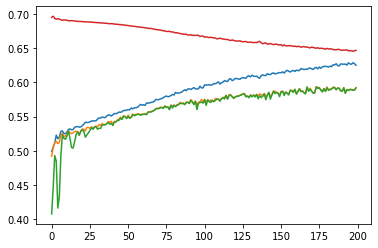

epoch: 0
train_acc: 0.6284423430522721
test_acc: 0.5924182567033706
f1: 0.5921389911274942

epoch: 1
train_acc: 0.629692671394799
test_acc: 0.5891401193578213
f1: 0.5890264063805088

epoch: 2
train_acc: 0.6299343314946152
test_acc: 0.5918298730772463
f1: 0.5912278927180067

epoch: 3
train_acc: 0.6270869451011295
test_acc: 0.5945616541985375
f1: 0.5944248666999051

epoch: 4
train_acc: 0.6286945101129499
test_acc: 0.5899386399932757
f1: 0.5871977817098286

epoch: 5
train_acc: 0.6276963488311006
test_acc: 0.5888459275447592
f1: 0.5880769312813975

epoch: 6
train_acc: 0.627685841870239
test_acc: 0.5918298730772463
f1: 0.5893100312414685

epoch: 7
train_acc: 0.6292828999211978
test_acc: 0.5893082289652853
f1: 0.5892424614951352

epoch: 8
train_acc: 0.6296821644339374
test_acc: 0.5926704211145667
f1: 0.5922708569831007

epoch: 9
train_acc: 0.6306698187549251
test_acc: 0.5956963940489199
f1: 0.5949116834426059

epoch: 10
train_acc: 0.62849487785658
test_acc: 0.5893922837690174
f1: 0.589198881

epoch: 89
train_acc: 0.6444654583661675
test_acc: 0.5989745313944692
f1: 0.5989496665262396

epoch: 90
train_acc: 0.6469345941686367
test_acc: 0.5945616541985375
f1: 0.594483487449554

epoch: 91
train_acc: 0.6452219595482007
test_acc: 0.598554257375809
f1: 0.5976511092656329

epoch: 92
train_acc: 0.6457368006304176
test_acc: 0.5956963940489199
f1: 0.5956325153076797

epoch: 93
train_acc: 0.6456107171000788
test_acc: 0.5979238463478188
f1: 0.5972735276782434

epoch: 94
train_acc: 0.644969792487523
test_acc: 0.6004034630579138
f1: 0.600381838030368

epoch: 95
train_acc: 0.6458628841607565
test_acc: 0.6016222577120283
f1: 0.6013536783031418

epoch: 96
train_acc: 0.6466929340688206
test_acc: 0.5974615449272926
f1: 0.5969012847676527

epoch: 97
train_acc: 0.6454636196480168
test_acc: 0.5993527780112633
f1: 0.5992855717527744

epoch: 98
train_acc: 0.6472918308379302
test_acc: 0.598596284777675
f1: 0.597665702311228

epoch: 99
train_acc: 0.6465773574993433
test_acc: 0.6013280658989661
f1: 0.6

epoch: 177
train_acc: 0.6588179669030733
test_acc: 0.6067916281415483
f1: 0.606692532712684

epoch: 178
train_acc: 0.6582821118991332
test_acc: 0.603345381188535
f1: 0.603053996833485

epoch: 179
train_acc: 0.658408195429472
test_acc: 0.6049424224594435
f1: 0.6049436422015544

epoch: 180
train_acc: 0.6618334646703441
test_acc: 0.6042279566277212
f1: 0.6038281472186072

epoch: 181
train_acc: 0.6595324402416601
test_acc: 0.6021265865344204
f1: 0.6020691194711162

epoch: 182
train_acc: 0.6607407407407407
test_acc: 0.6006556274691098
f1: 0.6005602789519342

epoch: 183
train_acc: 0.6606776989755713
test_acc: 0.603513490795999
f1: 0.6033296052930471

epoch: 184
train_acc: 0.6589020225899659
test_acc: 0.6065814911322182
f1: 0.6064818136139892

epoch: 185
train_acc: 0.6582716049382716
test_acc: 0.6040598470202572
f1: 0.6039960100553797

epoch: 186
train_acc: 0.6587444181770423
test_acc: 0.6043120114314533
f1: 0.604041768034315

epoch: 187
train_acc: 0.658702390333596
test_acc: 0.60380768260906

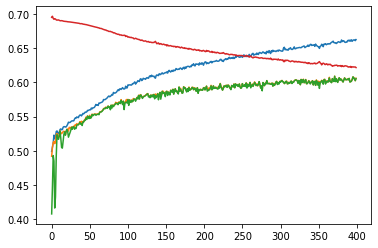

epoch: 0
train_acc: 0.659364328867875
test_acc: 0.6072119021602085
f1: 0.6072129900173545

epoch: 1
train_acc: 0.6619700551615445
test_acc: 0.6038076826090611
f1: 0.6036575355991404

epoch: 2
train_acc: 0.6615497767270817
test_acc: 0.6051945868706397
f1: 0.6049754232809017

epoch: 3
train_acc: 0.6628421329130549
test_acc: 0.6066655459359502
f1: 0.606663836160429

epoch: 4
train_acc: 0.6620751247701603
test_acc: 0.6055728334874338
f1: 0.6051594460242552

epoch: 5
train_acc: 0.6612135539795114
test_acc: 0.6014121207026981
f1: 0.6014035593500447

epoch: 6
train_acc: 0.664260572629367
test_acc: 0.6072959569639405
f1: 0.6070810711962692

epoch: 7
train_acc: 0.6643971631205674
test_acc: 0.6075060939732706
f1: 0.6074358660342883

epoch: 8
train_acc: 0.6643971631205674
test_acc: 0.6071698747583424
f1: 0.6070806490095658

epoch: 9
train_acc: 0.6634200157604413
test_acc: 0.6098176010759014
f1: 0.609465146761277

epoch: 10
train_acc: 0.66374573154715
test_acc: 0.6023787509456165
f1: 0.60235896951

epoch: 89
train_acc: 0.6729603362227475
test_acc: 0.6105740943094898
f1: 0.6098007874528495

epoch: 90
train_acc: 0.6742001576044129
test_acc: 0.6134319576363789
f1: 0.6134303653545063

epoch: 91
train_acc: 0.674221171526136
test_acc: 0.6048163402538455
f1: 0.6044462297488702

epoch: 92
train_acc: 0.6755030207512477
test_acc: 0.6081365050012608
f1: 0.6080224671943006

epoch: 93
train_acc: 0.6725925925925926
test_acc: 0.6124232999915945
f1: 0.6124241762516659

epoch: 94
train_acc: 0.6734856842658261
test_acc: 0.605909052702362
f1: 0.6049825635820842

epoch: 95
train_acc: 0.6703125820856317
test_acc: 0.611036395730016
f1: 0.6107150025136966

epoch: 96
train_acc: 0.6715944313107434
test_acc: 0.605867025300496
f1: 0.603949388230868

epoch: 97
train_acc: 0.6723509324927764
test_acc: 0.6067496007396823
f1: 0.6063628939378571

epoch: 98
train_acc: 0.6737903861308117
test_acc: 0.6080944775993948
f1: 0.607208078891949

epoch: 99
train_acc: 0.6738429209351195
test_acc: 0.6101538202908297
f1: 0.6

epoch: 177
train_acc: 0.6848542159180457
test_acc: 0.6082205598049929
f1: 0.6075855652895846

epoch: 178
train_acc: 0.6851694247438929
test_acc: 0.6084306968143229
f1: 0.6084039731187959

epoch: 179
train_acc: 0.6830365116889939
test_acc: 0.6109943683281499
f1: 0.6108305253697252

epoch: 180
train_acc: 0.6835828736537957
test_acc: 0.6079683953937968
f1: 0.607807328431529

epoch: 181
train_acc: 0.6854320987654321
test_acc: 0.6143985878792974
f1: 0.614397254987781

epoch: 182
train_acc: 0.6856422379826635
test_acc: 0.6101538202908297
f1: 0.6091871697944217

epoch: 183
train_acc: 0.6840031520882585
test_acc: 0.6125073547953266
f1: 0.6124822680442807

epoch: 184
train_acc: 0.6835723666929341
test_acc: 0.6101117928889636
f1: 0.6096794117262513

epoch: 185
train_acc: 0.685190438665616
test_acc: 0.6089770530385812
f1: 0.6089472267331599

epoch: 186
train_acc: 0.685631731021802
test_acc: 0.6164999579725982
f1: 0.6165009571049028

epoch: 187
train_acc: 0.6839506172839506
test_acc: 0.60653946373

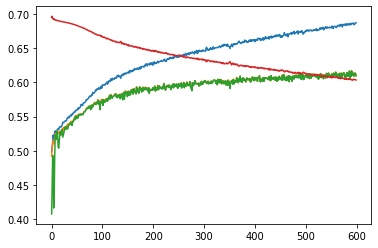

epoch: 0
train_acc: 0.6859679537693723
test_acc: 0.6114566697486762
f1: 0.6113817676883926

epoch: 1
train_acc: 0.687880220646178
test_acc: 0.6129276288139868
f1: 0.6126289516916619

epoch: 2
train_acc: 0.6873548726030996
test_acc: 0.6133058754307809
f1: 0.61305022925819

epoch: 3
train_acc: 0.6860940372997111
test_acc: 0.6133479028326468
f1: 0.6132859850343064

epoch: 4
train_acc: 0.6858628841607565
test_acc: 0.6114566697486762
f1: 0.6106894924085626

epoch: 5
train_acc: 0.6849908064092461
test_acc: 0.6102799024964277
f1: 0.6102195693382685

epoch: 6
train_acc: 0.686314683477804
test_acc: 0.6103219298982937
f1: 0.6101710310527413

epoch: 7
train_acc: 0.6857998423955871
test_acc: 0.6126754644027906
f1: 0.6122831499367632

epoch: 8
train_acc: 0.6880903598634095
test_acc: 0.616037656552072
f1: 0.616036075003128

epoch: 9
train_acc: 0.6862726556343578
test_acc: 0.6113305875430781
f1: 0.6107573673657459

epoch: 10
train_acc: 0.6872498029944838
test_acc: 0.6130537110195847
f1: 0.61305086431

epoch: 89
train_acc: 0.6947097452061991
test_acc: 0.6175926704211145
f1: 0.616939973655702

epoch: 90
train_acc: 0.6960231153138955
test_acc: 0.6193998487013532
f1: 0.619377776416719

epoch: 91
train_acc: 0.6960546361964801
test_acc: 0.6120450533748004
f1: 0.6118380922923966

epoch: 92
train_acc: 0.6973049645390071
test_acc: 0.6116668067580062
f1: 0.6114867026614115

epoch: 93
train_acc: 0.6959915944313108
test_acc: 0.616289820963268
f1: 0.6162855267328714

epoch: 94
train_acc: 0.6960021013921723
test_acc: 0.6167521223837943
f1: 0.616127045152662

epoch: 95
train_acc: 0.6956868925663252
test_acc: 0.613684122047575
f1: 0.6136811742857862

epoch: 96
train_acc: 0.6968636721828211
test_acc: 0.6153652181222157
f1: 0.615134549793062

epoch: 97
train_acc: 0.6963908589440504
test_acc: 0.6144826426830293
f1: 0.6142409763249923

epoch: 98
train_acc: 0.6965169424743893
test_acc: 0.6165419853744641
f1: 0.6164720697718353

epoch: 99
train_acc: 0.6959075387444181
test_acc: 0.6117088341598722
f1: 0.6

epoch: 177
train_acc: 0.7066876805883898
test_acc: 0.6155753551315458
f1: 0.6151002109611231

epoch: 178
train_acc: 0.7060572629366956
test_acc: 0.6183071362528368
f1: 0.6182707711399632

epoch: 179
train_acc: 0.7054688731284476
test_acc: 0.6104480121038918
f1: 0.6103673073706696

epoch: 180
train_acc: 0.707097452061991
test_acc: 0.6188534924770951
f1: 0.6186177750041285

epoch: 181
train_acc: 0.704701864985553
test_acc: 0.6184752458603009
f1: 0.6184762620896392

epoch: 182
train_acc: 0.706561597058051
test_acc: 0.6199882323274775
f1: 0.6199154142778468

epoch: 183
train_acc: 0.7089887050170738
test_acc: 0.618727410271497
f1: 0.6183713114307399

epoch: 184
train_acc: 0.7045337536117678
test_acc: 0.6201143145330755
f1: 0.62007322176189

epoch: 185
train_acc: 0.7089046493301813
test_acc: 0.6165840127763301
f1: 0.6161904954761974

epoch: 186
train_acc: 0.7054583661675861
test_acc: 0.6198201227200134
f1: 0.6197786571971022

epoch: 187
train_acc: 0.7083687943262411
test_acc: 0.6210389173741

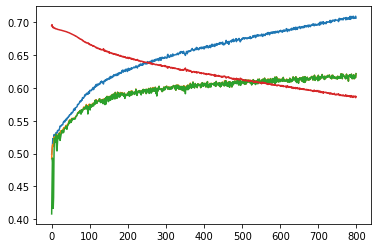

epoch: 0
train_acc: 0.7088311006041502
test_acc: 0.6120030259729343
f1: 0.6117090640289753

epoch: 1
train_acc: 0.7089781980562122
test_acc: 0.6179288896360428
f1: 0.6178450083561836

epoch: 2
train_acc: 0.7086524822695035
test_acc: 0.6177607800285786
f1: 0.6177214393854116

epoch: 3
train_acc: 0.7087995797215655
test_acc: 0.6181810540472388
f1: 0.617931932194622

epoch: 4
train_acc: 0.7108379301287102
test_acc: 0.6175086156173826
f1: 0.6174312283976889

epoch: 5
train_acc: 0.7083162595219333
test_acc: 0.6163738757670001
f1: 0.6163219377180656

epoch: 6
train_acc: 0.7106593117940636
test_acc: 0.618559300664033
f1: 0.6181647133301785

epoch: 7
train_acc: 0.7091147885474126
test_acc: 0.6196940405144153
f1: 0.6196653176762132

epoch: 8
train_acc: 0.7101654846335698
test_acc: 0.6140203412625032
f1: 0.613586858148065

epoch: 9
train_acc: 0.7099553454163383
test_acc: 0.6193157938976213
f1: 0.6193169800210343

epoch: 10
train_acc: 0.709913317572892
test_acc: 0.6132638480289149
f1: 0.613050698

epoch: 89
train_acc: 0.7171105857630681
test_acc: 0.6229721778599647
f1: 0.6226382619485633

epoch: 90
train_acc: 0.7182663514578408
test_acc: 0.6226359586450365
f1: 0.6225944666588837

epoch: 91
train_acc: 0.7187601786183346
test_acc: 0.623938808102883
f1: 0.623459394228673

epoch: 92
train_acc: 0.7186866298923037
test_acc: 0.6252416575607296
f1: 0.6252289072123411

epoch: 93
train_acc: 0.7175098502758077
test_acc: 0.6208287803647978
f1: 0.620794528520526

epoch: 94
train_acc: 0.7189282899921198
test_acc: 0.6158275195427418
f1: 0.6154637451969672

epoch: 95
train_acc: 0.7168479117415287
test_acc: 0.6216273010002522
f1: 0.6215442404352884

epoch: 96
train_acc: 0.7188232203835041
test_acc: 0.6213331091871901
f1: 0.6208458020954644

epoch: 97
train_acc: 0.7208090359863409
test_acc: 0.6194418761032193
f1: 0.6193837576394929

epoch: 98
train_acc: 0.7181087470449172
test_acc: 0.6223837942338405
f1: 0.6223803758441859

epoch: 99
train_acc: 0.7184449697924875
test_acc: 0.6191056568882911
f1: 

epoch: 177
train_acc: 0.7265038087733123
test_acc: 0.6271749180465663
f1: 0.6271284204340206

epoch: 178
train_acc: 0.7283950617283951
test_acc: 0.6244431369252753
f1: 0.624425134911212

epoch: 179
train_acc: 0.728983451536643
test_acc: 0.6251576027569976
f1: 0.6247987619629185

epoch: 180
train_acc: 0.7273758865248227
test_acc: 0.6232663696730268
f1: 0.6232672773196477

epoch: 181
train_acc: 0.7289099028106121
test_acc: 0.6184332184584349
f1: 0.6181141621019264

epoch: 182
train_acc: 0.728689256632519
test_acc: 0.6241909725140792
f1: 0.6240612319329698

epoch: 183
train_acc: 0.7278486997635933
test_acc: 0.6232243422711607
f1: 0.6232251002758075

epoch: 184
train_acc: 0.7300761754662464
test_acc: 0.6199462049256115
f1: 0.6197678622222375

epoch: 185
train_acc: 0.7289204097714737
test_acc: 0.6201563419349416
f1: 0.6200946900947037

epoch: 186
train_acc: 0.7283950617283951
test_acc: 0.6230562326636967
f1: 0.622987929150073

epoch: 187
train_acc: 0.7288153401628579
test_acc: 0.62192149281

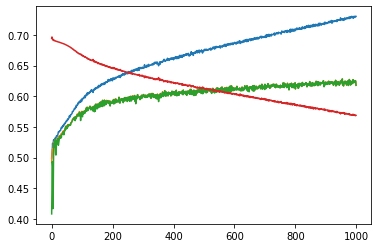

epoch: 0
train_acc: 0.730843183609141
test_acc: 0.6225098764394386
f1: 0.6224366530483634

epoch: 1
train_acc: 0.7308852114525873
test_acc: 0.6226779860469026
f1: 0.6226269014935136

epoch: 2
train_acc: 0.729792487522984
test_acc: 0.6226359586450365
f1: 0.6225277671685593

epoch: 3
train_acc: 0.7316101917520357
test_acc: 0.6226359586450365
f1: 0.6225568559766942

epoch: 4
train_acc: 0.7295823483057525
test_acc: 0.6258720685887198
f1: 0.6258610110777362

epoch: 5
train_acc: 0.7297189387969529
test_acc: 0.6246112465327394
f1: 0.6243389057174014

epoch: 6
train_acc: 0.728594693984765
test_acc: 0.6233083970748928
f1: 0.6232418486201194

epoch: 7
train_acc: 0.7310428158655109
test_acc: 0.6261662604017819
f1: 0.6260547571009693

epoch: 8
train_acc: 0.7309167323351721
test_acc: 0.6199041775237455
f1: 0.6198836078193782

epoch: 9
train_acc: 0.7341949041239821
test_acc: 0.6232243422711607
f1: 0.623005338084004

epoch: 10
train_acc: 0.7320304701864986
test_acc: 0.6246532739346053
f1: 0.624471607

epoch: 89
train_acc: 0.7399632256369845
test_acc: 0.6281835756913507
f1: 0.6280211212111096

epoch: 90
train_acc: 0.7372314158129761
test_acc: 0.6205766159536017
f1: 0.6204899505542878

epoch: 91
train_acc: 0.7374310480693459
test_acc: 0.623770698495419
f1: 0.6236707620554452

epoch: 92
train_acc: 0.7393958497504597
test_acc: 0.6246532739346053
f1: 0.6245009830882482

epoch: 93
train_acc: 0.7381455214079328
test_acc: 0.6252416575607296
f1: 0.625199098245891

epoch: 94
train_acc: 0.7405831363278171
test_acc: 0.6256619315793898
f1: 0.6256503223198303

epoch: 95
train_acc: 0.7386603624901498
test_acc: 0.6240648903084811
f1: 0.6239603138356377

epoch: 96
train_acc: 0.7385237719989493
test_acc: 0.6251155753551315
f1: 0.6249931199911658

epoch: 97
train_acc: 0.7391331757289205
test_acc: 0.6247373287383374
f1: 0.6246649797281092

epoch: 98
train_acc: 0.7375571315996848
test_acc: 0.6245692191308734
f1: 0.6243161101679466

epoch: 99
train_acc: 0.7403624901497242
test_acc: 0.6251996301588636
f1:

epoch: 177
train_acc: 0.7490622537431048
test_acc: 0.6233924518786249
f1: 0.6232279040547932

epoch: 178
train_acc: 0.7488836354084581
test_acc: 0.628729931915609
f1: 0.6286393337909086

epoch: 179
train_acc: 0.7483372734436564
test_acc: 0.6258300411868538
f1: 0.6258306511952775

epoch: 180
train_acc: 0.7482111899133176
test_acc: 0.6192737664957553
f1: 0.6186528020657929

epoch: 181
train_acc: 0.7469818754925138
test_acc: 0.6277212742708246
f1: 0.6277072417078066

epoch: 182
train_acc: 0.7477593905962701
test_acc: 0.6273430276540304
f1: 0.6272090570992646

epoch: 183
train_acc: 0.7475912792224849
test_acc: 0.6238547532991511
f1: 0.6236816665648733

epoch: 184
train_acc: 0.7484528500131337
test_acc: 0.6265865344204421
f1: 0.6265302932194428

epoch: 185
train_acc: 0.7480220646178093
test_acc: 0.6267546440279061
f1: 0.6260120636756751

epoch: 186
train_acc: 0.7483057525610717
test_acc: 0.6231402874674288
f1: 0.6231413811293685

epoch: 187
train_acc: 0.7498923036511689
test_acc: 0.62519963

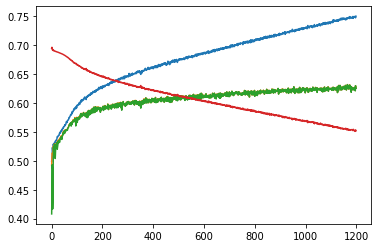

epoch: 0
train_acc: 0.7501339637509851
test_acc: 0.6248634109439355
f1: 0.624841655509677

epoch: 1
train_acc: 0.7484738639348568
test_acc: 0.6246532739346053
f1: 0.6239727803363848

epoch: 2
train_acc: 0.7495035460992908
test_acc: 0.6270908632428344
f1: 0.6270872662323418

epoch: 3
train_acc: 0.7506803257157867
test_acc: 0.6305791375977137
f1: 0.630450440009583

epoch: 4
train_acc: 0.7500394011032309
test_acc: 0.6270908632428344
f1: 0.6268786334244028

epoch: 5
train_acc: 0.7496086157079065
test_acc: 0.6270488358409683
f1: 0.627045349666911

epoch: 6
train_acc: 0.7498817966903073
test_acc: 0.6232663696730268
f1: 0.6230587331180697

epoch: 7
train_acc: 0.7520462306277909
test_acc: 0.6294443977473313
f1: 0.6294325392286143

epoch: 8
train_acc: 0.7494825321775677
test_acc: 0.6245692191308734
f1: 0.6244318356062633

epoch: 9
train_acc: 0.7508379301287103
test_acc: 0.6300327813734555
f1: 0.6299837848864336

epoch: 10
train_acc: 0.7497452061991069
test_acc: 0.6244431369252753
f1: 0.62418581

epoch: 89
train_acc: 0.7580982400840557
test_acc: 0.6294864251491973
f1: 0.6293316520537061

epoch: 90
train_acc: 0.7594536380351983
test_acc: 0.6283937127006809
f1: 0.6283010570216119

epoch: 91
train_acc: 0.759705805095876
test_acc: 0.6315037404387661
f1: 0.6315045735659037

epoch: 92
train_acc: 0.7581087470449173
test_acc: 0.6284357401025469
f1: 0.6283532304785829

epoch: 93
train_acc: 0.7597583399001838
test_acc: 0.6279734386820207
f1: 0.6279146543471623

epoch: 94
train_acc: 0.7578565799842396
test_acc: 0.6300327813734555
f1: 0.6299785866528735

epoch: 95
train_acc: 0.7582558444969792
test_acc: 0.6310834664201059
f1: 0.6309750397283181

epoch: 96
train_acc: 0.7611242448121881
test_acc: 0.6279734386820207
f1: 0.6278484840869214

epoch: 97
train_acc: 0.758434462831626
test_acc: 0.6257880137849878
f1: 0.6257828315884767

epoch: 98
train_acc: 0.7602416600998161
test_acc: 0.6301168361771875
f1: 0.6300761636758481

epoch: 99
train_acc: 0.7580351983188862
test_acc: 0.6267126166260402
f1:

epoch: 177
train_acc: 0.7651589177830312
test_acc: 0.6302429183827856
f1: 0.6302118811586517

epoch: 178
train_acc: 0.767123719464145
test_acc: 0.631209548625704
f1: 0.6308603395802853

epoch: 179
train_acc: 0.7677331231941161
test_acc: 0.6301168361771875
f1: 0.6300611218104886

epoch: 180
train_acc: 0.7679957972156554
test_acc: 0.6296545347566613
f1: 0.6296543044986272

epoch: 181
train_acc: 0.7659364328867875
test_acc: 0.6295284525510633
f1: 0.6292621978511495

epoch: 182
train_acc: 0.7676595744680851
test_acc: 0.6271749180465663
f1: 0.6271390862372973

epoch: 183
train_acc: 0.7663567113212504
test_acc: 0.6250735479532655
f1: 0.625044667943105

epoch: 184
train_acc: 0.7660730233779879
test_acc: 0.6268807262335042
f1: 0.6267049547668878

epoch: 185
train_acc: 0.7667664827948516
test_acc: 0.6323442884760864
f1: 0.632339695959549

epoch: 186
train_acc: 0.769277646440767
test_acc: 0.6290661511305371
f1: 0.6289897552205784

epoch: 187
train_acc: 0.7696033622274757
test_acc: 0.627973438682

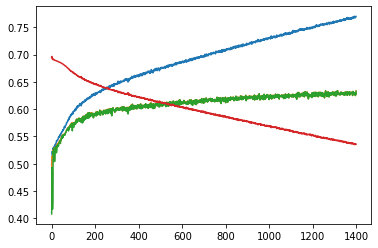

epoch: 0
train_acc: 0.7700446545836617
test_acc: 0.6301168361771875
f1: 0.6299616875138504

epoch: 1
train_acc: 0.7689624376149199
test_acc: 0.6314617130369
f1: 0.6313862579295979

epoch: 2
train_acc: 0.768079852902548
test_acc: 0.6305791375977137
f1: 0.6305457665368458

epoch: 3
train_acc: 0.7690780141843971
test_acc: 0.626460452214844
f1: 0.6263462933350505

epoch: 4
train_acc: 0.7691515629104282
test_acc: 0.6299066991678575
f1: 0.629864332885207

epoch: 5
train_acc: 0.7684370895718413
test_acc: 0.6320080692611583
f1: 0.6320085502547624

epoch: 6
train_acc: 0.7704544260572629
test_acc: 0.6309573842145079
f1: 0.6306630306210889

epoch: 7
train_acc: 0.7685946939847649
test_acc: 0.6285197949062789
f1: 0.6285181801284359

epoch: 8
train_acc: 0.7706855791962175
test_acc: 0.6318399596536942
f1: 0.6317081947407827

epoch: 9
train_acc: 0.7693196742842133
test_acc: 0.6261242329999159
f1: 0.6257190044443877

epoch: 10
train_acc: 0.7678697136853165
test_acc: 0.6275111372614945
f1: 0.62750558628

epoch: 89
train_acc: 0.776474914630943
test_acc: 0.6294443977473313
f1: 0.6292538743245736

epoch: 90
train_acc: 0.7761912266876806
test_acc: 0.6317979322518282
f1: 0.6317809403841856

epoch: 91
train_acc: 0.7755503020751248
test_acc: 0.6326805076910146
f1: 0.632650815179373

epoch: 92
train_acc: 0.7761702127659574
test_acc: 0.6296545347566613
f1: 0.6293824772299927

epoch: 93
train_acc: 0.775277121092724
test_acc: 0.6306631924014457
f1: 0.6306643327319131

epoch: 94
train_acc: 0.7782821118991332
test_acc: 0.6268386988316382
f1: 0.6267956404781428

epoch: 95
train_acc: 0.7781980562122406
test_acc: 0.6320921240648903
f1: 0.6317351061336085

epoch: 96
train_acc: 0.7768846861045443
test_acc: 0.6332688913171388
f1: 0.6332686633062893

epoch: 97
train_acc: 0.7757604412923562
test_acc: 0.6307892746070438
f1: 0.6306092044158456

epoch: 98
train_acc: 0.7785027580772261
test_acc: 0.628940068924939
f1: 0.6288283068609458

epoch: 99
train_acc: 0.7777672708169162
test_acc: 0.6318819870555602
f1: 0

epoch: 177
train_acc: 0.7842920935119516
test_acc: 0.6308313020089098
f1: 0.6307460316042491

epoch: 178
train_acc: 0.7840084055686892
test_acc: 0.6349079599899135
f1: 0.6349080135141926

epoch: 179
train_acc: 0.7846178092986603
test_acc: 0.6283516852988148
f1: 0.6282710222857529

epoch: 180
train_acc: 0.7827475702653007
test_acc: 0.6329746995040767
f1: 0.6328941214359862

epoch: 181
train_acc: 0.7852692408720777
test_acc: 0.6326384802891485
f1: 0.6326392816515221

epoch: 182
train_acc: 0.784134489099028
test_acc: 0.6351601244011095
f1: 0.635031291063681

epoch: 183
train_acc: 0.7832098765432098
test_acc: 0.6278473564764226
f1: 0.6276873712263862

epoch: 184
train_acc: 0.783966377725243
test_acc: 0.631419685635034
f1: 0.6314184903536736

epoch: 185
train_acc: 0.7853322826372472
test_acc: 0.6320921240648903
f1: 0.6319050679249035

epoch: 186
train_acc: 0.7843971631205674
test_acc: 0.6295284525510633
f1: 0.6295190521261506

epoch: 187
train_acc: 0.7863829787234042
test_acc: 0.62767924686

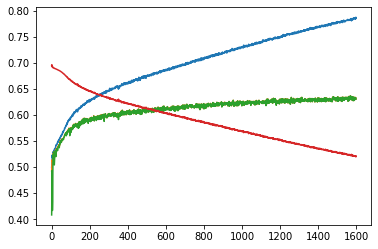

epoch: 0
train_acc: 0.786046755975834
test_acc: 0.6297806169622594
f1: 0.62955935779641

epoch: 1
train_acc: 0.7860782768584187
test_acc: 0.6310834664201059
f1: 0.6310290455773706

epoch: 2
train_acc: 0.7858156028368795
test_acc: 0.6305371101958477
f1: 0.6305377125303476

epoch: 3
train_acc: 0.7860362490149724
test_acc: 0.6297806169622594
f1: 0.629598672230806

epoch: 4
train_acc: 0.7871184659837143
test_acc: 0.6323442884760864
f1: 0.6323443949775089

epoch: 5
train_acc: 0.7854373522458629
test_acc: 0.6317979322518282
f1: 0.6317439960997189

epoch: 6
train_acc: 0.78648804833202
test_acc: 0.6305791375977137
f1: 0.630439743007465

epoch: 7
train_acc: 0.7864039926451274
test_acc: 0.6340253845507271
f1: 0.6339578095431763

epoch: 8
train_acc: 0.7858156028368795
test_acc: 0.6303269731865176
f1: 0.6303262209828642

epoch: 9
train_acc: 0.7862148673496191
test_acc: 0.6327225350928806
f1: 0.6325208371138237

epoch: 10
train_acc: 0.7864460204885737
test_acc: 0.6254517945700597
f1: 0.625396542969

epoch: 89
train_acc: 0.7924454951405306
test_acc: 0.6328906447003446
f1: 0.6328190009109883

epoch: 90
train_acc: 0.7932019963225637
test_acc: 0.6325123980835504
f1: 0.6325073090082705

epoch: 91
train_acc: 0.7925715786708695
test_acc: 0.6334370009246029
f1: 0.6333194926748492

epoch: 92
train_acc: 0.7938008930916732
test_acc: 0.6340253845507271
f1: 0.6339990904235296

epoch: 93
train_acc: 0.7934226425006566
test_acc: 0.6301168361771875
f1: 0.630104999673113

epoch: 94
train_acc: 0.7925295508274232
test_acc: 0.6340674119525931
f1: 0.6337414833800029

epoch: 95
train_acc: 0.7928237457315471
test_acc: 0.6317138774480962
f1: 0.6316964445027183

epoch: 96
train_acc: 0.7918991331757289
test_acc: 0.6331007817096747
f1: 0.633101924882273

epoch: 97
train_acc: 0.792802731809824
test_acc: 0.6309994116163739
f1: 0.6307024492040013

epoch: 98
train_acc: 0.7927501970055162
test_acc: 0.6334370009246029
f1: 0.6334281872545233

epoch: 99
train_acc: 0.7939900183871815
test_acc: 0.6325123980835504
f1: 

epoch: 177
train_acc: 0.8001155765694773
test_acc: 0.6286458771118769
f1: 0.6285323861283197

epoch: 178
train_acc: 0.7995376937220909
test_acc: 0.6303269731865176
f1: 0.6302953584072785

epoch: 179
train_acc: 0.7966903073286052
test_acc: 0.6295704799529294
f1: 0.6294517322215228

epoch: 180
train_acc: 0.799558707643814
test_acc: 0.6323442884760864
f1: 0.6323128462195171

epoch: 181
train_acc: 0.7999684791174153
test_acc: 0.6349920147936454
f1: 0.6349764392912934

epoch: 182
train_acc: 0.7998529025479381
test_acc: 0.6304530553921157
f1: 0.6302741960727108

epoch: 183
train_acc: 0.7992540057788284
test_acc: 0.6294023703454652
f1: 0.6293884005190675

epoch: 184
train_acc: 0.7990228526398739
test_acc: 0.6327645624947466
f1: 0.6327529925165025

epoch: 185
train_acc: 0.7995376937220909
test_acc: 0.6327225350928806
f1: 0.6326866187186112

epoch: 186
train_acc: 0.799779353821907
test_acc: 0.6300748087753215
f1: 0.6300566297225874

epoch: 187
train_acc: 0.7999369582348306
test_acc: 0.632932672

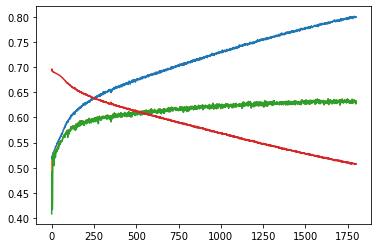

epoch: 0
train_acc: 0.8014079327554505
test_acc: 0.6329746995040767
f1: 0.6328787199615427

epoch: 1
train_acc: 0.8012188074599422
test_acc: 0.6315457678406321
f1: 0.6315468631448145

epoch: 2
train_acc: 0.7994956658786446
test_acc: 0.6335630831302009
f1: 0.6334975175021907

epoch: 3
train_acc: 0.802227475702653
test_acc: 0.6346978229805833
f1: 0.6344602640549273

epoch: 4
train_acc: 0.8010191752035724
test_acc: 0.6349920147936454
f1: 0.6349929657534088

epoch: 5
train_acc: 0.800977147360126
test_acc: 0.6323442884760864
f1: 0.6322612491991184

epoch: 6
train_acc: 0.8013869188337274
test_acc: 0.633731192737665
f1: 0.6335947843256533

epoch: 7
train_acc: 0.8021329130548989
test_acc: 0.6350760695973775
f1: 0.6350768037584871

epoch: 8
train_acc: 0.8005043341213554
test_acc: 0.6311254938219719
f1: 0.6309844840454402

epoch: 9
train_acc: 0.802153926976622
test_acc: 0.6322602336723544
f1: 0.632150010476272

epoch: 10
train_acc: 0.8024376149198844
test_acc: 0.6293183155417332
f1: 0.6293172679

epoch: 89
train_acc: 0.806388232203835
test_acc: 0.6322602336723544
f1: 0.632209716100569

epoch: 90
train_acc: 0.8087838192802732
test_acc: 0.6305791375977137
f1: 0.6305207649922683

epoch: 91
train_acc: 0.8086472287890728
test_acc: 0.6354963436160377
f1: 0.6354594568820424

epoch: 92
train_acc: 0.8089624376149199
test_acc: 0.6330587543078087
f1: 0.6329597616082406

epoch: 93
train_acc: 0.8075334909377463
test_acc: 0.6350760695973775
f1: 0.6350263018607285

epoch: 94
train_acc: 0.8067769897557132
test_acc: 0.6354963436160377
f1: 0.6354199367285744

epoch: 95
train_acc: 0.8082899921197794
test_acc: 0.6328065898966125
f1: 0.6328049937221425

epoch: 96
train_acc: 0.8076070396637772
test_acc: 0.6326384802891485
f1: 0.6325414051519009

epoch: 97
train_acc: 0.8064512739690045
test_acc: 0.6348239051861814
f1: 0.6347018163164024

epoch: 98
train_acc: 0.8088258471237194
test_acc: 0.6336471379339329
f1: 0.6336403063225561

epoch: 99
train_acc: 0.8076700814289467
test_acc: 0.6307052198033117
f1:

epoch: 177
train_acc: 0.8124192277383767
test_acc: 0.6304530553921157
f1: 0.6303564164229755

epoch: 178
train_acc: 0.8131442080378251
test_acc: 0.633899302345129
f1: 0.6338711021693069

epoch: 179
train_acc: 0.8126293669556081
test_acc: 0.6313356308313021
f1: 0.6312960752429864

epoch: 180
train_acc: 0.8127974783293932
test_acc: 0.633899302345129
f1: 0.6337676887776806

epoch: 181
train_acc: 0.8123771998949304
test_acc: 0.6322602336723544
f1: 0.6322220663259033

epoch: 182
train_acc: 0.813806146572104
test_acc: 0.6368412204757502
f1: 0.6368098747251826

epoch: 183
train_acc: 0.8128605200945627
test_acc: 0.6323022610742204
f1: 0.632230502457955

epoch: 184
train_acc: 0.8145626477541371
test_acc: 0.6283516852988148
f1: 0.628335401012749

epoch: 185
train_acc: 0.8135014447071185
test_acc: 0.6346137681768513
f1: 0.6345875163231703

epoch: 186
train_acc: 0.8123246650906225
test_acc: 0.6321761788686223
f1: 0.6321180586134618

epoch: 187
train_acc: 0.814615182558445
test_acc: 0.6307472472051

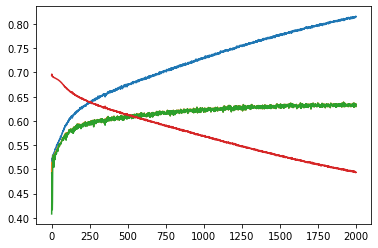

epoch: 0
train_acc: 0.8144155503020751
test_acc: 0.6321341514667563
f1: 0.6320903470366387

epoch: 1
train_acc: 0.8142894667717363
test_acc: 0.6311254938219719
f1: 0.631086240896988

epoch: 2
train_acc: 0.8144470711846599
test_acc: 0.6356644532235017
f1: 0.6356358380405777

epoch: 3
train_acc: 0.8145206199106908
test_acc: 0.6357064806253677
f1: 0.6356592995099135

epoch: 4
train_acc: 0.8154872603099553
test_acc: 0.6302849457846516
f1: 0.6301942377162991

epoch: 5
train_acc: 0.8149724192277383
test_acc: 0.6326805076910146
f1: 0.6326678216134468

epoch: 6
train_acc: 0.8158024691358025
test_acc: 0.6303690005883836
f1: 0.6302915189124654

epoch: 7
train_acc: 0.8148253217756763
test_acc: 0.633773220139531
f1: 0.6336502135487385

epoch: 8
train_acc: 0.8159285526661413
test_acc: 0.6316718500462302
f1: 0.6316722455982673

epoch: 9
train_acc: 0.8165799842395587
test_acc: 0.6341514667563252
f1: 0.6340557949462073

epoch: 10
train_acc: 0.8163383241397426
test_acc: 0.6340253845507271
f1: 0.6338622

epoch: 89
train_acc: 0.820488573680063
test_acc: 0.6341514667563252
f1: 0.6341243770107119

epoch: 90
train_acc: 0.8198896769109535
test_acc: 0.6334790283264689
f1: 0.6332599794917121

epoch: 91
train_acc: 0.8199001838718151
test_acc: 0.6367151382701521
f1: 0.6367162470820873

epoch: 92
train_acc: 0.8215392697662202
test_acc: 0.6330587543078087
f1: 0.6329791129228666

epoch: 93
train_acc: 0.8208142894667717
test_acc: 0.6360006724384298
f1: 0.6359084486391156

epoch: 94
train_acc: 0.8224954032046231
test_acc: 0.6341514667563252
f1: 0.6341300077248191

epoch: 95
train_acc: 0.8195639611242448
test_acc: 0.6354543162141716
f1: 0.6354331738152158

epoch: 96
train_acc: 0.8207617546624639
test_acc: 0.6344456585693873
f1: 0.6342666897153063

epoch: 97
train_acc: 0.8212345679012346
test_acc: 0.6322602336723544
f1: 0.6322299380670153

epoch: 98
train_acc: 0.8199422117152614
test_acc: 0.6345717407749852
f1: 0.6344830506150247

epoch: 99
train_acc: 0.8205936432886788
test_acc: 0.6354122888123056
f1

epoch: 177
train_acc: 0.8256159705805096
test_acc: 0.6331428091115407
f1: 0.6330942245000204

epoch: 178
train_acc: 0.825679012345679
test_acc: 0.6345717407749852
f1: 0.6345565604829577

epoch: 179
train_acc: 0.8265405831363278
test_acc: 0.6334790283264689
f1: 0.6333957783259252

epoch: 180
train_acc: 0.8278434462831626
test_acc: 0.6333109187190048
f1: 0.6331961279700813

epoch: 181
train_acc: 0.8258576306803257
test_acc: 0.6323022610742204
f1: 0.6322954043840819

epoch: 182
train_acc: 0.8261097977410035
test_acc: 0.6350760695973775
f1: 0.6350065702314786

epoch: 183
train_acc: 0.8265195692146047
test_acc: 0.6300748087753215
f1: 0.6299584511408848

epoch: 184
train_acc: 0.8250696086157079
test_acc: 0.6304950827939817
f1: 0.6304823212386069

epoch: 185
train_acc: 0.8275492513790386
test_acc: 0.6307472472051778
f1: 0.6307356136701752

epoch: 186
train_acc: 0.8251956921460467
test_acc: 0.6309153568126419
f1: 0.6305744351980673

epoch: 187
train_acc: 0.8280115576569478
test_acc: 0.63205009

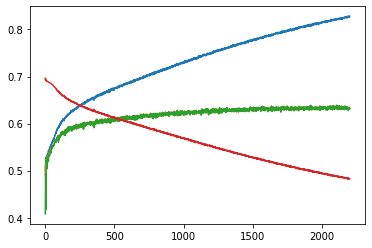

epoch: 0
train_acc: 0.8270554242185448
test_acc: 0.6325964528872825
f1: 0.6324684580846159

epoch: 1
train_acc: 0.8276228001050696
test_acc: 0.6358745902328318
f1: 0.6358584252340361

epoch: 2
train_acc: 0.8282111899133175
test_acc: 0.6335210557283348
f1: 0.6334867487188854

epoch: 3
train_acc: 0.8287785657998424
test_acc: 0.633983357148861
f1: 0.6339110573073818

epoch: 4
train_acc: 0.8281796690307328
test_acc: 0.6345297133731193
f1: 0.6344898521983199

epoch: 5
train_acc: 0.8281796690307328
test_acc: 0.633983357148861
f1: 0.6339651470990055

epoch: 6
train_acc: 0.8282322038350407
test_acc: 0.6335210557283348
f1: 0.6333887185823002

epoch: 7
train_acc: 0.8284633569739953
test_acc: 0.633815247541397
f1: 0.6337812701980499

epoch: 8
train_acc: 0.8279485158917783
test_acc: 0.633899302345129
f1: 0.6338635010479255

epoch: 9
train_acc: 0.8277068557919621
test_acc: 0.6320500966630243
f1: 0.6319693156042666

epoch: 10
train_acc: 0.8274126608878382
test_acc: 0.6331848365134067
f1: 0.633143511

epoch: 89
train_acc: 0.8321618071972682
test_acc: 0.6350340421955115
f1: 0.635035176765622

epoch: 90
train_acc: 0.8329918571053323
test_acc: 0.6334790283264689
f1: 0.6333620874752329

epoch: 91
train_acc: 0.8318781192540058
test_acc: 0.6343195763637892
f1: 0.634269705457814

epoch: 92
train_acc: 0.8327081691620699
test_acc: 0.6327645624947466
f1: 0.632735439925485

epoch: 93
train_acc: 0.8337378513265038
test_acc: 0.6310834664201059
f1: 0.6310267379890503

epoch: 94
train_acc: 0.8322563698450224
test_acc: 0.6307052198033117
f1: 0.6306464723330358

epoch: 95
train_acc: 0.8318571053322826
test_acc: 0.6365470286626881
f1: 0.6365359348225876

epoch: 96
train_acc: 0.8332650380877331
test_acc: 0.6315457678406321
f1: 0.6314601877674462

epoch: 97
train_acc: 0.8330338849487786
test_acc: 0.6313356308313021
f1: 0.6312940977248536

epoch: 98
train_acc: 0.8314683477804046
test_acc: 0.636378919055224
f1: 0.6363339143422628

epoch: 99
train_acc: 0.8337168374047806
test_acc: 0.6325123980835504
f1: 0

epoch: 177
train_acc: 0.8364171263462044
test_acc: 0.6299907539715894
f1: 0.6299909631093965

epoch: 178
train_acc: 0.8378670869451011
test_acc: 0.63104143901824
f1: 0.6309667898146699

epoch: 179
train_acc: 0.8371736275282374
test_acc: 0.6306211649995798
f1: 0.630499943243774

epoch: 180
train_acc: 0.8345048594693985
test_acc: 0.6353702614104396
f1: 0.6353659462803602

epoch: 181
train_acc: 0.8375833990018388
test_acc: 0.633899302345129
f1: 0.633835447822914

epoch: 182
train_acc: 0.8369424743892829
test_acc: 0.6289820963268051
f1: 0.6288283903511434

epoch: 183
train_acc: 0.8376464407670081
test_acc: 0.6325123980835504
f1: 0.6324875767473743

epoch: 184
train_acc: 0.8388127134226425
test_acc: 0.6341514667563252
f1: 0.6341259747268804

epoch: 185
train_acc: 0.8366587864460205
test_acc: 0.633731192737665
f1: 0.6336570877360574

epoch: 186
train_acc: 0.8388547412660888
test_acc: 0.633731192737665
f1: 0.6336966019094749

epoch: 187
train_acc: 0.8381717888100867
test_acc: 0.63284861729847

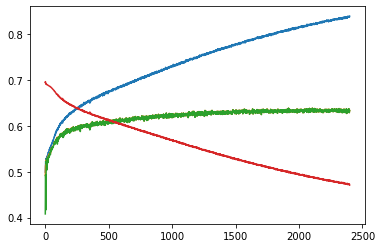

epoch: 0
train_acc: 0.8372051484108222
test_acc: 0.6300327813734555
f1: 0.6300139198908173

epoch: 1
train_acc: 0.8390964013659049
test_acc: 0.6332268639152727
f1: 0.6330704726311894

epoch: 2
train_acc: 0.8375623850801156
test_acc: 0.6345297133731193
f1: 0.6344787765732318

epoch: 3
train_acc: 0.8385500394011032
test_acc: 0.6350340421955115
f1: 0.6350292381745017

epoch: 4
train_acc: 0.8390333596007354
test_acc: 0.6341514667563252
f1: 0.63403028090875

epoch: 5
train_acc: 0.8376884686104544
test_acc: 0.6329746995040767
f1: 0.6329231769780659

epoch: 6
train_acc: 0.8391594431310744
test_acc: 0.6322602336723544
f1: 0.63226053765694

epoch: 7
train_acc: 0.8392434988179669
test_acc: 0.6344456585693873
f1: 0.6343798355052165

epoch: 8
train_acc: 0.840514841082217
test_acc: 0.6358325628309658
f1: 0.6357623529335944

epoch: 9
train_acc: 0.8389913317572892
test_acc: 0.628729931915609
f1: 0.6287293154772511

epoch: 10
train_acc: 0.8403047018649855
test_acc: 0.6328486172984786
f1: 0.63273641073

epoch: 89
train_acc: 0.8429734699238245
test_acc: 0.6360006724384298
f1: 0.6359586712671691

epoch: 90
train_acc: 0.8441292356185973
test_acc: 0.63621080944776
f1: 0.6361376439291897

epoch: 91
train_acc: 0.8436249014972419
test_acc: 0.6349079599899135
f1: 0.634865832732698

epoch: 92
train_acc: 0.8433412135539795
test_acc: 0.6322182062704883
f1: 0.6321744118493803

epoch: 93
train_acc: 0.8450118203309692
test_acc: 0.633983357148861
f1: 0.6339716438859025

epoch: 94
train_acc: 0.8430575256107171
test_acc: 0.6350760695973775
f1: 0.6349735242001158

epoch: 95
train_acc: 0.8433412135539795
test_acc: 0.6335210557283348
f1: 0.633427709491586

epoch: 96
train_acc: 0.8429524560021014
test_acc: 0.6308733294107758
f1: 0.6308720534436807

epoch: 97
train_acc: 0.8433201996322564
test_acc: 0.6299907539715894
f1: 0.6299657623151742

epoch: 98
train_acc: 0.8440556868925663
test_acc: 0.6336051105320669
f1: 0.6335547777102583

epoch: 99
train_acc: 0.8429419490412399
test_acc: 0.6349499873917794
f1: 0.

epoch: 177
train_acc: 0.8471132125032834
test_acc: 0.633941329746995
f1: 0.6338586511801921

epoch: 178
train_acc: 0.8464722878907276
test_acc: 0.6303269731865176
f1: 0.6301910986736392

epoch: 179
train_acc: 0.8479957972156553
test_acc: 0.626208287803648
f1: 0.6262052269004279

epoch: 180
train_acc: 0.8462621486734961
test_acc: 0.63621080944776
f1: 0.6362004045184653

epoch: 181
train_acc: 0.8461255581822957
test_acc: 0.6303269731865176
f1: 0.6301750922902797

epoch: 182
train_acc: 0.8478697136853165
test_acc: 0.6349499873917794
f1: 0.6349145964841666

epoch: 183
train_acc: 0.8467874967165747
test_acc: 0.6344876859712533
f1: 0.6344716705425623

epoch: 184
train_acc: 0.8477961649592856
test_acc: 0.6311675212238379
f1: 0.6310933413958605

epoch: 185
train_acc: 0.8473128447596533
test_acc: 0.636378919055224
f1: 0.6363117786136382

epoch: 186
train_acc: 0.8475965327029157
test_acc: 0.633731192737665
f1: 0.6337320486472866

epoch: 187
train_acc: 0.847344365642238
test_acc: 0.63436160376565

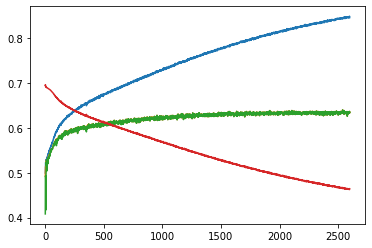

epoch: 0
train_acc: 0.8482899921197794
test_acc: 0.6333949735227368
f1: 0.6333293778153011

epoch: 1
train_acc: 0.8473128447596533
test_acc: 0.6302008909809196
f1: 0.6301787089556603

epoch: 2
train_acc: 0.8485316522195955
test_acc: 0.6330587543078087
f1: 0.6329888707464055

epoch: 3
train_acc: 0.8479747832939323
test_acc: 0.6348659325880474
f1: 0.6348186426098441

epoch: 4
train_acc: 0.8481954294720252
test_acc: 0.6348659325880474
f1: 0.6348427951239608

epoch: 5
train_acc: 0.8491200420278434
test_acc: 0.6331848365134067
f1: 0.6331775589142891

epoch: 6
train_acc: 0.8478907276070397
test_acc: 0.6336891653357989
f1: 0.6335836177670616

epoch: 7
train_acc: 0.8482584712371947
test_acc: 0.6354543162141716
f1: 0.6353191430751686

epoch: 8
train_acc: 0.8481849225111636
test_acc: 0.6354543162141716
f1: 0.6354393767260998

epoch: 9
train_acc: 0.849351195166798
test_acc: 0.6317979322518282
f1: 0.6317561174982899

epoch: 10
train_acc: 0.8498555292881534
test_acc: 0.6346137681768513
f1: 0.634543

epoch: 89
train_acc: 0.8520514841082217
test_acc: 0.6352021518029756
f1: 0.6351339508978074

epoch: 90
train_acc: 0.8521040189125295
test_acc: 0.636294864251492
f1: 0.6361837109047623

epoch: 91
train_acc: 0.8516942474389283
test_acc: 0.6347818777843154
f1: 0.6347373645741619

epoch: 92
train_acc: 0.8537010769634883
test_acc: 0.6325123980835504
f1: 0.6324767708562691

epoch: 93
train_acc: 0.8531442080378251
test_acc: 0.6308733294107758
f1: 0.6307664400718267

epoch: 94
train_acc: 0.8532282637247176
test_acc: 0.6309573842145079
f1: 0.63091811340053

epoch: 95
train_acc: 0.8537536117677962
test_acc: 0.6321761788686223
f1: 0.6321386396620032

epoch: 96
train_acc: 0.8527869713685317
test_acc: 0.6326805076910146
f1: 0.6326270779110121

epoch: 97
train_acc: 0.8534804307853954
test_acc: 0.628561822308145
f1: 0.6284438726333693

epoch: 98
train_acc: 0.8529025479380089
test_acc: 0.6345297133731193
f1: 0.6344306091507063

epoch: 99
train_acc: 0.852534804307854
test_acc: 0.6349079599899135
f1: 0.

epoch: 177
train_acc: 0.8569792487522984
test_acc: 0.6294443977473313
f1: 0.6293147198921769

epoch: 178
train_acc: 0.8548988705017074
test_acc: 0.6328486172984786
f1: 0.6328045560815039

epoch: 179
train_acc: 0.8559705805095876
test_acc: 0.6333109187190048
f1: 0.6333051897426525

epoch: 180
train_acc: 0.8574310480693459
test_acc: 0.6321341514667563
f1: 0.6320409480358132

epoch: 181
train_acc: 0.8557499343314946
test_acc: 0.6331428091115407
f1: 0.6330428172208564

epoch: 182
train_acc: 0.8575045967953769
test_acc: 0.6333949735227368
f1: 0.6333749001054604

epoch: 183
train_acc: 0.8565064355135277
test_acc: 0.633773220139531
f1: 0.6337458312942488

epoch: 184
train_acc: 0.8583661675860258
test_acc: 0.6343616037656552
f1: 0.6342733440225832

epoch: 185
train_acc: 0.8566850538481744
test_acc: 0.633857274943263
f1: 0.6338401614304212

epoch: 186
train_acc: 0.8575676385605464
test_acc: 0.6346978229805833
f1: 0.6346880562061132

epoch: 187
train_acc: 0.8571263462043603
test_acc: 0.633941329

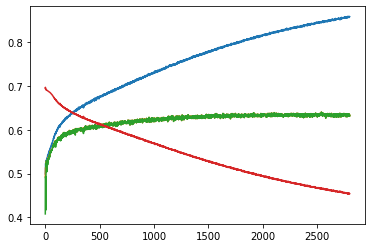

epoch: 0
train_acc: 0.856107171000788
test_acc: 0.6371354122888123
f1: 0.6371171366256076

epoch: 1
train_acc: 0.8590491200420278
test_acc: 0.6286458771118769
f1: 0.6285720799897664

epoch: 2
train_acc: 0.8583031258208563
test_acc: 0.6354122888123056
f1: 0.6353003263497952

epoch: 3
train_acc: 0.856769109535067
test_acc: 0.633857274943263
f1: 0.6337888226061865

epoch: 4
train_acc: 0.856474914630943
test_acc: 0.6354963436160377
f1: 0.6354588283441093

epoch: 5
train_acc: 0.8571053322826373
test_acc: 0.6331848365134067
f1: 0.6331668102952445

epoch: 6
train_acc: 0.8591226687680589
test_acc: 0.6280574934857527
f1: 0.6280128572941058

epoch: 7
train_acc: 0.8573890202258997
test_acc: 0.6333529461208708
f1: 0.6333180144709359

epoch: 8
train_acc: 0.8573680063041765
test_acc: 0.636378919055224
f1: 0.6363448795774999

epoch: 9
train_acc: 0.8583241397425795
test_acc: 0.6324283432798185
f1: 0.6323678856994873

epoch: 10
train_acc: 0.8571473601260835
test_acc: 0.6333529461208708
f1: 0.6333040297

epoch: 89
train_acc: 0.8615707906488048
test_acc: 0.6344036311675212
f1: 0.6342565373597869

epoch: 90
train_acc: 0.8618439716312056
test_acc: 0.6329746995040767
f1: 0.6329594528691972

epoch: 91
train_acc: 0.8618965064355135
test_acc: 0.633815247541397
f1: 0.6337600902550603

epoch: 92
train_acc: 0.8612450748620961
test_acc: 0.6324703706816844
f1: 0.6324157745256369

epoch: 93
train_acc: 0.861224060940373
test_acc: 0.6325964528872825
f1: 0.6325716372284476

epoch: 94
train_acc: 0.8647018649855529
test_acc: 0.6345717407749852
f1: 0.6345240582231761

epoch: 95
train_acc: 0.8604570527974783
test_acc: 0.6315037404387661
f1: 0.6314214464721722

epoch: 96
train_acc: 0.861812450748621
test_acc: 0.6327645624947466
f1: 0.6327000979858597

epoch: 97
train_acc: 0.86173890202259
test_acc: 0.6315037404387661
f1: 0.6314833271624204

epoch: 98
train_acc: 0.8610664565274494
test_acc: 0.6324703706816844
f1: 0.6323628836414745

epoch: 99
train_acc: 0.8613396375098503
test_acc: 0.6333949735227368
f1: 0.

epoch: 177
train_acc: 0.8639978986078277
test_acc: 0.63642094645709
f1: 0.6364220272659387

epoch: 178
train_acc: 0.8640819542947202
test_acc: 0.633983357148861
f1: 0.633792355813805

epoch: 179
train_acc: 0.8644707118465984
test_acc: 0.6342355215600571
f1: 0.6341378599722536

epoch: 180
train_acc: 0.864355135277121
test_acc: 0.6351180969992435
f1: 0.6350954731482721

epoch: 181
train_acc: 0.8651746782243236
test_acc: 0.6320080692611583
f1: 0.6319760131306503

epoch: 182
train_acc: 0.8644917257683216
test_acc: 0.6317979322518282
f1: 0.6316043684317342

epoch: 183
train_acc: 0.8639558707643814
test_acc: 0.6335210557283348
f1: 0.6334542294806412

epoch: 184
train_acc: 0.8648069345941687
test_acc: 0.6336471379339329
f1: 0.6336216107632642

epoch: 185
train_acc: 0.8651116364591542
test_acc: 0.6317138774480962
f1: 0.631624493679064

epoch: 186
train_acc: 0.8647649067507224
test_acc: 0.6358325628309658
f1: 0.6357657404375913

epoch: 187
train_acc: 0.8635881271342264
test_acc: 0.6378078507186

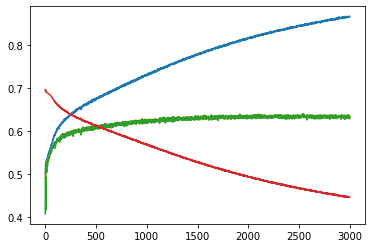

epoch: 0
train_acc: 0.8650906225374311
test_acc: 0.6373035218962764
f1: 0.6372572474162733

epoch: 1
train_acc: 0.86448121880746
test_acc: 0.6309994116163739
f1: 0.6309926746812037

epoch: 2
train_acc: 0.8650170738114
test_acc: 0.6369673026813483
f1: 0.6369202848600175

epoch: 3
train_acc: 0.8651746782243236
test_acc: 0.6344036311675212
f1: 0.634359414856992

epoch: 4
train_acc: 0.8651956921460467
test_acc: 0.6328906447003446
f1: 0.6328695942223571

epoch: 5
train_acc: 0.8646388232203835
test_acc: 0.633899302345129
f1: 0.6338628801099595

epoch: 6
train_acc: 0.8663619648016812
test_acc: 0.6370093300832143
f1: 0.6368989308279748

epoch: 7
train_acc: 0.8643866561597058
test_acc: 0.6309994116163739
f1: 0.6309103402894576

epoch: 8
train_acc: 0.8663199369582348
test_acc: 0.6327645624947466
f1: 0.6327103896394468

epoch: 9
train_acc: 0.8662463882322038
test_acc: 0.6343616037656552
f1: 0.6342614328967421

epoch: 10
train_acc: 0.8670554242185448
test_acc: 0.6354963436160377
f1: 0.635443696331

epoch: 89
train_acc: 0.8692618859994746
test_acc: 0.631377658233168
f1: 0.6312152958225883

epoch: 90
train_acc: 0.8679275019700552
test_acc: 0.6326384802891485
f1: 0.632639478903786

epoch: 91
train_acc: 0.8687785657998424
test_acc: 0.6340674119525931
f1: 0.6340303806147749

epoch: 92
train_acc: 0.868200682952456
test_acc: 0.6335210557283348
f1: 0.6333176166712224

epoch: 93
train_acc: 0.8675807722616233
test_acc: 0.6320500966630243
f1: 0.6319915631359655

epoch: 94
train_acc: 0.8686629892303651
test_acc: 0.6334370009246029
f1: 0.6334231831852242

epoch: 95
train_acc: 0.8675912792224849
test_acc: 0.6333529461208708
f1: 0.6332885848968458

epoch: 96
train_acc: 0.8694510112949829
test_acc: 0.6330587543078087
f1: 0.6329535510801526

epoch: 97
train_acc: 0.8700499080640924
test_acc: 0.6342775489619231
f1: 0.634234339001422

epoch: 98
train_acc: 0.8692093511951668
test_acc: 0.6348659325880474
f1: 0.6348544288147602

epoch: 99
train_acc: 0.8690202258996585
test_acc: 0.6343616037656552
f1: 0

epoch: 177
train_acc: 0.8721407932755451
test_acc: 0.63642094645709
f1: 0.6363355580427678

epoch: 178
train_acc: 0.87177304964539
test_acc: 0.6327645624947466
f1: 0.6327402746098728

epoch: 179
train_acc: 0.8713317572892041
test_acc: 0.628687904513743
f1: 0.6285282806081446

epoch: 180
train_acc: 0.8714263199369582
test_acc: 0.6352021518029756
f1: 0.6351583730296994

epoch: 181
train_acc: 0.8719306540583136
test_acc: 0.6314617130369
f1: 0.631432205227356

epoch: 182
train_acc: 0.8737483582873654
test_acc: 0.6372614944944104
f1: 0.6372387568264932

epoch: 183
train_acc: 0.8719621749408983
test_acc: 0.6329326721022106
f1: 0.6328488289921521

epoch: 184
train_acc: 0.8733175728920409
test_acc: 0.6336471379339329
f1: 0.6335934726630806

epoch: 185
train_acc: 0.8724665090622538
test_acc: 0.631419685635034
f1: 0.6313794852552053

epoch: 186
train_acc: 0.8724034672970843
test_acc: 0.6344456585693873
f1: 0.6344044758334219

epoch: 187
train_acc: 0.8716889939584975
test_acc: 0.6327645624947466


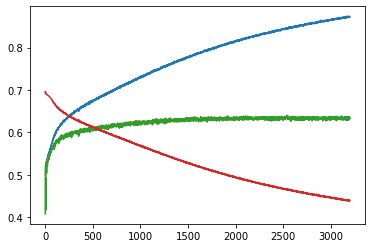

epoch: 0
train_acc: 0.8709535066981875
test_acc: 0.633857274943263
f1: 0.6337938226373138

epoch: 1
train_acc: 0.8717520357236669
test_acc: 0.6344456585693873
f1: 0.634306520938179

epoch: 2
train_acc: 0.8734751773049645
test_acc: 0.6342775489619231
f1: 0.6342780269891437

epoch: 3
train_acc: 0.8735066981875492
test_acc: 0.6297385895603934
f1: 0.6297166264011862

epoch: 4
train_acc: 0.8731599684791174
test_acc: 0.6348659325880474
f1: 0.634766919537872

epoch: 5
train_acc: 0.8738008930916732
test_acc: 0.6372614944944104
f1: 0.6372176238223587

epoch: 6
train_acc: 0.87177304964539
test_acc: 0.6358745902328318
f1: 0.6358757144730649

epoch: 7
train_acc: 0.8740320462306278
test_acc: 0.633731192737665
f1: 0.6336588430857543

epoch: 8
train_acc: 0.8718781192540058
test_acc: 0.6336471379339329
f1: 0.6334531261410731

epoch: 9
train_acc: 0.8721197793538219
test_acc: 0.6349920147936454
f1: 0.634981747159514

epoch: 10
train_acc: 0.8743052272130286
test_acc: 0.6320080692611583
f1: 0.632007458265

epoch: 89
train_acc: 0.8765852377199895
test_acc: 0.6331007817096747
f1: 0.6330435881120305

epoch: 90
train_acc: 0.8744102968216443
test_acc: 0.6359586450365639
f1: 0.635951713129024

epoch: 91
train_acc: 0.8755975833990018
test_acc: 0.6343195763637892
f1: 0.6342637300078661

epoch: 92
train_acc: 0.8763856054636197
test_acc: 0.6317979322518282
f1: 0.6317056327648041

epoch: 93
train_acc: 0.876059889676911
test_acc: 0.6341094393544591
f1: 0.6340940336710229

epoch: 94
train_acc: 0.8755660625164171
test_acc: 0.6299907539715894
f1: 0.629962530541567

epoch: 95
train_acc: 0.8767113212503284
test_acc: 0.6346137681768513
f1: 0.6345367275179489

epoch: 96
train_acc: 0.8752613606514316
test_acc: 0.6305791375977137
f1: 0.6305215509169242

epoch: 97
train_acc: 0.8775623850801155
test_acc: 0.6346557955787173
f1: 0.6346414293839919

epoch: 98
train_acc: 0.8757972156553717
test_acc: 0.6336891653357989
f1: 0.6336410109990056

epoch: 99
train_acc: 0.8775098502758077
test_acc: 0.6307052198033117
f1: 

epoch: 177
train_acc: 0.8777199894930391
test_acc: 0.6326384802891485
f1: 0.6326395931086163

epoch: 178
train_acc: 0.8792014709745206
test_acc: 0.6327645624947466
f1: 0.6326412171205964

epoch: 179
train_acc: 0.878949303913843
test_acc: 0.63125157602757
f1: 0.6310273773650565

epoch: 180
train_acc: 0.8797583399001838
test_acc: 0.6345717407749852
f1: 0.6345503063948653

epoch: 181
train_acc: 0.8799054373522459
test_acc: 0.6353282340085736
f1: 0.6353096424960379

epoch: 182
train_acc: 0.8788127134226426
test_acc: 0.6304110279902496
f1: 0.6302654412474259

epoch: 183
train_acc: 0.8791279222484897
test_acc: 0.6341514667563252
f1: 0.634118715071879

epoch: 184
train_acc: 0.8780246913580247
test_acc: 0.6320921240648903
f1: 0.6320808942457138

epoch: 185
train_acc: 0.8779511426319937
test_acc: 0.6309994116163739
f1: 0.6309494536771053

epoch: 186
train_acc: 0.8809981612818493
test_acc: 0.6319240144574263
f1: 0.631866637420981

epoch: 187
train_acc: 0.8802626740215392
test_acc: 0.632470370681

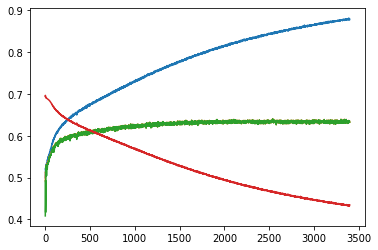

epoch: 0
train_acc: 0.8786866298923036
test_acc: 0.6342355215600571
f1: 0.6341675632924992

epoch: 1
train_acc: 0.8797163120567376
test_acc: 0.6340253845507271
f1: 0.6339135376194442

epoch: 2
train_acc: 0.8806934594168637
test_acc: 0.6361687820458939
f1: 0.6361109037199376

epoch: 3
train_acc: 0.877919621749409
test_acc: 0.6329326721022106
f1: 0.6328879335087144

epoch: 4
train_acc: 0.8800105069608616
test_acc: 0.633815247541397
f1: 0.633756208004726

epoch: 5
train_acc: 0.8796532702915681
test_acc: 0.6345297133731193
f1: 0.6344517533725167

epoch: 6
train_acc: 0.8796007354872603
test_acc: 0.6358745902328318
f1: 0.6358315689621145

epoch: 7
train_acc: 0.8796112424481218
test_acc: 0.6333949735227368
f1: 0.6333492516566295

epoch: 8
train_acc: 0.8800630417651695
test_acc: 0.6325123980835504
f1: 0.6324207693504834

epoch: 9
train_acc: 0.8790648804833202
test_acc: 0.6331007817096747
f1: 0.6330738844574958

epoch: 10
train_acc: 0.879338061465721
test_acc: 0.6322182062704883
f1: 0.632216607

epoch: 89
train_acc: 0.8833622274757027
test_acc: 0.6300327813734555
f1: 0.6299524832275794

epoch: 90
train_acc: 0.8824691358024691
test_acc: 0.6366310834664201
f1: 0.6365200328729576

epoch: 91
train_acc: 0.882521670606777
test_acc: 0.6329746995040767
f1: 0.63296437512309

epoch: 92
train_acc: 0.882521670606777
test_acc: 0.6317138774480962
f1: 0.6316968817014746

epoch: 93
train_acc: 0.8816495928552666
test_acc: 0.6318399596536942
f1: 0.6317431790898677

epoch: 94
train_acc: 0.882815865510901
test_acc: 0.6342355215600571
f1: 0.6341781164236465

epoch: 95
train_acc: 0.8828053585500394
test_acc: 0.6318819870555602
f1: 0.6317743279377559

epoch: 96
train_acc: 0.8845810349356449
test_acc: 0.6326805076910146
f1: 0.6325994034977032

epoch: 97
train_acc: 0.8821118991331758
test_acc: 0.6307892746070438
f1: 0.6307172207215838

epoch: 98
train_acc: 0.8827843446283162
test_acc: 0.6357485080272337
f1: 0.6357128875654197

epoch: 99
train_acc: 0.8823535592329919
test_acc: 0.6285197949062789
f1: 0.

epoch: 177
train_acc: 0.8857578145521408
test_acc: 0.6332268639152727
f1: 0.6332252695677163

epoch: 178
train_acc: 0.8840346729708431
test_acc: 0.6351180969992435
f1: 0.6350729362366535

epoch: 179
train_acc: 0.8854846335697399
test_acc: 0.6325964528872825
f1: 0.6324786751849957

epoch: 180
train_acc: 0.8852744943525085
test_acc: 0.6356644532235017
f1: 0.6356335826318802

epoch: 181
train_acc: 0.8843183609141057
test_acc: 0.6342355215600571
f1: 0.6342313111159928

epoch: 182
train_acc: 0.8851273969004465
test_acc: 0.6293603429435992
f1: 0.6293112574024149

epoch: 183
train_acc: 0.8845600210139217
test_acc: 0.6357905354290998
f1: 0.6355766073636937

epoch: 184
train_acc: 0.8850748620961387
test_acc: 0.6293183155417332
f1: 0.6292932784665874

epoch: 185
train_acc: 0.8832466509062253
test_acc: 0.6347818777843154
f1: 0.6347823551523396

epoch: 186
train_acc: 0.8851799317047544
test_acc: 0.6324283432798185
f1: 0.6322644842182973

epoch: 187
train_acc: 0.8852324665090623
test_acc: 0.6327645

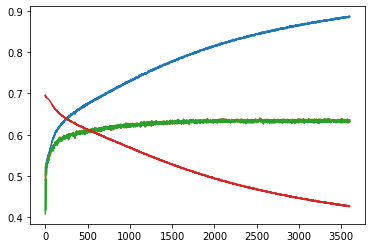

epoch: 0
train_acc: 0.885432098765432
test_acc: 0.6367151382701521
f1: 0.6366857719005149

epoch: 1
train_acc: 0.8862726556343578
test_acc: 0.6336891653357989
f1: 0.6336707161024782

epoch: 2
train_acc: 0.885411084843709
test_acc: 0.6353282340085736
f1: 0.6352247230407515

epoch: 3
train_acc: 0.8864512739690045
test_acc: 0.6325544254854165
f1: 0.6324522106053639

epoch: 4
train_acc: 0.8872392960336223
test_acc: 0.633815247541397
f1: 0.6338092573623599

epoch: 5
train_acc: 0.8860204885736801
test_acc: 0.6344036311675212
f1: 0.6343340037364541

epoch: 6
train_acc: 0.8865668505384817
test_acc: 0.6340674119525931
f1: 0.633940505954401

epoch: 7
train_acc: 0.8856002101392172
test_acc: 0.6311254938219719
f1: 0.6311033672580783

epoch: 8
train_acc: 0.8863987391646966
test_acc: 0.6344036311675212
f1: 0.6343786785760906

epoch: 9
train_acc: 0.8858944050433412
test_acc: 0.6335210557283348
f1: 0.6334867487188854

epoch: 10
train_acc: 0.8870081428946677
test_acc: 0.6327225350928806
f1: 0.632643734

epoch: 89
train_acc: 0.8875860257420541
test_acc: 0.6301168361771875
f1: 0.6300393016428205

epoch: 90
train_acc: 0.88822695035461
test_acc: 0.6344456585693873
f1: 0.6344199241972275

epoch: 91
train_acc: 0.8888153401628579
test_acc: 0.6352862066067075
f1: 0.6352410666507347

epoch: 92
train_acc: 0.8879852902547938
test_acc: 0.6334790283264689
f1: 0.6334175408743117

epoch: 93
train_acc: 0.8883320199632256
test_acc: 0.6341094393544591
f1: 0.6340452109252568

epoch: 94
train_acc: 0.8892461255581823
test_acc: 0.6325123980835504
f1: 0.6324773863518872

epoch: 95
train_acc: 0.8893091673233517
test_acc: 0.633857274943263
f1: 0.6337538674014342

epoch: 96
train_acc: 0.8883320199632256
test_acc: 0.6347818777843154
f1: 0.6347039715739616

epoch: 97
train_acc: 0.8886787496716575
test_acc: 0.6367991930738842
f1: 0.6367843087003638

epoch: 98
train_acc: 0.8879432624113475
test_acc: 0.6305791375977137
f1: 0.6305039489783989

epoch: 99
train_acc: 0.888468610454426
test_acc: 0.6304530553921157
f1: 0

epoch: 177
train_acc: 0.890748620961387
test_acc: 0.6333529461208708
f1: 0.633344130429771

epoch: 178
train_acc: 0.8915996847911741
test_acc: 0.6349079599899135
f1: 0.6348268875882196

epoch: 179
train_acc: 0.8913054898870502
test_acc: 0.631209548625704
f1: 0.6311539988509302

epoch: 180
train_acc: 0.8900341476228001
test_acc: 0.6327225350928806
f1: 0.6326709771683635

epoch: 181
train_acc: 0.8910428158655109
test_acc: 0.6346557955787173
f1: 0.6345870683692106

epoch: 182
train_acc: 0.8912739690044654
test_acc: 0.6342355215600571
f1: 0.6341132359767119

epoch: 183
train_acc: 0.8915156291042816
test_acc: 0.6315457678406321
f1: 0.6314729864983142

epoch: 184
train_acc: 0.8910638297872341
test_acc: 0.6350760695973775
f1: 0.635010774684198

epoch: 185
train_acc: 0.8901287102705543
test_acc: 0.6320921240648903
f1: 0.6319807709962909

epoch: 186
train_acc: 0.8925558182295771
test_acc: 0.6349079599899135
f1: 0.6348684645263467

epoch: 187
train_acc: 0.8911794063567113
test_acc: 0.62847776750

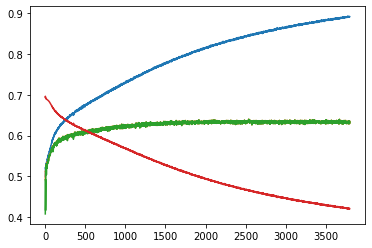

epoch: 0
train_acc: 0.8927449435250854
test_acc: 0.6332688913171388
f1: 0.633143433443131

epoch: 1
train_acc: 0.8911688993958498
test_acc: 0.6360006724384298
f1: 0.635984723303338

epoch: 2
train_acc: 0.891946414499606
test_acc: 0.6334790283264689
f1: 0.6334513448744294

epoch: 3
train_acc: 0.8904439190964014
test_acc: 0.6331428091115407
f1: 0.6330694667459948

epoch: 4
train_acc: 0.8918938796952981
test_acc: 0.6325964528872825
f1: 0.6324819872339139

epoch: 5
train_acc: 0.8925242973469923
test_acc: 0.6350760695973775
f1: 0.635070631197155

epoch: 6
train_acc: 0.8909692671394799
test_acc: 0.6348659325880474
f1: 0.6348113135723549

epoch: 7
train_acc: 0.891578670869451
test_acc: 0.6322182062704883
f1: 0.6320415643485474

epoch: 8
train_acc: 0.8905594956658787
test_acc: 0.6346137681768513
f1: 0.634571271920959

epoch: 9
train_acc: 0.8919779353821907
test_acc: 0.6316298226443642
f1: 0.631587317129285

epoch: 10
train_acc: 0.891358024691358
test_acc: 0.6325544254854165
f1: 0.6325099855264

epoch: 89
train_acc: 0.8927029156816391
test_acc: 0.6333529461208708
f1: 0.6332419746597716

epoch: 90
train_acc: 0.8931126871552404
test_acc: 0.6319240144574263
f1: 0.6317715272649879

epoch: 91
train_acc: 0.8935014447071185
test_acc: 0.6325123980835504
f1: 0.6324803858856106

epoch: 92
train_acc: 0.8944785920672446
test_acc: 0.6327645624947466
f1: 0.632728339448196

epoch: 93
train_acc: 0.8936275282374573
test_acc: 0.6341094393544591
f1: 0.6339034072884402

epoch: 94
train_acc: 0.8931757289204098
test_acc: 0.6304950827939817
f1: 0.630464641769737

epoch: 95
train_acc: 0.8929760966640399
test_acc: 0.631419685635034
f1: 0.6314203236391017

epoch: 96
train_acc: 0.8937641187286577
test_acc: 0.6319660418592923
f1: 0.6318852423468376

epoch: 97
train_acc: 0.8944260572629367
test_acc: 0.6327645624947466
f1: 0.632563613025792

epoch: 98
train_acc: 0.8944890990281061
test_acc: 0.6319660418592923
f1: 0.6319330945300912

epoch: 99
train_acc: 0.8942054110848437
test_acc: 0.6348239051861814
f1: 0

epoch: 177
train_acc: 0.8972419227738376
test_acc: 0.6344036311675212
f1: 0.6343849925173487

epoch: 178
train_acc: 0.8961912266876806
test_acc: 0.6341514667563252
f1: 0.6339174708671692

epoch: 179
train_acc: 0.8964854215918046
test_acc: 0.6351180969992435
f1: 0.6350627549200429

epoch: 180
train_acc: 0.8959285526661414
test_acc: 0.6327645624947466
f1: 0.6327550787640986

epoch: 181
train_acc: 0.8964539007092198
test_acc: 0.633773220139531
f1: 0.6337332764554001

epoch: 182
train_acc: 0.8959180457052798
test_acc: 0.6268386988316382
f1: 0.6266425279426283

epoch: 183
train_acc: 0.8960966640399265
test_acc: 0.6342355215600571
f1: 0.6341388684403382

epoch: 184
train_acc: 0.8962227475702653
test_acc: 0.6328065898966125
f1: 0.6327621804351694

epoch: 185
train_acc: 0.8968846861045443
test_acc: 0.6342775489619231
f1: 0.6342600183524357

epoch: 186
train_acc: 0.8961071710007881
test_acc: 0.6328486172984786
f1: 0.6327825066651612

epoch: 187
train_acc: 0.8976832151300237
test_acc: 0.63314280

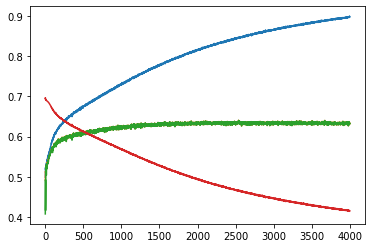

epoch: 0
train_acc: 0.8951510375623851
test_acc: 0.6345297133731193
f1: 0.6345306868397776

epoch: 1
train_acc: 0.8970317835566063
test_acc: 0.6336051105320669
f1: 0.6335737761021663

epoch: 2
train_acc: 0.8970317835566063
test_acc: 0.6328065898966125
f1: 0.6324923474615566

epoch: 3
train_acc: 0.8951510375623851
test_acc: 0.6341514667563252
f1: 0.6340860064063045

epoch: 4
train_acc: 0.8963173102180194
test_acc: 0.6318819870555602
f1: 0.631871975277276

epoch: 5
train_acc: 0.8967270816916207
test_acc: 0.6369673026813483
f1: 0.6368934142520376

epoch: 6
train_acc: 0.8959180457052798
test_acc: 0.6320080692611583
f1: 0.6318237606842696

epoch: 7
train_acc: 0.8966325190438665
test_acc: 0.6323022610742204
f1: 0.6322591575063499

epoch: 8
train_acc: 0.8976727081691621
test_acc: 0.6351601244011095
f1: 0.6351505369054863

epoch: 9
train_acc: 0.897378513265038
test_acc: 0.6299907539715894
f1: 0.6298798505409254

epoch: 10
train_acc: 0.8976096664039926
test_acc: 0.6346137681768513
f1: 0.6345136

epoch: 89
train_acc: 0.8997951142631994
test_acc: 0.6341934941581912
f1: 0.6341145548122988

epoch: 90
train_acc: 0.8989125295508275
test_acc: 0.6367151382701521
f1: 0.6365744599244926

epoch: 91
train_acc: 0.8990175991594431
test_acc: 0.6350760695973775
f1: 0.6350495847006475

epoch: 92
train_acc: 0.8983556606251641
test_acc: 0.6326384802891485
f1: 0.6326316298687006

epoch: 93
train_acc: 0.8977147360126083
test_acc: 0.6328906447003446
f1: 0.6327757223860928

epoch: 94
train_acc: 0.8999947465195692
test_acc: 0.6327225350928806
f1: 0.6325997436746507

epoch: 95
train_acc: 0.8988284738639348
test_acc: 0.6328906447003446
f1: 0.6328462454047391

epoch: 96
train_acc: 0.8979353821907013
test_acc: 0.6302008909809196
f1: 0.6301689720757877

epoch: 97
train_acc: 0.8986078276858419
test_acc: 0.6315457678406321
f1: 0.6314738615897694

epoch: 98
train_acc: 0.8992697662201208
test_acc: 0.6316718500462302
f1: 0.6315328677721754

epoch: 99
train_acc: 0.8996690307328605
test_acc: 0.6333949735227368
f

epoch: 177
train_acc: 0.8995954820068295
test_acc: 0.6334370009246029
f1: 0.6334215669284013

epoch: 178
train_acc: 0.9023377987916995
test_acc: 0.6328065898966125
f1: 0.6327766240883657

epoch: 179
train_acc: 0.901591804570528
test_acc: 0.6330167269059427
f1: 0.6329481174239233

epoch: 180
train_acc: 0.9004990806409247
test_acc: 0.6315037404387661
f1: 0.6313822435856795

epoch: 181
train_acc: 0.9018965064355136
test_acc: 0.6343616037656552
f1: 0.6343084185155385

epoch: 182
train_acc: 0.901518255844497
test_acc: 0.6326805076910146
f1: 0.6326710217896799

epoch: 183
train_acc: 0.901224060940373
test_acc: 0.6361267546440279
f1: 0.6360187528608352

epoch: 184
train_acc: 0.9009403729971106
test_acc: 0.6309994116163739
f1: 0.6309151269236427

epoch: 185
train_acc: 0.9012765957446809
test_acc: 0.6331428091115407
f1: 0.6331341484319957

epoch: 186
train_acc: 0.9011189913317573
test_acc: 0.6315037404387661
f1: 0.6314654945766308

epoch: 187
train_acc: 0.9006461780929866
test_acc: 0.6335630831

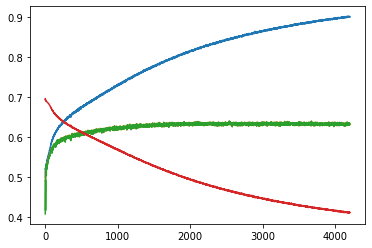

epoch: 0
train_acc: 0.900562122406094
test_acc: 0.6354122888123056
f1: 0.6352937530193796

epoch: 1
train_acc: 0.8999527186761229
test_acc: 0.633983357148861
f1: 0.6339712771513113

epoch: 2
train_acc: 0.9010979774100342
test_acc: 0.6346137681768513
f1: 0.6345074356271182

epoch: 3
train_acc: 0.8999527186761229
test_acc: 0.6303690005883836
f1: 0.6301419529431782

epoch: 4
train_acc: 0.9018229577094825
test_acc: 0.6322602336723544
f1: 0.6322245819982107

epoch: 5
train_acc: 0.9012030470186498
test_acc: 0.6319240144574263
f1: 0.6319186597669104

epoch: 6
train_acc: 0.9009929078014184
test_acc: 0.6311675212238379
f1: 0.6311298790760672

epoch: 7
train_acc: 0.9009193590753874
test_acc: 0.6319660418592923
f1: 0.6317491142709496

epoch: 8
train_acc: 0.9022957709482532
test_acc: 0.6347398503824494
f1: 0.6346276814185672

epoch: 9
train_acc: 0.9025164171263462
test_acc: 0.6316718500462302
f1: 0.6316420759990876

epoch: 10
train_acc: 0.9024113475177304
test_acc: 0.6334370009246029
f1: 0.6334073

epoch: 89
train_acc: 0.9036931967428421
test_acc: 0.6347818777843154
f1: 0.6347225997923186

epoch: 90
train_acc: 0.9034200157604413
test_acc: 0.6325123980835504
f1: 0.6325075608703181

epoch: 91
train_acc: 0.9032729183083793
test_acc: 0.6356224258216358
f1: 0.6355780150584559

epoch: 92
train_acc: 0.9027055424218545
test_acc: 0.6319240144574263
f1: 0.6317777873337929

epoch: 93
train_acc: 0.904260572629367
test_acc: 0.6291081785324031
f1: 0.6290050049859702

epoch: 94
train_acc: 0.9032939322301025
test_acc: 0.6305371101958477
f1: 0.6304896166534261

epoch: 95
train_acc: 0.903525085369057
test_acc: 0.636294864251492
f1: 0.6362614157799437

epoch: 96
train_acc: 0.9028001050696086
test_acc: 0.6315457678406321
f1: 0.6314781588478202

epoch: 97
train_acc: 0.9038087733123195
test_acc: 0.6325123980835504
f1: 0.6324574270115875

epoch: 98
train_acc: 0.9036721828211189
test_acc: 0.6322602336723544
f1: 0.6322245819982107

epoch: 99
train_acc: 0.9017283950617284
test_acc: 0.6304950827939817
f1: 

epoch: 177
train_acc: 0.9057000262674022
test_acc: 0.633815247541397
f1: 0.6337922938511453

epoch: 178
train_acc: 0.9046808510638298
test_acc: 0.6340253845507271
f1: 0.6339721503946332

epoch: 179
train_acc: 0.9056369845022327
test_acc: 0.6349920147936454
f1: 0.6348955615769661

epoch: 180
train_acc: 0.9040819542947203
test_acc: 0.628813986719341
f1: 0.6287694413131687

epoch: 181
train_acc: 0.905090622537431
test_acc: 0.6304530553921157
f1: 0.630388599782675

epoch: 182
train_acc: 0.9068137641187286
test_acc: 0.6348239051861814
f1: 0.6347610275704598

epoch: 183
train_acc: 0.9050275807722616
test_acc: 0.6300327813734555
f1: 0.6299823258412982

epoch: 184
train_acc: 0.9059206724454951
test_acc: 0.6331848365134067
f1: 0.6331196186950013

epoch: 185
train_acc: 0.9051851851851852
test_acc: 0.6301588635790536
f1: 0.6300311832934617

epoch: 186
train_acc: 0.9059627002889414
test_acc: 0.6315037404387661
f1: 0.6314917636065938

epoch: 187
train_acc: 0.9050801155765695
test_acc: 0.63612675464

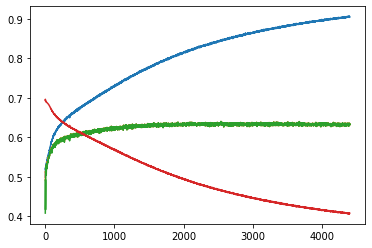

epoch: 0
train_acc: 0.906561597058051
test_acc: 0.6302849457846516
f1: 0.6302536193808571

epoch: 1
train_acc: 0.9053217756763856
test_acc: 0.6322602336723544
f1: 0.6322359124326375

epoch: 2
train_acc: 0.9052692408720777
test_acc: 0.6323022610742204
f1: 0.6322483987988177

epoch: 3
train_acc: 0.905679012345679
test_acc: 0.633941329746995
f1: 0.633872041850375

epoch: 4
train_acc: 0.9065826109797741
test_acc: 0.6321761788686223
f1: 0.6320409840372545

epoch: 5
train_acc: 0.9054268452850013
test_acc: 0.6334370009246029
f1: 0.6333936916536891

epoch: 6
train_acc: 0.9057945889151563
test_acc: 0.6273010002521644
f1: 0.6272527305092194

epoch: 7
train_acc: 0.90575256107171
test_acc: 0.6334790283264689
f1: 0.633391036825347

epoch: 8
train_acc: 0.9060572629366955
test_acc: 0.6314617130369
f1: 0.631408483008579

epoch: 9
train_acc: 0.9055844496979248
test_acc: 0.6284357401025469
f1: 0.6283843262136898

epoch: 10
train_acc: 0.9054478592067244
test_acc: 0.6299066991678575
f1: 0.629844205002021


epoch: 89
train_acc: 0.9064985552928815
test_acc: 0.6329746995040767
f1: 0.6329356433580264

epoch: 90
train_acc: 0.9067402153926977
test_acc: 0.6304950827939817
f1: 0.6304611009402894

epoch: 91
train_acc: 0.9080220646178093
test_acc: 0.6323442884760864
f1: 0.6323312089032141

epoch: 92
train_acc: 0.9066666666666666
test_acc: 0.6318399596536942
f1: 0.6317950878791321

epoch: 93
train_acc: 0.907612293144208
test_acc: 0.6294864251491973
f1: 0.6294055454924948

epoch: 94
train_acc: 0.9078014184397163
test_acc: 0.6308733294107758
f1: 0.6306691536448658

epoch: 95
train_acc: 0.9084318360914105
test_acc: 0.6310834664201059
f1: 0.6310489312218324

epoch: 96
train_acc: 0.9067927501970056
test_acc: 0.6315877952424981
f1: 0.6315880034776203

epoch: 97
train_acc: 0.9069083267664828
test_acc: 0.6352021518029756
f1: 0.6351697887125524

epoch: 98
train_acc: 0.9071289729445757
test_acc: 0.6336471379339329
f1: 0.6335058796908588

epoch: 99
train_acc: 0.9072655634357762
test_acc: 0.6280995208876188
f1

epoch: 177
train_acc: 0.9100919359075388
test_acc: 0.6352021518029756
f1: 0.6351917180245238

epoch: 178
train_acc: 0.910354609929078
test_acc: 0.6340253845507271
f1: 0.633986117557675

epoch: 179
train_acc: 0.9087365379563961
test_acc: 0.6352441792048416
f1: 0.6350730151749199

epoch: 180
train_acc: 0.9078224323614394
test_acc: 0.6315457678406321
f1: 0.6314049187223849

epoch: 181
train_acc: 0.9097557131599685
test_acc: 0.6350340421955115
f1: 0.6350165478479145

epoch: 182
train_acc: 0.9089256632519044
test_acc: 0.6346978229805833
f1: 0.6346665820004621

epoch: 183
train_acc: 0.9089571841344891
test_acc: 0.631377658233168
f1: 0.6312566847412837

epoch: 184
train_acc: 0.9107748883635408
test_acc: 0.6307472472051778
f1: 0.6306387216966284

epoch: 185
train_acc: 0.9099973732597846
test_acc: 0.6335630831302009
f1: 0.6334862709946317

epoch: 186
train_acc: 0.9087050170738113
test_acc: 0.6315457678406321
f1: 0.6315084813195972

epoch: 187
train_acc: 0.9095560809035986
test_acc: 0.6321761788

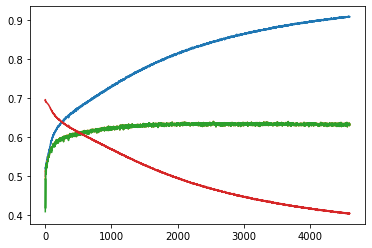

epoch: 0
train_acc: 0.9087995797215656
test_acc: 0.6273850550558965
f1: 0.6273457312909942

epoch: 1
train_acc: 0.9097662201208301
test_acc: 0.6313356308313021
f1: 0.6312588032682998

epoch: 2
train_acc: 0.9088311006041503
test_acc: 0.631377658233168
f1: 0.6313769778243196

epoch: 3
train_acc: 0.9093144208037826
test_acc: 0.631377658233168
f1: 0.6313662262341116

epoch: 4
train_acc: 0.9097662201208301
test_acc: 0.6302849457846516
f1: 0.6301692077653644

epoch: 5
train_acc: 0.9096401365904913
test_acc: 0.628687904513743
f1: 0.6286280383015901

epoch: 6
train_acc: 0.909009718938797
test_acc: 0.6343616037656552
f1: 0.6343497198194988

epoch: 7
train_acc: 0.9095245600210139
test_acc: 0.6293183155417332
f1: 0.6292481525970502

epoch: 8
train_acc: 0.9093144208037826
test_acc: 0.631377658233168
f1: 0.63130916898064

epoch: 9
train_acc: 0.9102915681639085
test_acc: 0.6358745902328318
f1: 0.635856696195921

epoch: 10
train_acc: 0.9102180194378776
test_acc: 0.6304110279902496
f1: 0.6303436346390

epoch: 89
train_acc: 0.910722353559233
test_acc: 0.6291922333361352
f1: 0.6291844226050001

epoch: 90
train_acc: 0.9110900971893879
test_acc: 0.633731192737665
f1: 0.633728498158866

epoch: 91
train_acc: 0.910942999737326
test_acc: 0.6297385895603934
f1: 0.6296800841390082

epoch: 92
train_acc: 0.911678486997636
test_acc: 0.6305791375977137
f1: 0.6304994182904535

epoch: 93
train_acc: 0.9119516679800368
test_acc: 0.6302008909809196
f1: 0.6301388535893898

epoch: 94
train_acc: 0.9113947990543735
test_acc: 0.6294443977473313
f1: 0.6294036513043918

epoch: 95
train_acc: 0.9108589440504334
test_acc: 0.6349079599899135
f1: 0.6348193514310201

epoch: 96
train_acc: 0.9115734173890202
test_acc: 0.6324283432798185
f1: 0.6323517434318912

epoch: 97
train_acc: 0.9117310218019438
test_acc: 0.6352441792048416
f1: 0.6352177065089163

epoch: 98
train_acc: 0.9117310218019438
test_acc: 0.6311675212238379
f1: 0.6311645009307574

epoch: 99
train_acc: 0.9117520357236669
test_acc: 0.63125157602757
f1: 0.63

epoch: 177
train_acc: 0.912655634357762
test_acc: 0.6304110279902496
f1: 0.630326608902792

epoch: 178
train_acc: 0.9135172051484108
test_acc: 0.6310834664201059
f1: 0.6310470775550772

epoch: 179
train_acc: 0.9123194116101917
test_acc: 0.6290661511305371
f1: 0.6290436526835035

epoch: 180
train_acc: 0.9133070659311794
test_acc: 0.6341094393544591
f1: 0.6340040128820604

epoch: 181
train_acc: 0.9122248489624376
test_acc: 0.6308313020089098
f1: 0.6307622839500393

epoch: 182
train_acc: 0.9136117677961649
test_acc: 0.6331848365134067
f1: 0.6330705541726838

epoch: 183
train_acc: 0.9134856842658261
test_acc: 0.631377658233168
f1: 0.6313446582303791

epoch: 184
train_acc: 0.9119411610191752
test_acc: 0.6329326721022106
f1: 0.6329029999744443

epoch: 185
train_acc: 0.9124034672970843
test_acc: 0.6303269731865176
f1: 0.6302267293111329

epoch: 186
train_acc: 0.9130338849487786
test_acc: 0.6325544254854165
f1: 0.6324269947811334

epoch: 187
train_acc: 0.9131389545573942
test_acc: 0.6359166176

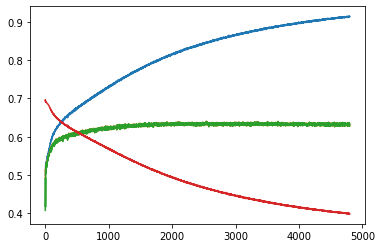

epoch: 0
train_acc: 0.9138639348568427
test_acc: 0.6315037404387661
f1: 0.6314942241478161

epoch: 1
train_acc: 0.9122878907276071
test_acc: 0.6323442884760864
f1: 0.6322721021145384

epoch: 2
train_acc: 0.9126871552403467
test_acc: 0.631377658233168
f1: 0.6313125353394028

epoch: 3
train_acc: 0.9122563698450223
test_acc: 0.6324703706816844
f1: 0.6324431564570563

epoch: 4
train_acc: 0.9129078014184397
test_acc: 0.6324283432798185
f1: 0.632413687557862

epoch: 5
train_acc: 0.9127396900446546
test_acc: 0.6305371101958477
f1: 0.6304806861853982

epoch: 6
train_acc: 0.9141055949566588
test_acc: 0.6309153568126419
f1: 0.6308428898913896

epoch: 7
train_acc: 0.9138849487785659
test_acc: 0.6318819870555602
f1: 0.6318177806774083

epoch: 8
train_acc: 0.9132650380877331
test_acc: 0.6316298226443642
f1: 0.6316014476539977

epoch: 9
train_acc: 0.9132230102442869
test_acc: 0.6313356308313021
f1: 0.6313041023133976

epoch: 10
train_acc: 0.9139584975045968
test_acc: 0.6334790283264689
f1: 0.6333664

epoch: 89
train_acc: 0.9156396112424481
test_acc: 0.6321341514667563
f1: 0.6319574691741326

epoch: 90
train_acc: 0.9146204360388758
test_acc: 0.631377658233168
f1: 0.6313048436838957

epoch: 91
train_acc: 0.915103756238508
test_acc: 0.6309153568126419
f1: 0.6309153568126419

epoch: 92
train_acc: 0.9155030207512477
test_acc: 0.6318819870555602
f1: 0.6318573826200561

epoch: 93
train_acc: 0.9141266088783819
test_acc: 0.6341934941581912
f1: 0.6340762284157174

epoch: 94
train_acc: 0.9151247701602312
test_acc: 0.6314617130369
f1: 0.6314038725633639

epoch: 95
train_acc: 0.9155135277121093
test_acc: 0.6321761788686223
f1: 0.6321571985855077

epoch: 96
train_acc: 0.914221171526136
test_acc: 0.6323863158779525
f1: 0.6323568820987209

epoch: 97
train_acc: 0.9153769372209088
test_acc: 0.6324703706816844
f1: 0.6322552431998355

epoch: 98
train_acc: 0.9142842132913055
test_acc: 0.6336891653357989
f1: 0.6335836177670616

epoch: 99
train_acc: 0.9158917783031258
test_acc: 0.6301588635790536
f1: 0.6

epoch: 177
train_acc: 0.916868925663252
test_acc: 0.6300748087753215
f1: 0.6299595574963294

epoch: 178
train_acc: 0.9158182295770948
test_acc: 0.6335630831302009
f1: 0.6335221317985502

epoch: 179
train_acc: 0.9158182295770948
test_acc: 0.6300748087753215
f1: 0.6300518722242674

epoch: 180
train_acc: 0.9167743630154978
test_acc: 0.6325544254854165
f1: 0.6325277575766165

epoch: 181
train_acc: 0.9159758339900184
test_acc: 0.6304950827939817
f1: 0.6304541208938221

epoch: 182
train_acc: 0.9167638560546362
test_acc: 0.6295284525510633
f1: 0.6295026383937334

epoch: 183
train_acc: 0.9160283687943263
test_acc: 0.6349079599899135
f1: 0.6348697494453732

epoch: 184
train_acc: 0.9157026530076176
test_acc: 0.6308313020089098
f1: 0.630711838680721

epoch: 185
train_acc: 0.9159022852639874
test_acc: 0.6351601244011095
f1: 0.6350889235155455

epoch: 186
train_acc: 0.9168584187023904
test_acc: 0.6305371101958477
f1: 0.6305333218388536

epoch: 187
train_acc: 0.9157446808510639
test_acc: 0.629906699

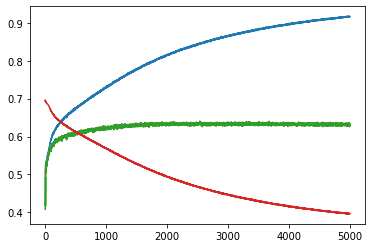

epoch: 0
train_acc: 0.9169319674284213
test_acc: 0.6319660418592923
f1: 0.6318897950852255

epoch: 1
train_acc: 0.9167743630154978
test_acc: 0.6305371101958477
f1: 0.6303909532590576

epoch: 2
train_acc: 0.9161334384029419
test_acc: 0.6323022610742204
f1: 0.632282127825596

epoch: 3
train_acc: 0.9174888363540846
test_acc: 0.6325123980835504
f1: 0.6325103624788092

epoch: 4
train_acc: 0.9163015497767271
test_acc: 0.631209548625704
f1: 0.6311171016449211

epoch: 5
train_acc: 0.9163120567375886
test_acc: 0.6281415482894848
f1: 0.6278883987415302

epoch: 6
train_acc: 0.9162595219332808
test_acc: 0.6322602336723544
f1: 0.6322332747998954

epoch: 7
train_acc: 0.9154820068295245
test_acc: 0.6318819870555602
f1: 0.6318824259458672

epoch: 8
train_acc: 0.9161544523246651
test_acc: 0.6297806169622594
f1: 0.6296838021460242

epoch: 9
train_acc: 0.9171946414499605
test_acc: 0.631209548625704
f1: 0.6310804884942558

epoch: 10
train_acc: 0.9168163908589441
test_acc: 0.6294023703454652
f1: 0.62938799

epoch: 89
train_acc: 0.9190858944050433
test_acc: 0.6325544254854165
f1: 0.6324593387388731

epoch: 90
train_acc: 0.9177935382190702
test_acc: 0.6327645624947466
f1: 0.6327486824030184

epoch: 91
train_acc: 0.9182558444969793
test_acc: 0.6333949735227368
f1: 0.6333753664026435

epoch: 92
train_acc: 0.9184764906750722
test_acc: 0.631377658233168
f1: 0.6312698516202828

epoch: 93
train_acc: 0.9190438665615971
test_acc: 0.6314617130369
f1: 0.631378004832019

epoch: 94
train_acc: 0.9189282899921197
test_acc: 0.6311254938219719
f1: 0.6311180261514618

epoch: 95
train_acc: 0.9166692934068821
test_acc: 0.6328065898966125
f1: 0.6327887675830028

epoch: 96
train_acc: 0.9192855266614132
test_acc: 0.6261662604017819
f1: 0.626022117683858

epoch: 97
train_acc: 0.9170895718413449
test_acc: 0.6301168361771875
f1: 0.6299238171451714

epoch: 98
train_acc: 0.9180982400840557
test_acc: 0.6327225350928806
f1: 0.632706862748027

epoch: 99
train_acc: 0.9170265300761755
test_acc: 0.6328065898966125
f1: 0.63

epoch: 177
train_acc: 0.9179406356711322
test_acc: 0.6284777675044129
f1: 0.6283831366864244

epoch: 178
train_acc: 0.9198213816653533
test_acc: 0.6321761788686223
f1: 0.6319555921972115

epoch: 179
train_acc: 0.9204623062779091
test_acc: 0.6292342607380011
f1: 0.6291640818833534

epoch: 180
train_acc: 0.9198213816653533
test_acc: 0.628898041523073
f1: 0.6288990299902527

epoch: 181
train_acc: 0.9192119779353822
test_acc: 0.6307052198033117
f1: 0.6306626076001172

epoch: 182
train_acc: 0.9191909640136591
test_acc: 0.6308313020089098
f1: 0.6307270398592972

epoch: 183
train_acc: 0.9197058050958761
test_acc: 0.6303690005883836
f1: 0.6302915189124654

epoch: 184
train_acc: 0.9182348305752561
test_acc: 0.6317138774480962
f1: 0.6316720531489002

epoch: 185
train_acc: 0.9202416600998161
test_acc: 0.6315877952424981
f1: 0.6315585793530328

epoch: 186
train_acc: 0.9208930916732335
test_acc: 0.6296545347566613
f1: 0.6295231687166358

epoch: 187
train_acc: 0.9198108747044917
test_acc: 0.63280658

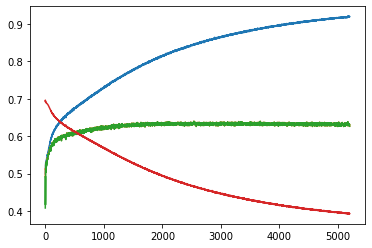

epoch: 0
train_acc: 0.9191909640136591
test_acc: 0.6278893838782886
f1: 0.627810925401877

epoch: 1
train_acc: 0.9197373259784607
test_acc: 0.6320921240648903
f1: 0.6320693125938692

epoch: 2
train_acc: 0.9200630417651694
test_acc: 0.6299066991678575
f1: 0.62987791226138

epoch: 3
train_acc: 0.9196427633307066
test_acc: 0.6286458771118769
f1: 0.6285572116206367

epoch: 4
train_acc: 0.9187181507748884
test_acc: 0.6331848365134067
f1: 0.6331065896314773

epoch: 5
train_acc: 0.9195902285263987
test_acc: 0.6293603429435992
f1: 0.6293360885517627

epoch: 6
train_acc: 0.9196112424481219
test_acc: 0.6332688913171388
f1: 0.633251312358464

epoch: 7
train_acc: 0.9201891252955082
test_acc: 0.6336471379339329
f1: 0.6335911888838719

epoch: 8
train_acc: 0.9192119779353822
test_acc: 0.6298226443641254
f1: 0.6296889717056078

epoch: 9
train_acc: 0.9198529025479381
test_acc: 0.6302849457846516
f1: 0.6302322983466717

epoch: 10
train_acc: 0.9208825847123719
test_acc: 0.6322182062704883
f1: 0.632213239

epoch: 89
train_acc: 0.92073548726031
test_acc: 0.6309153568126419
f1: 0.6307624517516697

epoch: 90
train_acc: 0.9209035986340951
test_acc: 0.6301168361771875
f1: 0.6300849100169347

epoch: 91
train_acc: 0.919485158917783
test_acc: 0.6299487265697234
f1: 0.6299409317734359

epoch: 92
train_acc: 0.9213028631468347
test_acc: 0.6321761788686223
f1: 0.6321271055446076

epoch: 93
train_acc: 0.9213238770685579
test_acc: 0.6296965621585273
f1: 0.6295727590705283

epoch: 94
train_acc: 0.920220646178093
test_acc: 0.6286458771118769
f1: 0.6284894686870021

epoch: 95
train_acc: 0.9210927239296034
test_acc: 0.6330587543078087
f1: 0.6330362510470444

epoch: 96
train_acc: 0.9208930916732335
test_acc: 0.6304110279902496
f1: 0.6303680429345425

epoch: 97
train_acc: 0.9206199106908327
test_acc: 0.6296545347566613
f1: 0.6294309030924342

epoch: 98
train_acc: 0.9203467297084318
test_acc: 0.6307052198033117
f1: 0.6305181605246347

epoch: 99
train_acc: 0.9218807459942212
test_acc: 0.6317979322518282
f1: 0

epoch: 177
train_acc: 0.9220383504071448
test_acc: 0.631209548625704
f1: 0.6311539988509302

epoch: 178
train_acc: 0.9209666403992645
test_acc: 0.6322182062704883
f1: 0.6321346698922339

epoch: 179
train_acc: 0.9227843446283163
test_acc: 0.6333529461208708
f1: 0.6333011067776921

epoch: 180
train_acc: 0.9227213028631468
test_acc: 0.6311675212238379
f1: 0.6311204638847294

epoch: 181
train_acc: 0.9224586288416076
test_acc: 0.6300748087753215
f1: 0.630042584236636

epoch: 182
train_acc: 0.9227948515891778
test_acc: 0.6329326721022106
f1: 0.6328341546661346

epoch: 183
train_acc: 0.9234042553191489
test_acc: 0.633857274943263
f1: 0.633769853739134

epoch: 184
train_acc: 0.9212608353033885
test_acc: 0.6328486172984786
f1: 0.632805915746664

epoch: 185
train_acc: 0.9217126346204361
test_acc: 0.633899302345129
f1: 0.6338716506365274

epoch: 186
train_acc: 0.9229944838455477
test_acc: 0.6300748087753215
f1: 0.6300261793039522

epoch: 187
train_acc: 0.9221434200157604
test_acc: 0.6323863158779

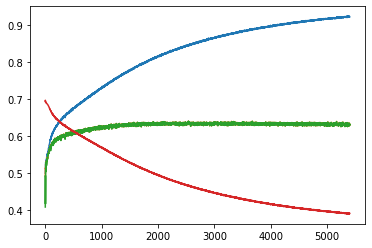

epoch: 0
train_acc: 0.9231415812976097
test_acc: 0.6323442884760864
f1: 0.6321919753955371

epoch: 1
train_acc: 0.9231520882584713
test_acc: 0.6308733294107758
f1: 0.6308177289923328

epoch: 2
train_acc: 0.9215130023640662
test_acc: 0.63104143901824
f1: 0.6310281195217566

epoch: 3
train_acc: 0.9222064617809299
test_acc: 0.6324283432798185
f1: 0.6324003057833423

epoch: 4
train_acc: 0.9221959548200683
test_acc: 0.6311675212238379
f1: 0.6311190353978056

epoch: 5
train_acc: 0.9228789072760704
test_acc: 0.6311254938219719
f1: 0.6309745716308901

epoch: 6
train_acc: 0.9220908852114525
test_acc: 0.6304110279902496
f1: 0.6303687194404396

epoch: 7
train_acc: 0.922668768058839
test_acc: 0.6320500966630243
f1: 0.6320308804212525

epoch: 8
train_acc: 0.922815865510901
test_acc: 0.6315037404387661
f1: 0.6314955155900451

epoch: 9
train_acc: 0.9228368794326242
test_acc: 0.628898041523073
f1: 0.6288225107484939

epoch: 10
train_acc: 0.9229209351195167
test_acc: 0.63125157602757
f1: 0.631170156325

epoch: 89
train_acc: 0.9229734699238246
test_acc: 0.6301168361771875
f1: 0.62998148272369

epoch: 90
train_acc: 0.9235093249277646
test_acc: 0.6276372194670925
f1: 0.6275868063301997

epoch: 91
train_acc: 0.9242973469923824
test_acc: 0.6304530553921157
f1: 0.6304337557446116

epoch: 92
train_acc: 0.9233727344365642
test_acc: 0.6303269731865176
f1: 0.6302347995433271

epoch: 93
train_acc: 0.9252534804307854
test_acc: 0.6331848365134067
f1: 0.6330593498844426

epoch: 94
train_acc: 0.9232991857105333
test_acc: 0.6290661511305371
f1: 0.6290416186434811

epoch: 95
train_acc: 0.925337536117678
test_acc: 0.6316718500462302
f1: 0.6316469719366409

epoch: 96
train_acc: 0.9237089571841345
test_acc: 0.6295704799529294
f1: 0.6295522761162105

epoch: 97
train_acc: 0.924454951405306
test_acc: 0.6316718500462302
f1: 0.6315895936225042

epoch: 98
train_acc: 0.9249802994483846
test_acc: 0.6302008909809196
f1: 0.6301091793389656

epoch: 99
train_acc: 0.9235093249277646
test_acc: 0.6315877952424981
f1: 0

epoch: 177
train_acc: 0.9243183609141056
test_acc: 0.6302008909809196
f1: 0.6301168963983277

epoch: 178
train_acc: 0.9255056474914631
test_acc: 0.6295284525510633
f1: 0.6294870503273564

epoch: 179
train_acc: 0.9230890464933018
test_acc: 0.6309153568126419
f1: 0.6308578225429385

epoch: 180
train_acc: 0.9238140267927502
test_acc: 0.6286038497100109
f1: 0.6285479074467999

epoch: 181
train_acc: 0.9234252692408721
test_acc: 0.6302008909809196
f1: 0.6301444156234011

epoch: 182
train_acc: 0.9235933806146572
test_acc: 0.6299907539715894
f1: 0.6299322883949862

epoch: 183
train_acc: 0.9258418702390333
test_acc: 0.6310834664201059
f1: 0.6309874963175962

epoch: 184
train_acc: 0.9248121880745994
test_acc: 0.6329746995040767
f1: 0.6328885017208983

epoch: 185
train_acc: 0.9257052797478329
test_acc: 0.6283937127006809
f1: 0.6283538414612956

epoch: 186
train_acc: 0.9247911741528763
test_acc: 0.6283096578969488
f1: 0.6282742457566434

epoch: 187
train_acc: 0.9256002101392172
test_acc: 0.6324283

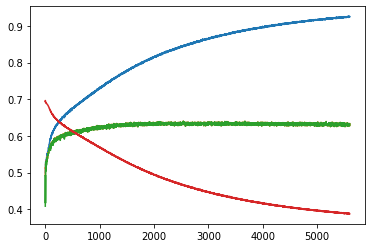

epoch: 0
train_acc: 0.9243919096401366
test_acc: 0.63104143901824
f1: 0.6309419020912546

epoch: 1
train_acc: 0.925726293669556
test_acc: 0.6306631924014457
f1: 0.6305298232684925

epoch: 2
train_acc: 0.9250328342526924
test_acc: 0.6304530553921157
f1: 0.6303918700212982

epoch: 3
train_acc: 0.9246650906225374
test_acc: 0.6301588635790536
f1: 0.6301411355437181

epoch: 4
train_acc: 0.9252850013133701
test_acc: 0.6304110279902496
f1: 0.6302925497113763

epoch: 5
train_acc: 0.9254005778828474
test_acc: 0.6280995208876188
f1: 0.6280304225640958

epoch: 6
train_acc: 0.9252219595482006
test_acc: 0.6304950827939817
f1: 0.6303875516486798

epoch: 7
train_acc: 0.9257578145521408
test_acc: 0.6304950827939817
f1: 0.6304741358209713

epoch: 8
train_acc: 0.9242027843446283
test_acc: 0.63125157602757
f1: 0.6312306719396273

epoch: 9
train_acc: 0.9252114525873392
test_acc: 0.626250315205514
f1: 0.6262037022793083

epoch: 10
train_acc: 0.9241187286577357
test_acc: 0.6293603429435992
f1: 0.62933344321

epoch: 89
train_acc: 0.9268610454426057
test_acc: 0.6332268639152727
f1: 0.633218832370407

epoch: 90
train_acc: 0.925043341213554
test_acc: 0.6303269731865176
f1: 0.630257001161412

epoch: 91
train_acc: 0.9268505384817441
test_acc: 0.6300327813734555
f1: 0.6299079449190181

epoch: 92
train_acc: 0.9264617809298661
test_acc: 0.6297806169622594
f1: 0.6296451404741491

epoch: 93
train_acc: 0.925631731021802
test_acc: 0.6307472472051778
f1: 0.6307196320577542

epoch: 94
train_acc: 0.9258628841607565
test_acc: 0.6291502059342692
f1: 0.6291154897586521

epoch: 95
train_acc: 0.9251694247438929
test_acc: 0.6335210557283348
f1: 0.6334684967753816

epoch: 96
train_acc: 0.9268505384817441
test_acc: 0.6310834664201059
f1: 0.6309844526745281

epoch: 97
train_acc: 0.9265143157341739
test_acc: 0.6316718500462302
f1: 0.6316175159990973

epoch: 98
train_acc: 0.9262726556343578
test_acc: 0.6293183155417332
f1: 0.6292804846685179

epoch: 99
train_acc: 0.9261045442605726
test_acc: 0.6318399596536942
f1: 0

epoch: 177
train_acc: 0.9268190175991594
test_acc: 0.6307052198033117
f1: 0.6306849991088709

epoch: 178
train_acc: 0.9274704491725768
test_acc: 0.6341514667563252
f1: 0.6341259747268804

epoch: 179
train_acc: 0.92675597583399
test_acc: 0.6344876859712533
f1: 0.6344239340736866

epoch: 180
train_acc: 0.9261780929866036
test_acc: 0.6299066991678575
f1: 0.6297968512003368

epoch: 181
train_acc: 0.9276490675072235
test_acc: 0.6317979322518282
f1: 0.631747717448099

epoch: 182
train_acc: 0.9267874967165747
test_acc: 0.628940068924939
f1: 0.6288685301847323

epoch: 183
train_acc: 0.9267454688731285
test_acc: 0.6334790283264689
f1: 0.6333851758357927

epoch: 184
train_acc: 0.9273863934856843
test_acc: 0.631293603429436
f1: 0.6312233836969666

epoch: 185
train_acc: 0.9279327554504859
test_acc: 0.6302008909809196
f1: 0.6301338821040798

epoch: 186
train_acc: 0.9277016023115314
test_acc: 0.6278053290745567
f1: 0.6277892345343478

epoch: 187
train_acc: 0.9256842658261097
test_acc: 0.630200890980

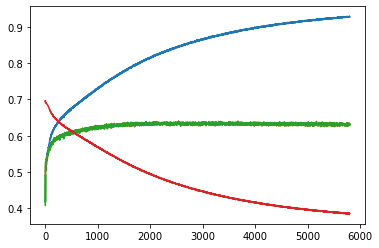

epoch: 0
train_acc: 0.9278171788810087
test_acc: 0.6320921240648903
f1: 0.6320163513710563

epoch: 1
train_acc: 0.9274179143682689
test_acc: 0.6323863158779525
f1: 0.6323221974637847

epoch: 2
train_acc: 0.9278276858418703
test_acc: 0.6315457678406321
f1: 0.6314925499528125

epoch: 3
train_acc: 0.9276700814289467
test_acc: 0.6293603429435992
f1: 0.629327162345652

epoch: 4
train_acc: 0.9270291568163909
test_acc: 0.6321341514667563
f1: 0.6321012191871519

epoch: 5
train_acc: 0.9274914630943
test_acc: 0.6316718500462302
f1: 0.6316104635972851

epoch: 6
train_acc: 0.9266088783819281
test_acc: 0.6283516852988148
f1: 0.6282764918932825

epoch: 7
train_acc: 0.9277856579984239
test_acc: 0.6295704799529294
f1: 0.6294941879123246

epoch: 8
train_acc: 0.9276070396637772
test_acc: 0.6328486172984786
f1: 0.6328355556674071

epoch: 9
train_acc: 0.9281744155503021
test_acc: 0.6291922333361352
f1: 0.6291480785906848

epoch: 10
train_acc: 0.926682427107959
test_acc: 0.6305371101958477
f1: 0.6304587549

epoch: 89
train_acc: 0.930086682427108
test_acc: 0.6293183155417332
f1: 0.6292724369508503

epoch: 90
train_acc: 0.9280693459416863
test_acc: 0.6332268639152727
f1: 0.6330755461068804

epoch: 91
train_acc: 0.9282689781980562
test_acc: 0.6328065898966125
f1: 0.6327222475149172

epoch: 92
train_acc: 0.928689256632519
test_acc: 0.6314617130369
f1: 0.631436559654413

epoch: 93
train_acc: 0.9280798529025479
test_acc: 0.6327645624947466
f1: 0.6327381777814426

epoch: 94
train_acc: 0.9275965327029156
test_acc: 0.6316298226443642
f1: 0.6315166986116373

epoch: 95
train_acc: 0.9281639085894405
test_acc: 0.6315037404387661
f1: 0.6314147908494264

epoch: 96
train_acc: 0.9282584712371946
test_acc: 0.6360426998402958
f1: 0.6359712396332764

epoch: 97
train_acc: 0.9289834515366431
test_acc: 0.6296545347566613
f1: 0.6296385201802928

epoch: 98
train_acc: 0.92675597583399
test_acc: 0.6332688913171388
f1: 0.6332282369107701

epoch: 99
train_acc: 0.9286997635933806
test_acc: 0.6308313020089098
f1: 0.630

epoch: 177
train_acc: 0.9290464933018124
test_acc: 0.6328065898966125
f1: 0.6327917462276771

epoch: 178
train_acc: 0.9298870501707381
test_acc: 0.6295284525510633
f1: 0.6294232953329751

epoch: 179
train_acc: 0.9291935907538744
test_acc: 0.6333529461208708
f1: 0.6332885848968458

epoch: 180
train_acc: 0.9290464933018124
test_acc: 0.6323022610742204
f1: 0.632255701283158

epoch: 181
train_acc: 0.9283004990806409
test_acc: 0.6322182062704883
f1: 0.6321628084267225

epoch: 182
train_acc: 0.9292986603624902
test_acc: 0.6279734386820207
f1: 0.6278884628164106

epoch: 183
train_acc: 0.9301076963488311
test_acc: 0.6305791375977137
f1: 0.6305048394336388

epoch: 184
train_acc: 0.9310533228263724
test_acc: 0.631377658233168
f1: 0.6312644567624269

epoch: 185
train_acc: 0.9299290780141845
test_acc: 0.6289820963268051
f1: 0.62894858099969

epoch: 186
train_acc: 0.9297609666403993
test_acc: 0.6303269731865176
f1: 0.6303202239744723

epoch: 187
train_acc: 0.9290359863409509
test_acc: 0.63078927460

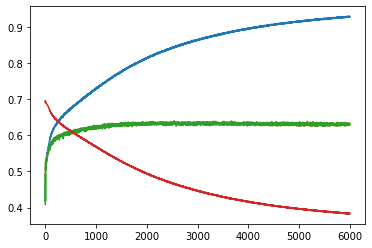

epoch: 0
train_acc: 0.9285736800630418
test_acc: 0.6321341514667563
f1: 0.6321069123463252

epoch: 1
train_acc: 0.92876280535855
test_acc: 0.6305791375977137
f1: 0.6305407957719644

epoch: 2
train_acc: 0.9294457578145522
test_acc: 0.6282676304950828
f1: 0.6281567539694293

epoch: 3
train_acc: 0.9298240084055687
test_acc: 0.6289820963268051
f1: 0.6288653949865636

epoch: 4
train_acc: 0.9300236406619385
test_acc: 0.6304110279902496
f1: 0.6303713731973121

epoch: 5
train_acc: 0.9304964539007092
test_acc: 0.6325544254854165
f1: 0.6325454289754748

epoch: 6
train_acc: 0.9299290780141845
test_acc: 0.6320080692611583
f1: 0.6319560397690821

epoch: 7
train_acc: 0.9294772786971368
test_acc: 0.6298226443641254
f1: 0.6296097282834293

epoch: 8
train_acc: 0.9302653007617546
test_acc: 0.6299487265697234
f1: 0.6298627755551914

epoch: 9
train_acc: 0.9298870501707381
test_acc: 0.6299066991678575
f1: 0.6299005071129102

epoch: 10
train_acc: 0.9300656685053849
test_acc: 0.6322182062704883
f1: 0.6322025

epoch: 89
train_acc: 0.9305910165484633
test_acc: 0.6307472472051778
f1: 0.6307238487522008

epoch: 90
train_acc: 0.9299395849750459
test_acc: 0.6308313020089098
f1: 0.6307705817498626

epoch: 91
train_acc: 0.9309692671394799
test_acc: 0.6307472472051778
f1: 0.6306551783523957

epoch: 92
train_acc: 0.9296348831100604
test_acc: 0.6278053290745567
f1: 0.6277105269790695

epoch: 93
train_acc: 0.9310533228263724
test_acc: 0.6300327813734555
f1: 0.6299723318232018

epoch: 94
train_acc: 0.9308536905700027
test_acc: 0.6306631924014457
f1: 0.6306492701022416

epoch: 95
train_acc: 0.930013133701077
test_acc: 0.628940068924939
f1: 0.6289005834430338

epoch: 96
train_acc: 0.9313790386130811
test_acc: 0.631293603429436
f1: 0.6311814658045414

epoch: 97
train_acc: 0.9309272392960336
test_acc: 0.6294864251491973
f1: 0.6293989268453256

epoch: 98
train_acc: 0.9304544260572629
test_acc: 0.6341514667563252
f1: 0.6340932675155431

epoch: 99
train_acc: 0.9301392172314158
test_acc: 0.6300748087753215
f1: 

epoch: 177
train_acc: 0.9320304701864985
test_acc: 0.628940068924939
f1: 0.628875349423546

epoch: 178
train_acc: 0.9308326766482795
test_acc: 0.6306631924014457
f1: 0.6305274414670238

epoch: 179
train_acc: 0.9321250328342527
test_acc: 0.63125157602757
f1: 0.6311556496571643

epoch: 180
train_acc: 0.9312949829261886
test_acc: 0.6299487265697234
f1: 0.6299099969916557

epoch: 181
train_acc: 0.9317362752823746
test_acc: 0.63104143901824
f1: 0.63103035636123

epoch: 182
train_acc: 0.9323982138166536
test_acc: 0.6346978229805833
f1: 0.6346369408475127

epoch: 183
train_acc: 0.9318413448909902
test_acc: 0.6297385895603934
f1: 0.6295988778038414

epoch: 184
train_acc: 0.9316206987128973
test_acc: 0.6327225350928806
f1: 0.6326224286508264

epoch: 185
train_acc: 0.9319779353821906
test_acc: 0.6266285618223082
f1: 0.6266228636467255

epoch: 186
train_acc: 0.9317047543997898
test_acc: 0.6308313020089098
f1: 0.6308161730645679

epoch: 187
train_acc: 0.9317572892040977
test_acc: 0.627931411280154

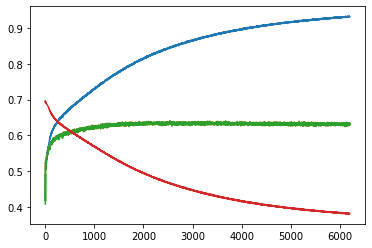

epoch: 0
train_acc: 0.932019963225637
test_acc: 0.6285197949062789
f1: 0.6285003942939407

epoch: 1
train_acc: 0.9310218019437878
test_acc: 0.6305371101958477
f1: 0.6304726692470712

epoch: 2
train_acc: 0.9311373785132651
test_acc: 0.6321341514667563
f1: 0.6320708107174857

epoch: 3
train_acc: 0.932755450485947
test_acc: 0.6300327813734555
f1: 0.629951557425969

epoch: 4
train_acc: 0.9318518518518518
test_acc: 0.6307052198033117
f1: 0.630649594063034

epoch: 5
train_acc: 0.9326398739164696
test_acc: 0.633899302345129
f1: 0.6338915907641568

epoch: 6
train_acc: 0.9321040189125296
test_acc: 0.6320921240648903
f1: 0.6320401064571202

epoch: 7
train_acc: 0.9307276070396637
test_acc: 0.6329326721022106
f1: 0.6328588472825256

epoch: 8
train_acc: 0.9312634620436039
test_acc: 0.6288560141212071
f1: 0.628831726726456

epoch: 9
train_acc: 0.9310112949829262
test_acc: 0.6274270824577625
f1: 0.6273725060408638

epoch: 10
train_acc: 0.931872865773575
test_acc: 0.6292342607380011
f1: 0.629102745621

epoch: 89
train_acc: 0.933585500394011
test_acc: 0.628771959317475
f1: 0.6286876401734776

epoch: 90
train_acc: 0.9331547149986866
test_acc: 0.6301168361771875
f1: 0.630072101408942

epoch: 91
train_acc: 0.932923561859732
test_acc: 0.6302429183827856
f1: 0.6302141576283922

epoch: 92
train_acc: 0.9320830049908064
test_acc: 0.633941329746995
f1: 0.6339176292793873

epoch: 93
train_acc: 0.9327659574468085
test_acc: 0.6315457678406321
f1: 0.6313937564706109

epoch: 94
train_acc: 0.93277646440767
test_acc: 0.6304950827939817
f1: 0.6303277172620204

epoch: 95
train_acc: 0.9331126871552403
test_acc: 0.6327645624947466
f1: 0.6327529925165025

epoch: 96
train_acc: 0.9324717625426845
test_acc: 0.6291922333361352
f1: 0.6291844226050001

epoch: 97
train_acc: 0.9331862358812714
test_acc: 0.6291081785324031
f1: 0.6290304325642416

epoch: 98
train_acc: 0.933953244024166
test_acc: 0.6277633016726906
f1: 0.6277095374623086

epoch: 99
train_acc: 0.9319043866561597
test_acc: 0.6305791375977137
f1: 0.630

epoch: 177
train_acc: 0.9346887312844759
test_acc: 0.6299907539715894
f1: 0.6298893856578067

epoch: 178
train_acc: 0.9336380351983189
test_acc: 0.6299066991678575
f1: 0.6298124323145535

epoch: 179
train_acc: 0.9324087207775151
test_acc: 0.628940068924939
f1: 0.628817156822901

epoch: 180
train_acc: 0.9332072498029945
test_acc: 0.6315457678406321
f1: 0.6315115799180883

epoch: 181
train_acc: 0.9339112161807197
test_acc: 0.628813986719341
f1: 0.6287687461356728

epoch: 182
train_acc: 0.934026792750197
test_acc: 0.6305371101958477
f1: 0.630498442198029

epoch: 183
train_acc: 0.9335119516679801
test_acc: 0.6331007817096747
f1: 0.6329842733751205

epoch: 184
train_acc: 0.9326083530338849
test_acc: 0.6304530553921157
f1: 0.630388599782675

epoch: 185
train_acc: 0.9341528762805359
test_acc: 0.6281835756913507
f1: 0.6281617666101637

epoch: 186
train_acc: 0.9347727869713686
test_acc: 0.6275111372614945
f1: 0.6274625334136872

epoch: 187
train_acc: 0.9339847649067508
test_acc: 0.6301588635790

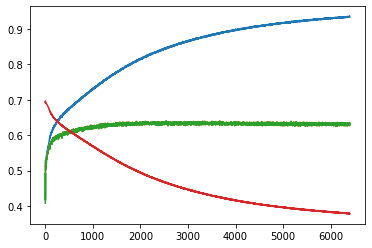

epoch: 0
train_acc: 0.9344575781455214
test_acc: 0.6283516852988148
f1: 0.628331808448765

epoch: 1
train_acc: 0.9338691883372734
test_acc: 0.6292342607380011
f1: 0.6291772479539077

epoch: 2
train_acc: 0.9328289992119779
test_acc: 0.6343616037656552
f1: 0.6342674816202718

epoch: 3
train_acc: 0.9342999737325979
test_acc: 0.628771959317475
f1: 0.6286738624535799

epoch: 4
train_acc: 0.933879695298135
test_acc: 0.6302008909809196
f1: 0.6301671845652844

epoch: 5
train_acc: 0.9325978460730234
test_acc: 0.6327645624947466
f1: 0.6327245087981738

epoch: 6
train_acc: 0.9331021801943787
test_acc: 0.6270068084391023
f1: 0.626923037575616

epoch: 7
train_acc: 0.9333438402941949
test_acc: 0.6284777675044129
f1: 0.6283506705979001

epoch: 8
train_acc: 0.9330391384292094
test_acc: 0.6331428091115407
f1: 0.6331134359025649

epoch: 9
train_acc: 0.9341528762805359
test_acc: 0.6288560141212071
f1: 0.6288279814913526

epoch: 10
train_acc: 0.9343314946151826
test_acc: 0.6321761788686223
f1: 0.632105696

epoch: 89
train_acc: 0.9362227475702652
test_acc: 0.6316718500462302
f1: 0.631537660104151

epoch: 90
train_acc: 0.9338691883372734
test_acc: 0.6279734386820207
f1: 0.6279064502060449

epoch: 91
train_acc: 0.9353611767796165
test_acc: 0.631377658233168
f1: 0.631328115590676

epoch: 92
train_acc: 0.9350985027580773
test_acc: 0.6322182062704883
f1: 0.6321589092447328

epoch: 93
train_acc: 0.9339007092198581
test_acc: 0.6283937127006809
f1: 0.6283470131977034

epoch: 94
train_acc: 0.934320987654321
test_acc: 0.6303690005883836
f1: 0.6302994669627526

epoch: 95
train_acc: 0.9349724192277383
test_acc: 0.6321761788686223
f1: 0.6321327206320898

epoch: 96
train_acc: 0.9342789598108747
test_acc: 0.6303690005883836
f1: 0.6303276923005218

epoch: 97
train_acc: 0.9346677173627528
test_acc: 0.6305371101958477
f1: 0.6304454819375893

epoch: 98
train_acc: 0.9339427370633044
test_acc: 0.63104143901824
f1: 0.6309685580550587

epoch: 99
train_acc: 0.9348148148148148
test_acc: 0.6304530553921157
f1: 0.6

epoch: 177
train_acc: 0.9357289204097715
test_acc: 0.6302849457846516
f1: 0.6302559080912402

epoch: 178
train_acc: 0.9357079064880484
test_acc: 0.6323442884760864
f1: 0.6322937824511746

epoch: 179
train_acc: 0.9354662463882322
test_acc: 0.6275531646633605
f1: 0.6275295638108357

epoch: 180
train_acc: 0.9352035723666929
test_acc: 0.6321341514667563
f1: 0.6320740452628065

epoch: 181
train_acc: 0.9348253217756763
test_acc: 0.63125157602757
f1: 0.6311765242703609

epoch: 182
train_acc: 0.9356868925663252
test_acc: 0.6309573842145079
f1: 0.6308970857366277

epoch: 183
train_acc: 0.9361176779616496
test_acc: 0.6294443977473313
f1: 0.6294211700775334

epoch: 184
train_acc: 0.9351720514841082
test_acc: 0.6309153568126419
f1: 0.6308877542375595

epoch: 185
train_acc: 0.9364854215918046
test_acc: 0.6302429183827856
f1: 0.630191384118134

epoch: 186
train_acc: 0.9356028368794326
test_acc: 0.6268386988316382
f1: 0.626711623660727

epoch: 187
train_acc: 0.9344890990281062
test_acc: 0.62944439774

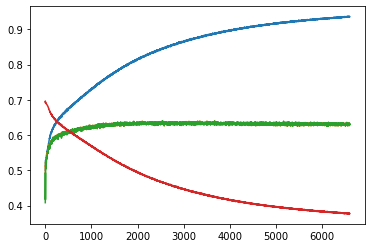

epoch: 0
train_acc: 0.9350144470711846
test_acc: 0.6315037404387661
f1: 0.6314313890420977

epoch: 1
train_acc: 0.9344050433412135
test_acc: 0.6251576027569976
f1: 0.6250512048865349

epoch: 2
train_acc: 0.9360756501182033
test_acc: 0.6334790283264689
f1: 0.6334142766725496

epoch: 3
train_acc: 0.9359810874704492
test_acc: 0.6311254938219719
f1: 0.6310959590923142

epoch: 4
train_acc: 0.9366430260047282
test_acc: 0.6329746995040767
f1: 0.6329657132840927

epoch: 5
train_acc: 0.9362647754137116
test_acc: 0.6276372194670925
f1: 0.627608256034048

epoch: 6
train_acc: 0.934615182558445
test_acc: 0.6309573842145079
f1: 0.6308199427611659

epoch: 7
train_acc: 0.9352666141318624
test_acc: 0.6323863158779525
f1: 0.6322679139338115

epoch: 8
train_acc: 0.9366430260047282
test_acc: 0.6325544254854165
f1: 0.6324951826678892

epoch: 9
train_acc: 0.9369267139479905
test_acc: 0.6299907539715894
f1: 0.6299338575137388

epoch: 10
train_acc: 0.9364854215918046
test_acc: 0.6297806169622594
f1: 0.6296744

epoch: 89
train_acc: 0.9359390596270029
test_acc: 0.6298646717659915
f1: 0.6298497091710142

epoch: 90
train_acc: 0.93698975571316
test_acc: 0.6309153568126419
f1: 0.6308562469031398

epoch: 91
train_acc: 0.9378618334646703
test_acc: 0.6276372194670925
f1: 0.6275245180519918

epoch: 92
train_acc: 0.9368321513002364
test_acc: 0.6296965621585273
f1: 0.6295704601953673

epoch: 93
train_acc: 0.936842658261098
test_acc: 0.6292342607380011
f1: 0.6291976894726464

epoch: 94
train_acc: 0.9359495665878644
test_acc: 0.6300748087753215
f1: 0.6300533543833905

epoch: 95
train_acc: 0.9368531652219595
test_acc: 0.6316718500462302
f1: 0.6316241463895803

epoch: 96
train_acc: 0.9371788810086682
test_acc: 0.6330167269059427
f1: 0.632960295753063

epoch: 97
train_acc: 0.9366430260047282
test_acc: 0.6302849457846516
f1: 0.630248163968237

epoch: 98
train_acc: 0.9364223798266351
test_acc: 0.6268386988316382
f1: 0.6268022070720389

epoch: 99
train_acc: 0.9370948253217757
test_acc: 0.6281835756913507
f1: 0.

epoch: 177
train_acc: 0.9377147360126084
test_acc: 0.6315457678406321
f1: 0.6315457125217874

epoch: 178
train_acc: 0.938334646703441
test_acc: 0.6290241237286711
f1: 0.6290018711162193

epoch: 179
train_acc: 0.9366535329655897
test_acc: 0.6340253845507271
f1: 0.6337697560964265

epoch: 180
train_acc: 0.9376832151300236
test_acc: 0.6330587543078087
f1: 0.632924477407174

epoch: 181
train_acc: 0.9370948253217757
test_acc: 0.628898041523073
f1: 0.6288719166085902

epoch: 182
train_acc: 0.9369687417914369
test_acc: 0.6278893838782886
f1: 0.6278847355843168

epoch: 183
train_acc: 0.9381980562122406
test_acc: 0.6298646717659915
f1: 0.6297843371333967

epoch: 184
train_acc: 0.9368846861045442
test_acc: 0.6276792468689586
f1: 0.6275152554660028

epoch: 185
train_acc: 0.9378408195429472
test_acc: 0.628729931915609
f1: 0.6286507347392839

epoch: 186
train_acc: 0.9369372209088521
test_acc: 0.6277212742708246
f1: 0.6277123231713562

epoch: 187
train_acc: 0.9378933543472551
test_acc: 0.63158779524

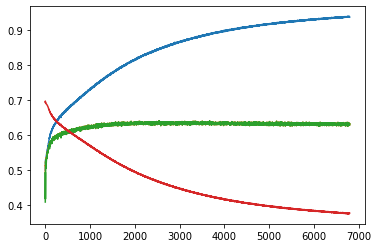

epoch: 0
train_acc: 0.938114000525348
test_acc: 0.6329746995040767
f1: 0.6329573262401278

epoch: 1
train_acc: 0.9365274494352509
test_acc: 0.6298226443641254
f1: 0.629786756370313

epoch: 2
train_acc: 0.937283950617284
test_acc: 0.6246532739346053
f1: 0.6245277847303244

epoch: 3
train_acc: 0.938092986603625
test_acc: 0.6274691098596284
f1: 0.6273369686228166

epoch: 4
train_acc: 0.9381350144470711
test_acc: 0.6305371101958477
f1: 0.6304726692470712

epoch: 5
train_acc: 0.9375256107171
test_acc: 0.628771959317475
f1: 0.6287213318364409

epoch: 6
train_acc: 0.9378303125820856
test_acc: 0.6298226443641254
f1: 0.6298001918010762

epoch: 7
train_acc: 0.9369582348305753
test_acc: 0.6302429183827856
f1: 0.6301612759694271

epoch: 8
train_acc: 0.9369687417914369
test_acc: 0.6263343700092461
f1: 0.6262173952758731

epoch: 9
train_acc: 0.937578145521408
test_acc: 0.6295284525510633
f1: 0.6294764462454656

epoch: 10
train_acc: 0.9375045967953769
test_acc: 0.628771959317475
f1: 0.628733751961664

epoch: 89
train_acc: 0.9384712371946414
test_acc: 0.6316718500462302
f1: 0.6315950925494047

epoch: 90
train_acc: 0.9387128972944576
test_acc: 0.6271749180465663
f1: 0.627151548118158

epoch: 91
train_acc: 0.9393433149461519
test_acc: 0.6277633016726906
f1: 0.6277056700320616

epoch: 92
train_acc: 0.937672708169162
test_acc: 0.6294023703454652
f1: 0.629273262799147

epoch: 93
train_acc: 0.937945889151563
test_acc: 0.6321761788686223
f1: 0.6320615822776499

epoch: 94
train_acc: 0.937672708169162
test_acc: 0.6304530553921157
f1: 0.6304048354176408

epoch: 95
train_acc: 0.9389860782768584
test_acc: 0.6311675212238379
f1: 0.6311551607847703

epoch: 96
train_acc: 0.9373890202258996
test_acc: 0.628771959317475
f1: 0.6286986300604093

epoch: 97
train_acc: 0.9381980562122406
test_acc: 0.6323022610742204
f1: 0.6321467549229386

epoch: 98
train_acc: 0.937819805621224
test_acc: 0.6323442884760864
f1: 0.6322526178268559

epoch: 99
train_acc: 0.937945889151563
test_acc: 0.6313356308313021
f1: 0.631

epoch: 177
train_acc: 0.9396375098502758
test_acc: 0.628561822308145
f1: 0.6284240934399746

epoch: 178
train_acc: 0.9388599947465196
test_acc: 0.628771959317475
f1: 0.6286623145602493

epoch: 179
train_acc: 0.9395429472025216
test_acc: 0.6293603429435992
f1: 0.629323469141285

epoch: 180
train_acc: 0.9393433149461519
test_acc: 0.6319240144574263
f1: 0.6318302614366181

epoch: 181
train_acc: 0.9394588915156291
test_acc: 0.6294864251491973
f1: 0.6293989268453256

epoch: 182
train_acc: 0.9399317047543998
test_acc: 0.6293603429435992
f1: 0.6292888852303947

epoch: 183
train_acc: 0.9390386130811663
test_acc: 0.6320080692611583
f1: 0.6319567810114096

epoch: 184
train_acc: 0.9393328079852903
test_acc: 0.631377658233168
f1: 0.6313295589045977

epoch: 185
train_acc: 0.9377147360126084
test_acc: 0.6291922333361352
f1: 0.6291501226672083

epoch: 186
train_acc: 0.9390911478854741
test_acc: 0.6303690005883836
f1: 0.6303200486284432

epoch: 187
train_acc: 0.9384292093511951
test_acc: 0.62877195931

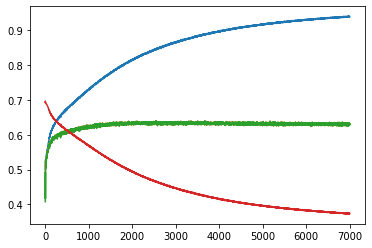

epoch: 0
train_acc: 0.9385027580772262
test_acc: 0.628898041523073
f1: 0.6288595252180259

epoch: 1
train_acc: 0.9390491200420279
test_acc: 0.6269647810372363
f1: 0.6268646618750412

epoch: 2
train_acc: 0.9384292093511951
test_acc: 0.6321761788686223
f1: 0.6320626771401116

epoch: 3
train_acc: 0.9394063567113212
test_acc: 0.6328065898966125
f1: 0.632750512478879

epoch: 4
train_acc: 0.9390596270028894
test_acc: 0.6326384802891485
f1: 0.6326298077035254

epoch: 5
train_acc: 0.9391752035723667
test_acc: 0.6315877952424981
f1: 0.6315501959868738

epoch: 6
train_acc: 0.938628841607565
test_acc: 0.6306631924014457
f1: 0.6305958450316371

epoch: 7
train_acc: 0.939658523771999
test_acc: 0.628771959317475
f1: 0.6287304725515076

epoch: 8
train_acc: 0.9390175991594432
test_acc: 0.6299907539715894
f1: 0.6299330755713994

epoch: 9
train_acc: 0.9389440504334121
test_acc: 0.6286458771118769
f1: 0.628588773851817

epoch: 10
train_acc: 0.9395219332807986
test_acc: 0.6299487265697234
f1: 0.62989375582

epoch: 89
train_acc: 0.9395534541633832
test_acc: 0.6301588635790536
f1: 0.6300888597340184

epoch: 90
train_acc: 0.9401418439716313
test_acc: 0.6277633016726906
f1: 0.6277024813084287

epoch: 91
train_acc: 0.9401208300499081
test_acc: 0.6334370009246029
f1: 0.6334176272309221

epoch: 92
train_acc: 0.9391752035723667
test_acc: 0.6318819870555602
f1: 0.6318484338683176

epoch: 93
train_acc: 0.940635671132125
test_acc: 0.628813986719341
f1: 0.6287592310935678

epoch: 94
train_acc: 0.939658523771999
test_acc: 0.6267546440279061
f1: 0.6267247593367714

epoch: 95
train_acc: 0.9395429472025216
test_acc: 0.6315037404387661
f1: 0.6314242206565069

epoch: 96
train_acc: 0.9395009193590754
test_acc: 0.6303690005883836
f1: 0.6303185909092603

epoch: 97
train_acc: 0.9397846073023378
test_acc: 0.628561822308145
f1: 0.6284966200502435

epoch: 98
train_acc: 0.9398896769109535
test_acc: 0.6290241237286711
f1: 0.628965108829374

epoch: 99
train_acc: 0.9395744680851064
test_acc: 0.6316298226443642
f1: 0.

epoch: 177
train_acc: 0.9399001838718151
test_acc: 0.6246112465327394
f1: 0.6245104957039058

epoch: 178
train_acc: 0.9399106908326766
test_acc: 0.6291922333361352
f1: 0.6290761532469945

epoch: 179
train_acc: 0.9399317047543998
test_acc: 0.6292762881398672
f1: 0.629181359482574

epoch: 180
train_acc: 0.9395639611242448
test_acc: 0.6315877952424981
f1: 0.6315607870738155

epoch: 181
train_acc: 0.9394799054373523
test_acc: 0.6328906447003446
f1: 0.632833806901892

epoch: 182
train_acc: 0.9404150249540321
test_acc: 0.6295704799529294
f1: 0.6294594505528983

epoch: 183
train_acc: 0.9413396375098503
test_acc: 0.6290661511305371
f1: 0.6290188256889953

epoch: 184
train_acc: 0.9406987128972945
test_acc: 0.6320500966630243
f1: 0.6320217540457218

epoch: 185
train_acc: 0.9399632256369845
test_acc: 0.6315457678406321
f1: 0.6315265252602079

epoch: 186
train_acc: 0.9407722616233255
test_acc: 0.6309994116163739
f1: 0.6309329680082548

epoch: 187
train_acc: 0.941665353296559
test_acc: 0.6313776582

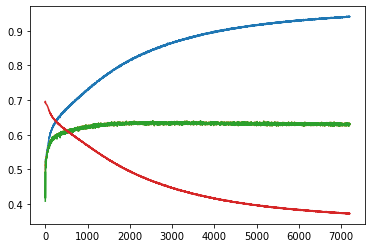

epoch: 0
train_acc: 0.9413291305489887
test_acc: 0.6314617130369
f1: 0.6313722680670674

epoch: 1
train_acc: 0.9402889414236932
test_acc: 0.6281835756913507
f1: 0.628028899291071

epoch: 2
train_acc: 0.9408247964276333
test_acc: 0.6311254938219719
f1: 0.6310010260768173

epoch: 3
train_acc: 0.9410874704491726
test_acc: 0.6310834664201059
f1: 0.63107360301165

epoch: 4
train_acc: 0.9414762280010507
test_acc: 0.6282256030932167
f1: 0.6281955504664455

epoch: 5
train_acc: 0.9416233254531127
test_acc: 0.6340674119525931
f1: 0.6339942544343427

epoch: 6
train_acc: 0.9409298660362491
test_acc: 0.6295284525510633
f1: 0.6294080037885685

epoch: 7
train_acc: 0.9412450748620962
test_acc: 0.628687904513743
f1: 0.6286675733614288

epoch: 8
train_acc: 0.9411294982926188
test_acc: 0.626460452214844
f1: 0.6264573933765463

epoch: 9
train_acc: 0.9401838718150775
test_acc: 0.6255358493737917
f1: 0.6255007948492283

epoch: 10
train_acc: 0.9406146572104019
test_acc: 0.6325544254854165
f1: 0.6324870015748

epoch: 89
train_acc: 0.9409508799579721
test_acc: 0.6307472472051778
f1: 0.6306551783523957

epoch: 90
train_acc: 0.9415707906488048
test_acc: 0.6307892746070438
f1: 0.630600852900052

epoch: 91
train_acc: 0.9406987128972945
test_acc: 0.6326384802891485
f1: 0.6325702252946955

epoch: 92
train_acc: 0.9413816653532966
test_acc: 0.6299066991678575
f1: 0.6298720538094618

epoch: 93
train_acc: 0.9411610191752036
test_acc: 0.6266285618223082
f1: 0.6266167985255903

epoch: 94
train_acc: 0.9412555818229577
test_acc: 0.628898041523073
f1: 0.6288440615508281

epoch: 95
train_acc: 0.9412345679012346
test_acc: 0.6273430276540304
f1: 0.6272054522800771

epoch: 96
train_acc: 0.9419175203572366
test_acc: 0.6317979322518282
f1: 0.6317540877856727

epoch: 97
train_acc: 0.9416863672182821
test_acc: 0.6294023703454652
f1: 0.629385918018667

epoch: 98
train_acc: 0.9414342001576044
test_acc: 0.6322602336723544
f1: 0.6322270144706941

epoch: 99
train_acc: 0.9410349356448647
test_acc: 0.6318399596536942
f1: 

epoch: 177
train_acc: 0.9427475702653008
test_acc: 0.6302849457846516
f1: 0.6301892717472111

epoch: 178
train_acc: 0.943157341738902
test_acc: 0.6317559048499621
f1: 0.631708922579535

epoch: 179
train_acc: 0.94301024428684
test_acc: 0.6296545347566613
f1: 0.6296093966199671

epoch: 180
train_acc: 0.9416863672182821
test_acc: 0.6298226443641254
f1: 0.629786756370313

epoch: 181
train_acc: 0.9419070133963751
test_acc: 0.6321341514667563
f1: 0.6320910281921454

epoch: 182
train_acc: 0.9419910690832677
test_acc: 0.6294864251491973
f1: 0.6293796666170739

epoch: 183
train_acc: 0.9422117152613606
test_acc: 0.6292762881398672
f1: 0.6292249905588686

epoch: 184
train_acc: 0.9419700551615445
test_acc: 0.6277633016726906
f1: 0.6277117947375467

epoch: 185
train_acc: 0.9415287628053586
test_acc: 0.6291922333361352
f1: 0.6291452797372618

epoch: 186
train_acc: 0.9423798266351457
test_acc: 0.6302849457846516
f1: 0.6302101435242797

epoch: 187
train_acc: 0.9424428684003152
test_acc: 0.633058754307

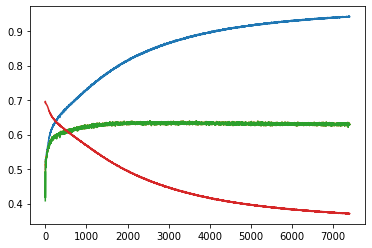

epoch: 0
train_acc: 0.9421486734961912
test_acc: 0.6270488358409683
f1: 0.6269381396265942

epoch: 1
train_acc: 0.9408353033884949
test_acc: 0.6280154660838867
f1: 0.6279319217556933

epoch: 2
train_acc: 0.9417914368268978
test_acc: 0.6320500966630243
f1: 0.631934911218116

epoch: 3
train_acc: 0.94100341476228
test_acc: 0.6278893838782886
f1: 0.6278232245560887

epoch: 4
train_acc: 0.9432519043866562
test_acc: 0.6272589728502984
f1: 0.6271771399308098

epoch: 5
train_acc: 0.9415497767270817
test_acc: 0.6277212742708246
f1: 0.6276446013759214

epoch: 6
train_acc: 0.9430732860520095
test_acc: 0.6317138774480962
f1: 0.6316357717240002

epoch: 7
train_acc: 0.9409613869188337
test_acc: 0.6308313020089098
f1: 0.6308008886835044

epoch: 8
train_acc: 0.9418859994746519
test_acc: 0.6301168361771875
f1: 0.6301034833023099

epoch: 9
train_acc: 0.9425374310480693
test_acc: 0.6296125073547953
f1: 0.6295543766565089

epoch: 10
train_acc: 0.9415392697662202
test_acc: 0.6296965621585273
f1: 0.62959459

epoch: 89
train_acc: 0.9423798266351457
test_acc: 0.6290661511305371
f1: 0.6290372988438496

epoch: 90
train_acc: 0.9428106120304702
test_acc: 0.6288560141212071
f1: 0.6288190901447654

epoch: 91
train_acc: 0.9423693196742842
test_acc: 0.6314617130369
f1: 0.6313602311737112

epoch: 92
train_acc: 0.9434935644864723
test_acc: 0.6316298226443642
f1: 0.6315886552602699

epoch: 93
train_acc: 0.9431888626214867
test_acc: 0.63125157602757
f1: 0.6311917250377219

epoch: 94
train_acc: 0.9428211189913318
test_acc: 0.6294443977473313
f1: 0.629431020597258

epoch: 95
train_acc: 0.9427580772261623
test_acc: 0.6278473564764226
f1: 0.6277980705633727

epoch: 96
train_acc: 0.9431468347780404
test_acc: 0.6331007817096747
f1: 0.6329842733751205

epoch: 97
train_acc: 0.9428211189913318
test_acc: 0.6328065898966125
f1: 0.6327054783629508

epoch: 98
train_acc: 0.9429682164433938
test_acc: 0.6299487265697234
f1: 0.6299039714698028

epoch: 99
train_acc: 0.9427265563435776
test_acc: 0.6276792468689586
f1: 0.6

epoch: 177
train_acc: 0.9428316259521933
test_acc: 0.6298646717659915
f1: 0.6298338904299224

epoch: 178
train_acc: 0.9432834252692409
test_acc: 0.6304110279902496
f1: 0.6303733086366151

epoch: 179
train_acc: 0.9439558707643814
test_acc: 0.6319660418592923
f1: 0.6318897950852255

epoch: 180
train_acc: 0.9437352245862884
test_acc: 0.6315457678406321
f1: 0.6314573122173854

epoch: 181
train_acc: 0.9434725505647491
test_acc: 0.6278473564764226
f1: 0.6277936044065421

epoch: 182
train_acc: 0.9440504334121356
test_acc: 0.6283096578969488
f1: 0.6282993762817687

epoch: 183
train_acc: 0.9421907013396376
test_acc: 0.6328065898966125
f1: 0.6327400531814236

epoch: 184
train_acc: 0.9436301549776727
test_acc: 0.6315037404387661
f1: 0.6314233011431709

epoch: 185
train_acc: 0.9435776201733649
test_acc: 0.6313356308313021
f1: 0.6313005069852189

epoch: 186
train_acc: 0.9431468347780404
test_acc: 0.6296545347566613
f1: 0.6296413594941841

epoch: 187
train_acc: 0.9429261885999475
test_acc: 0.6298646

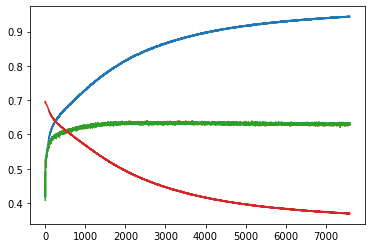

epoch: 0
train_acc: 0.9440294194904124
test_acc: 0.6294023703454652
f1: 0.6293514601799792

epoch: 1
train_acc: 0.943892828999212
test_acc: 0.6296125073547953
f1: 0.6295641777022254

epoch: 2
train_acc: 0.9435040714473338
test_acc: 0.628940068924939
f1: 0.6288923700868045

epoch: 3
train_acc: 0.9435776201733649
test_acc: 0.63104143901824
f1: 0.6310256949381998

epoch: 4
train_acc: 0.9429366955608091
test_acc: 0.6280995208876188
f1: 0.6280032813107956

epoch: 5
train_acc: 0.9433149461518255
test_acc: 0.633773220139531
f1: 0.6336580258170497

epoch: 6
train_acc: 0.9436301549776727
test_acc: 0.6290241237286711
f1: 0.628979256804537

epoch: 7
train_acc: 0.9442710795902285
test_acc: 0.6309573842145079
f1: 0.6309174613797458

epoch: 8
train_acc: 0.9435040714473338
test_acc: 0.6309573842145079
f1: 0.6309077850874161

epoch: 9
train_acc: 0.942716049382716
test_acc: 0.6318819870555602
f1: 0.6318144397568218

epoch: 10
train_acc: 0.9422957709482532
test_acc: 0.6269647810372363
f1: 0.626879574780

epoch: 89
train_acc: 0.9433569739952719
test_acc: 0.6295284525510633
f1: 0.6294375588802066

epoch: 90
train_acc: 0.9434935644864723
test_acc: 0.6326805076910146
f1: 0.6325478670194156

epoch: 91
train_acc: 0.9437667454688732
test_acc: 0.6292342607380011
f1: 0.6292132422898782

epoch: 92
train_acc: 0.9429051746782243
test_acc: 0.6278053290745567
f1: 0.6277996488581046

epoch: 93
train_acc: 0.9441239821381665
test_acc: 0.6282676304950828
f1: 0.628123062537501

epoch: 94
train_acc: 0.9436826897819806
test_acc: 0.6302008909809196
f1: 0.6300246454684906

epoch: 95
train_acc: 0.9431048069345942
test_acc: 0.6298226443641254
f1: 0.6297399749688517

epoch: 96
train_acc: 0.943598634095088
test_acc: 0.6327645624947466
f1: 0.6327442190630965

epoch: 97
train_acc: 0.9425794588915156
test_acc: 0.628729931915609
f1: 0.6286894381692684

epoch: 98
train_acc: 0.9440924612555818
test_acc: 0.6258300411868538
f1: 0.6256919072571925

epoch: 99
train_acc: 0.9441134751773049
test_acc: 0.6315037404387661
f1: 

epoch: 177
train_acc: 0.9441449960598897
test_acc: 0.6313356308313021
f1: 0.6313005069852189

epoch: 178
train_acc: 0.9451641712634621
test_acc: 0.6332268639152727
f1: 0.633074285533308

epoch: 179
train_acc: 0.9445967953769372
test_acc: 0.6303690005883836
f1: 0.6302821908433873

epoch: 180
train_acc: 0.9443656422379827
test_acc: 0.6304110279902496
f1: 0.6303881122858678

epoch: 181
train_acc: 0.9440609403729971
test_acc: 0.6299907539715894
f1: 0.6299751748724656

epoch: 182
train_acc: 0.9446178092986603
test_acc: 0.631209548625704
f1: 0.6311069596319421

epoch: 183
train_acc: 0.9440189125295508
test_acc: 0.6291502059342692
f1: 0.6289914292268818

epoch: 184
train_acc: 0.9442290517467823
test_acc: 0.628940068924939
f1: 0.6288986009461406

epoch: 185
train_acc: 0.9439033359600736
test_acc: 0.6346137681768513
f1: 0.634598383727989

epoch: 186
train_acc: 0.9445022327291831
test_acc: 0.6273010002521644
f1: 0.6272483052389469

epoch: 187
train_acc: 0.9438297872340425
test_acc: 0.63074724720

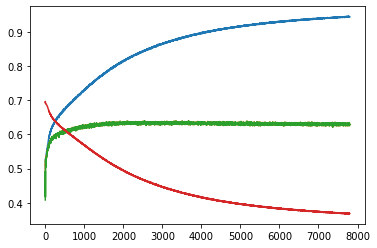

epoch: 0
train_acc: 0.9452902547938009
test_acc: 0.6307892746070438
f1: 0.6307351907015214

epoch: 1
train_acc: 0.9450065668505385
test_acc: 0.6333529461208708
f1: 0.6332996141528227

epoch: 2
train_acc: 0.9443656422379827
test_acc: 0.6298226443641254
f1: 0.629724315480827

epoch: 3
train_acc: 0.9445862884160756
test_acc: 0.6316298226443642
f1: 0.6315919094242036

epoch: 4
train_acc: 0.9449330181245075
test_acc: 0.6273850550558965
f1: 0.627373315592963

epoch: 5
train_acc: 0.9446913580246914
test_acc: 0.6320921240648903
f1: 0.6320845258402823

epoch: 6
train_acc: 0.9442605726293669
test_acc: 0.6321761788686223
f1: 0.6321453018872358

epoch: 7
train_acc: 0.9451011294982926
test_acc: 0.6309153568126419
f1: 0.6308058082263635

epoch: 8
train_acc: 0.9451011294982926
test_acc: 0.628940068924939
f1: 0.6288761782045792

epoch: 9
train_acc: 0.9449120042027843
test_acc: 0.6294864251491973
f1: 0.6294377183303389

epoch: 10
train_acc: 0.9433359600735487
test_acc: 0.628813986719341
f1: 0.628729202

epoch: 89
train_acc: 0.9451011294982926
test_acc: 0.6280574934857527
f1: 0.6278655446635065

epoch: 90
train_acc: 0.9451956921460467
test_acc: 0.6296965621585273
f1: 0.6295657995118181

epoch: 91
train_acc: 0.9442185447859207
test_acc: 0.6284357401025469
f1: 0.6284042570133179

epoch: 92
train_acc: 0.9449120042027843
test_acc: 0.6303690005883836
f1: 0.6303061762678949

epoch: 93
train_acc: 0.9446493301812451
test_acc: 0.6335630831302009
f1: 0.6334068352092748

epoch: 94
train_acc: 0.9454163383241397
test_acc: 0.628729931915609
f1: 0.6286781867810407

epoch: 95
train_acc: 0.9449225111636459
test_acc: 0.6305371101958477
f1: 0.6305341885051765

epoch: 96
train_acc: 0.9453322826372472
test_acc: 0.6278473564764226
f1: 0.6278439875459395

epoch: 97
train_acc: 0.9447123719464146
test_acc: 0.6286458771118769
f1: 0.6285462091401378

epoch: 98
train_acc: 0.9443761491988443
test_acc: 0.628561822308145
f1: 0.6283687071091061

epoch: 99
train_acc: 0.9461728395061728
test_acc: 0.6270068084391023
f1:

epoch: 177
train_acc: 0.9458681376411873
test_acc: 0.6292342607380011
f1: 0.6291476647906856

epoch: 178
train_acc: 0.944943525085369
test_acc: 0.631377658233168
f1: 0.6313251663974829

epoch: 179
train_acc: 0.9459627002889415
test_acc: 0.6296965621585273
f1: 0.6296691425435248

epoch: 180
train_acc: 0.9462043603887575
test_acc: 0.6313356308313021
f1: 0.6313254329199088

epoch: 181
train_acc: 0.9457840819542948
test_acc: 0.6308313020089098
f1: 0.6307311948918817

epoch: 182
train_acc: 0.9458471237194641
test_acc: 0.628940068924939
f1: 0.6288030831375664

epoch: 183
train_acc: 0.9469923824533754
test_acc: 0.6247793561402034
f1: 0.6246867992809735

epoch: 184
train_acc: 0.9450485946939847
test_acc: 0.6299907539715894
f1: 0.6299711981358675

epoch: 185
train_acc: 0.9450801155765695
test_acc: 0.6282256030932167
f1: 0.6282146151419516

epoch: 186
train_acc: 0.9466876805883898
test_acc: 0.6270068084391023
f1: 0.6269366423302365

epoch: 187
train_acc: 0.9448909902810612
test_acc: 0.6284777675

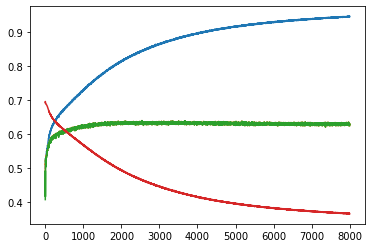

epoch: 0
train_acc: 0.9460257420541108
test_acc: 0.6282256030932167
f1: 0.6281737876686763

epoch: 1
train_acc: 0.9446283162595219
test_acc: 0.628771959317475
f1: 0.6287521049449215

epoch: 2
train_acc: 0.944701864985553
test_acc: 0.628940068924939
f1: 0.6288916515298932

epoch: 3
train_acc: 0.9454058313632782
test_acc: 0.6294023703454652
f1: 0.6293499724399001

epoch: 4
train_acc: 0.9458366167586025
test_acc: 0.6270908632428344
f1: 0.6269993715194638

epoch: 5
train_acc: 0.9450696086157079
test_acc: 0.6270488358409683
f1: 0.6270139229508476

epoch: 6
train_acc: 0.945679012345679
test_acc: 0.6344876859712533
f1: 0.6344363758362808

epoch: 7
train_acc: 0.9460257420541108
test_acc: 0.6307892746070438
f1: 0.6307240477661218

epoch: 8
train_acc: 0.9458156028368795
test_acc: 0.628898041523073
f1: 0.6288626854399775

epoch: 9
train_acc: 0.946340950879958
test_acc: 0.6310834664201059
f1: 0.6310267379890503

epoch: 10
train_acc: 0.9458156028368795
test_acc: 0.6275531646633605
f1: 0.62749589337

epoch: 89
train_acc: 0.9461518255844497
test_acc: 0.6280154660838867
f1: 0.6278829261718294

epoch: 90
train_acc: 0.9458576306803257
test_acc: 0.6267126166260402
f1: 0.6266195417853379

epoch: 91
train_acc: 0.9455109009718938
test_acc: 0.6293183155417332
f1: 0.6292968172757901

epoch: 92
train_acc: 0.9471815077488837
test_acc: 0.6299487265697234
f1: 0.6299185275378344

epoch: 93
train_acc: 0.9464775413711584
test_acc: 0.6328906447003446
f1: 0.6328232824838269

epoch: 94
train_acc: 0.9455424218544786
test_acc: 0.633731192737665
f1: 0.6336648235637068

epoch: 95
train_acc: 0.9462884160756501
test_acc: 0.6304110279902496
f1: 0.63034531700319

epoch: 96
train_acc: 0.9459627002889415
test_acc: 0.6295284525510633
f1: 0.6295010204881591

epoch: 97
train_acc: 0.946708694510113
test_acc: 0.6325544254854165
f1: 0.6325323846345423

epoch: 98
train_acc: 0.9473391121618072
test_acc: 0.6300748087753215
f1: 0.6300098721070653

epoch: 99
train_acc: 0.9470554242185448
test_acc: 0.633983357148861
f1: 0.

epoch: 177
train_acc: 0.9464250065668506
test_acc: 0.628561822308145
f1: 0.6284816676736096

epoch: 178
train_acc: 0.9470239033359601
test_acc: 0.6284777675044129
f1: 0.6284083094397025

epoch: 179
train_acc: 0.9466561597058051
test_acc: 0.6288560141212071
f1: 0.6288414198654126

epoch: 180
train_acc: 0.9464985552928815
test_acc: 0.6304530553921157
f1: 0.630434215335676

epoch: 181
train_acc: 0.9477068557919621
test_acc: 0.6296125073547953
f1: 0.6295559421399063

epoch: 182
train_acc: 0.9471604938271605
test_acc: 0.6314617130369
f1: 0.6313761134404854

epoch: 183
train_acc: 0.9455949566587865
test_acc: 0.6272169454484324
f1: 0.6271289111975996

epoch: 184
train_acc: 0.9475702653007617
test_acc: 0.6332268639152727
f1: 0.6331661378000534

epoch: 185
train_acc: 0.9470239033359601
test_acc: 0.6309994116163739
f1: 0.630960469291104

epoch: 186
train_acc: 0.9463514578408195
test_acc: 0.628561822308145
f1: 0.6285054858308383

epoch: 187
train_acc: 0.9462989230365116
test_acc: 0.63070521980331

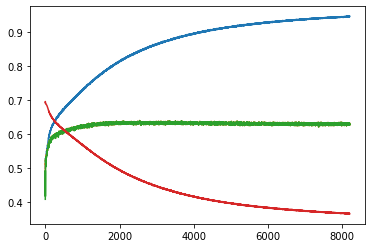

epoch: 0
train_acc: 0.9476963488311007
test_acc: 0.6314617130369
f1: 0.631447221243325

epoch: 1
train_acc: 0.9460362490149724
test_acc: 0.6300327813734555
f1: 0.6299907661611055

epoch: 2
train_acc: 0.9460992907801419
test_acc: 0.6267126166260402
f1: 0.6266436913599553

epoch: 3
train_acc: 0.9449855529288154
test_acc: 0.6257880137849878
f1: 0.6256238516666314

epoch: 4
train_acc: 0.9478329393223011
test_acc: 0.6302849457846516
f1: 0.6302083507325258

epoch: 5
train_acc: 0.9466141318623588
test_acc: 0.6322602336723544
f1: 0.6322561180623341

epoch: 6
train_acc: 0.9466876805883898
test_acc: 0.6308733294107758
f1: 0.6308558566777788

epoch: 7
train_acc: 0.9468873128447597
test_acc: 0.628561822308145
f1: 0.6284092161961677

epoch: 8
train_acc: 0.9475387444181771
test_acc: 0.6290661511305371
f1: 0.6289483616046749

epoch: 9
train_acc: 0.9463514578408195
test_acc: 0.6283096578969488
f1: 0.6282357939598794

epoch: 10
train_acc: 0.9467192014709745
test_acc: 0.6246953013364713
f1: 0.6246811540

epoch: 89
train_acc: 0.9475282374573155
test_acc: 0.628729931915609
f1: 0.6287297010795628

epoch: 90
train_acc: 0.9473391121618072
test_acc: 0.628898041523073
f1: 0.6288832450418388

epoch: 91
train_acc: 0.9479169950091936
test_acc: 0.6241069177103471
f1: 0.6239942507085459

epoch: 92
train_acc: 0.9471815077488837
test_acc: 0.6265024796167101
f1: 0.6263821825917211

epoch: 93
train_acc: 0.9479275019700552
test_acc: 0.628687904513743
f1: 0.6286490429779986

epoch: 94
train_acc: 0.9472970843183609
test_acc: 0.6294443977473313
f1: 0.6293945952756801

epoch: 95
train_acc: 0.9477804045179932
test_acc: 0.6282676304950828
f1: 0.6282169342344978

epoch: 96
train_acc: 0.9480430785395324
test_acc: 0.6305791375977137
f1: 0.630458466897124

epoch: 97
train_acc: 0.9469608615707906
test_acc: 0.6281415482894848
f1: 0.6280640550978017

epoch: 98
train_acc: 0.9474021539269766
test_acc: 0.631377658233168
f1: 0.631332382969726

epoch: 99
train_acc: 0.9477804045179932
test_acc: 0.6267966714297722
f1: 0.6

epoch: 177
train_acc: 0.948641975308642
test_acc: 0.6292342607380011
f1: 0.6291337205528439

epoch: 178
train_acc: 0.9476648279485159
test_acc: 0.628729931915609
f1: 0.6286488871234913

epoch: 179
train_acc: 0.9480956133438403
test_acc: 0.6299066991678575
f1: 0.6298732673633066

epoch: 180
train_acc: 0.9488311006041502
test_acc: 0.6293603429435992
f1: 0.6293283514872569

epoch: 181
train_acc: 0.948715524034673
test_acc: 0.6297385895603934
f1: 0.6296727590172962

epoch: 182
train_acc: 0.9474757026530076
test_acc: 0.6259140959905859
f1: 0.6258338347344576

epoch: 183
train_acc: 0.9479905437352246
test_acc: 0.6281835756913507
f1: 0.6281306290181885

epoch: 184
train_acc: 0.9478959810874704
test_acc: 0.6293603429435992
f1: 0.6293545522453239

epoch: 185
train_acc: 0.9477173627528237
test_acc: 0.631209548625704
f1: 0.6311783005646268

epoch: 186
train_acc: 0.9478119254005779
test_acc: 0.6269227536353703
f1: 0.6268696274210985

epoch: 187
train_acc: 0.9476543209876543
test_acc: 0.62894006892

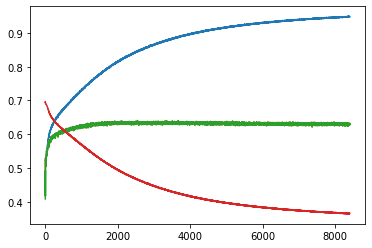

epoch: 0
train_acc: 0.9495035460992908
test_acc: 0.6296545347566613
f1: 0.6296072843838009

epoch: 1
train_acc: 0.9481376411872866
test_acc: 0.6297806169622594
f1: 0.6297437849717178

epoch: 2
train_acc: 0.9475702653007617
test_acc: 0.6270068084391023
f1: 0.626927704444882

epoch: 3
train_acc: 0.9486734961912267
test_acc: 0.6279734386820207
f1: 0.6278180335729817

epoch: 4
train_acc: 0.9482952456002102
test_acc: 0.6294443977473313
f1: 0.629351508285273

epoch: 5
train_acc: 0.9478644602048857
test_acc: 0.6269647810372363
f1: 0.6269596151369405

epoch: 6
train_acc: 0.9475597583399001
test_acc: 0.6297806169622594
f1: 0.6297763552362152

epoch: 7
train_acc: 0.9487470449172577
test_acc: 0.6280995208876188
f1: 0.6280052952323674

epoch: 8
train_acc: 0.9480640924612556
test_acc: 0.6345297133731193
f1: 0.6344103331214326

epoch: 9
train_acc: 0.9486209613869189
test_acc: 0.6278893838782886
f1: 0.627859304073017

epoch: 10
train_acc: 0.9485999474651957
test_acc: 0.6270488358409683
f1: 0.62703708

epoch: 89
train_acc: 0.949377462568952
test_acc: 0.6255778767756577
f1: 0.625523029477502

epoch: 90
train_acc: 0.9484003152088258
test_acc: 0.6263763974111121
f1: 0.6263082683581307

epoch: 91
train_acc: 0.948200682952456
test_acc: 0.6302429183827856
f1: 0.6302130288270165

epoch: 92
train_acc: 0.9474967165747308
test_acc: 0.6317979322518282
f1: 0.6317527086076581

epoch: 93
train_acc: 0.9476543209876543
test_acc: 0.6318819870555602
f1: 0.6318519457926055

epoch: 94
train_acc: 0.9475492513790386
test_acc: 0.6249054383458015
f1: 0.6248277288038868

epoch: 95
train_acc: 0.948641975308642
test_acc: 0.6290661511305371
f1: 0.6289494762292035

epoch: 96
train_acc: 0.9480010506960862
test_acc: 0.6270908632428344
f1: 0.6270291211985646

epoch: 97
train_acc: 0.9483057525610717
test_acc: 0.628813986719341
f1: 0.6287828274986366

epoch: 98
train_acc: 0.9482847386393486
test_acc: 0.6295284525510633
f1: 0.629484337841651

epoch: 99
train_acc: 0.9492513790386131
test_acc: 0.6318399596536942
f1: 0.6

epoch: 177
train_acc: 0.9495350669818755
test_acc: 0.6296545347566613
f1: 0.629604394738343

epoch: 178
train_acc: 0.9485369057000262
test_acc: 0.6283516852988148
f1: 0.6283201950875207

epoch: 179
train_acc: 0.9495245600210139
test_acc: 0.6281835756913507
f1: 0.6281144929850327

epoch: 180
train_acc: 0.9483687943262411
test_acc: 0.6292762881398672
f1: 0.6291843471927511

epoch: 181
train_acc: 0.9479905437352246
test_acc: 0.6284777675044129
f1: 0.6284150320483608

epoch: 182
train_acc: 0.9488205936432886
test_acc: 0.633773220139531
f1: 0.6336867341799192

epoch: 183
train_acc: 0.9484843708957185
test_acc: 0.628729931915609
f1: 0.6286534667594142

epoch: 184
train_acc: 0.948862621486735
test_acc: 0.6293603429435992
f1: 0.629298164541974

epoch: 185
train_acc: 0.9490307328605201
test_acc: 0.6302429183827856
f1: 0.630197851958973

epoch: 186
train_acc: 0.9486524822695035
test_acc: 0.63104143901824
f1: 0.6310101767130323

epoch: 187
train_acc: 0.9485579196217494
test_acc: 0.629990753971589

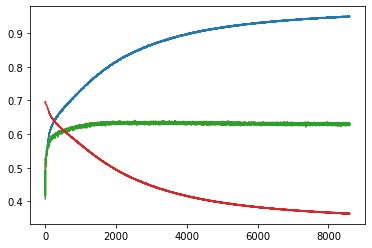

epoch: 0
train_acc: 0.9484318360914106
test_acc: 0.6261662604017819
f1: 0.6260705353811922

epoch: 1
train_acc: 0.9497977410034147
test_acc: 0.6274691098596284
f1: 0.6274329936951016

epoch: 2
train_acc: 0.9492408720777515
test_acc: 0.6267966714297722
f1: 0.6267886553172077

epoch: 3
train_acc: 0.9494194904123983
test_acc: 0.6309994116163739
f1: 0.6309794423545049

epoch: 4
train_acc: 0.9492513790386131
test_acc: 0.6296545347566613
f1: 0.6295903541184583

epoch: 5
train_acc: 0.9490097189387969
test_acc: 0.6289820963268051
f1: 0.6288113689871175

epoch: 6
train_acc: 0.9484318360914106
test_acc: 0.6259981507943179
f1: 0.6259583522550184

epoch: 7
train_acc: 0.9498502758077226
test_acc: 0.6305791375977137
f1: 0.6305463643759603

epoch: 8
train_acc: 0.9491042815865511
test_acc: 0.6292342607380011
f1: 0.6291764644128676

epoch: 9
train_acc: 0.9492093511951668
test_acc: 0.626250315205514
f1: 0.6261746966421984

epoch: 10
train_acc: 0.9487050170738114
test_acc: 0.6251576027569976
f1: 0.625093

epoch: 89
train_acc: 0.948641975308642
test_acc: 0.6269227536353703
f1: 0.6268427087897742

epoch: 90
train_acc: 0.9496611505122143
test_acc: 0.6285197949062789
f1: 0.6284391683799355

epoch: 91
train_acc: 0.9491042815865511
test_acc: 0.6284357401025469
f1: 0.6284124492066997

epoch: 92
train_acc: 0.9492828999211977
test_acc: 0.6283096578969488
f1: 0.6282723623849903

epoch: 93
train_acc: 0.9490727607039664
test_acc: 0.6271749180465663
f1: 0.6271568223908456

epoch: 94
train_acc: 0.9499973732597846
test_acc: 0.6283096578969488
f1: 0.6282321997383541

epoch: 95
train_acc: 0.9487050170738114
test_acc: 0.6267546440279061
f1: 0.6266936588574187

epoch: 96
train_acc: 0.9497767270816916
test_acc: 0.628771959317475
f1: 0.6287168137661465

epoch: 97
train_acc: 0.9489046493301813
test_acc: 0.6291502059342692
f1: 0.6290947319247766

epoch: 98
train_acc: 0.9493669556080904
test_acc: 0.6279734386820207
f1: 0.6279245329696188

epoch: 99
train_acc: 0.9485263987391647
test_acc: 0.6283096578969488
f1:

epoch: 177
train_acc: 0.9499028106120305
test_acc: 0.6289820963268051
f1: 0.6288730520302567

epoch: 178
train_acc: 0.9508064092461256
test_acc: 0.6322602336723544
f1: 0.6321542743760659

epoch: 179
train_acc: 0.9503966377725243
test_acc: 0.6299487265697234
f1: 0.6299390021256545

epoch: 180
train_acc: 0.9493354347255056
test_acc: 0.6273010002521644
f1: 0.6273013083394903

epoch: 181
train_acc: 0.949986866298923
test_acc: 0.6274270824577625
f1: 0.627404233825684

epoch: 182
train_acc: 0.9506067769897557
test_acc: 0.6284357401025469
f1: 0.6283893997359006

epoch: 183
train_acc: 0.9495981087470449
test_acc: 0.6286458771118769
f1: 0.6285542740195655

epoch: 184
train_acc: 0.9494405043341213
test_acc: 0.6270908632428344
f1: 0.6270669768277077

epoch: 185
train_acc: 0.9500078802206462
test_acc: 0.6289820963268051
f1: 0.6288944789236087

epoch: 186
train_acc: 0.9495350669818755
test_acc: 0.6277633016726906
f1: 0.6276544380117257

epoch: 187
train_acc: 0.9507433674809561
test_acc: 0.627553164

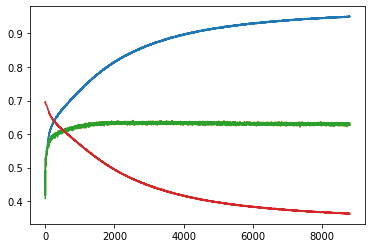

epoch: 0
train_acc: 0.9499973732597846
test_acc: 0.6277212742708246
f1: 0.6275721217460531

epoch: 1
train_acc: 0.9507853953244024
test_acc: 0.6283937127006809
f1: 0.6283078792628383

epoch: 2
train_acc: 0.9497557131599684
test_acc: 0.6302008909809196
f1: 0.6301396638595931

epoch: 3
train_acc: 0.9496716574730759
test_acc: 0.6268807262335042
f1: 0.6268522655779227

epoch: 4
train_acc: 0.9499343314946151
test_acc: 0.633731192737665
f1: 0.633675256524371

epoch: 5
train_acc: 0.9490202258996585
test_acc: 0.6302008909809196
f1: 0.6300772565045488

epoch: 6
train_acc: 0.9501234567901234
test_acc: 0.6272169454484324
f1: 0.6271158582298488

epoch: 7
train_acc: 0.9500604150249541
test_acc: 0.6311254938219719
f1: 0.6310815692837403

epoch: 8
train_acc: 0.9496611505122143
test_acc: 0.631209548625704
f1: 0.6311635542000372

epoch: 9
train_acc: 0.9493669556080904
test_acc: 0.6280574934857527
f1: 0.6279255609557679

epoch: 10
train_acc: 0.9492723929603363
test_acc: 0.6269647810372363
f1: 0.62687176

epoch: 89
train_acc: 0.9515524034672971
test_acc: 0.6294023703454652
f1: 0.629297704631066

epoch: 90
train_acc: 0.9496086157079064
test_acc: 0.6309573842145079
f1: 0.630801309290013

epoch: 91
train_acc: 0.951090097189388
test_acc: 0.6284357401025469
f1: 0.6284249362346134

epoch: 92
train_acc: 0.951163645915419
test_acc: 0.626460452214844
f1: 0.6264382946031491

epoch: 93
train_acc: 0.950795902285264
test_acc: 0.6238967807010171
f1: 0.6238113542298709

epoch: 94
train_acc: 0.9504071447333858
test_acc: 0.6267546440279061
f1: 0.6266669854326461

epoch: 95
train_acc: 0.9514893617021276
test_acc: 0.6269647810372363
f1: 0.6268463242242347

epoch: 96
train_acc: 0.9505227213028632
test_acc: 0.6301168361771875
f1: 0.630070705471741

epoch: 97
train_acc: 0.9510270554242185
test_acc: 0.6295284525510633
f1: 0.6294808293481914

epoch: 98
train_acc: 0.9506172839506173
test_acc: 0.6324283432798185
f1: 0.6323849148364096

epoch: 99
train_acc: 0.9504806934594169
test_acc: 0.63125157602757
f1: 0.6312

epoch: 177
train_acc: 0.9509850275807723
test_acc: 0.6316718500462302
f1: 0.6315760330060848

epoch: 178
train_acc: 0.9506277909114789
test_acc: 0.628940068924939
f1: 0.6287618525463747

epoch: 179
train_acc: 0.9505227213028632
test_acc: 0.6299487265697234
f1: 0.6299053471074877

epoch: 180
train_acc: 0.9513947990543735
test_acc: 0.6279314112801546
f1: 0.6279159551415325

epoch: 181
train_acc: 0.9506593117940636
test_acc: 0.6280995208876188
f1: 0.6280269420791454

epoch: 182
train_acc: 0.9511951667980036
test_acc: 0.6261662604017819
f1: 0.6260569296730609

epoch: 183
train_acc: 0.9508799579721565
test_acc: 0.63125157602757
f1: 0.6311834888529889

epoch: 184
train_acc: 0.949892303651169
test_acc: 0.62608220559805
f1: 0.6260666726413887

epoch: 185
train_acc: 0.9504491725768321
test_acc: 0.6316718500462302
f1: 0.631650969783325

epoch: 186
train_acc: 0.9504701864985553
test_acc: 0.6293603429435992
f1: 0.6292826498338865

epoch: 187
train_acc: 0.9506172839506173
test_acc: 0.62830965789694

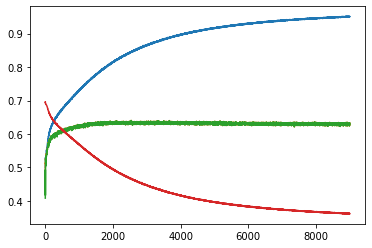

epoch: 0
train_acc: 0.9507118465983714
test_acc: 0.6317138774480962
f1: 0.6317055005059307

epoch: 1
train_acc: 0.9494615182558445
test_acc: 0.6291922333361352
f1: 0.6291473867436763

epoch: 2
train_acc: 0.9508694510112949
test_acc: 0.6333529461208708
f1: 0.6331933965537259

epoch: 3
train_acc: 0.9506382978723404
test_acc: 0.6311675212238379
f1: 0.6311068562655731

epoch: 4
train_acc: 0.9508799579721565
test_acc: 0.6294443977473313
f1: 0.6294185777331307

epoch: 5
train_acc: 0.9502075124770161
test_acc: 0.6299487265697234
f1: 0.6298967792616365

epoch: 6
train_acc: 0.9509535066981876
test_acc: 0.6265024796167101
f1: 0.6264185954855774

epoch: 7
train_acc: 0.9514893617021276
test_acc: 0.6267126166260402
f1: 0.6265742020744347

epoch: 8
train_acc: 0.9526136065143157
test_acc: 0.6305791375977137
f1: 0.6304298787143059

epoch: 9
train_acc: 0.9514053060152351
test_acc: 0.6265865344204421
f1: 0.6265684102065904

epoch: 10
train_acc: 0.9504596795376937
test_acc: 0.6313356308313021
f1: 0.63132

epoch: 89
train_acc: 0.9517940635671132
test_acc: 0.6294023703454652
f1: 0.629393132345813

epoch: 90
train_acc: 0.9519096401365905
test_acc: 0.6327225350928806
f1: 0.6326834521133392

epoch: 91
train_acc: 0.9506908326766483
test_acc: 0.6313356308313021
f1: 0.6312871671045523

epoch: 92
train_acc: 0.9508169162069872
test_acc: 0.6275951920652265
f1: 0.6275268581670509

epoch: 93
train_acc: 0.9520252167060678
test_acc: 0.6324283432798185
f1: 0.6323604733882199

epoch: 94
train_acc: 0.9523299185710533
test_acc: 0.6286038497100109
f1: 0.6285616722214801

epoch: 95
train_acc: 0.9510165484633569
test_acc: 0.6290241237286711
f1: 0.6289859423260064

epoch: 96
train_acc: 0.9505332282637248
test_acc: 0.6293603429435992
f1: 0.6292897550237716

epoch: 97
train_acc: 0.9503125820856317
test_acc: 0.6303690005883836
f1: 0.6302812292654233

epoch: 98
train_acc: 0.9521513002364066
test_acc: 0.6304950827939817
f1: 0.6304153453480851

epoch: 99
train_acc: 0.9519516679800367
test_acc: 0.6268386988316382
f1

epoch: 177
train_acc: 0.952582085631731
test_acc: 0.6333109187190048
f1: 0.6332792682533526

epoch: 178
train_acc: 0.950942999737326
test_acc: 0.6278473564764226
f1: 0.6278245336183228

epoch: 179
train_acc: 0.9515208825847123
test_acc: 0.6281835756913507
f1: 0.6280801449417426

epoch: 180
train_acc: 0.9518150774888363
test_acc: 0.6257880137849878
f1: 0.625645580873022

epoch: 181
train_acc: 0.9517205148410822
test_acc: 0.6307472472051778
f1: 0.6305930007876431

epoch: 182
train_acc: 0.9517940635671132
test_acc: 0.6292762881398672
f1: 0.6291967482521796

epoch: 183
train_acc: 0.9518045705279747
test_acc: 0.6291081785324031
f1: 0.6290823350907201

epoch: 184
train_acc: 0.9514893617021276
test_acc: 0.6327645624947466
f1: 0.6327218511669357

epoch: 185
train_acc: 0.9522983976884686
test_acc: 0.6273010002521644
f1: 0.6272429025632861

epoch: 186
train_acc: 0.9508274231678487
test_acc: 0.6296545347566613
f1: 0.6295699428759841

epoch: 187
train_acc: 0.9517310218019438
test_acc: 0.6287299319

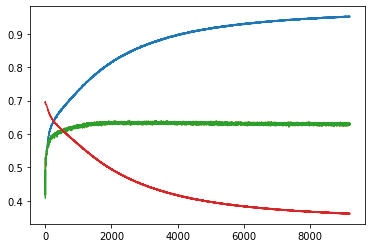

epoch: 0
train_acc: 0.9509114788547413
test_acc: 0.6266705892241742
f1: 0.6265635544891761

epoch: 1
train_acc: 0.9513947990543735
test_acc: 0.6271749180465663
f1: 0.6271123730186926

epoch: 2
train_acc: 0.9519621749408983
test_acc: 0.6292762881398672
f1: 0.6292242464357632

epoch: 3
train_acc: 0.9519831888626215
test_acc: 0.628940068924939
f1: 0.6289270616101532

epoch: 4
train_acc: 0.9522038350407145
test_acc: 0.6283516852988148
f1: 0.6282885181054002

epoch: 5
train_acc: 0.9520987654320988
test_acc: 0.6313356308313021
f1: 0.6313152082423302

epoch: 6
train_acc: 0.9517415287628054
test_acc: 0.62629234260738
f1: 0.6262258993395912

epoch: 7
train_acc: 0.9520147097452062
test_acc: 0.6332268639152727
f1: 0.6330627065004683

epoch: 8
train_acc: 0.9514473338586814
test_acc: 0.6302429183827856
f1: 0.6301829036792657

epoch: 9
train_acc: 0.9516784869976359
test_acc: 0.6299907539715894
f1: 0.6299811986082771

epoch: 10
train_acc: 0.951478854741266
test_acc: 0.6324283432798185
f1: 0.632367885

epoch: 89
train_acc: 0.9525925925925925
test_acc: 0.6257459863831218
f1: 0.6256470899070676

epoch: 90
train_acc: 0.9517730496453901
test_acc: 0.6308313020089098
f1: 0.6307552696416905

epoch: 91
train_acc: 0.9519306540583137
test_acc: 0.6256199041775238
f1: 0.6255872915678201

epoch: 92
train_acc: 0.9517835566062517
test_acc: 0.6292762881398672
f1: 0.6292687830331598

epoch: 93
train_acc: 0.9523824533753612
test_acc: 0.6290661511305371
f1: 0.6290243623483308

epoch: 94
train_acc: 0.9522143420015761
test_acc: 0.6317979322518282
f1: 0.6317114580987966

epoch: 95
train_acc: 0.9524665090622537
test_acc: 0.6286458771118769
f1: 0.6284736476965619

epoch: 96
train_acc: 0.9519411610191753
test_acc: 0.6303690005883836
f1: 0.6302723396383565

epoch: 97
train_acc: 0.951752035723667
test_acc: 0.6291922333361352
f1: 0.6291608143454931

epoch: 98
train_acc: 0.952434988179669
test_acc: 0.6302429183827856
f1: 0.6302355824161223

epoch: 99
train_acc: 0.9523719464144996
test_acc: 0.6303690005883836
f1:

epoch: 177
train_acc: 0.9522983976884686
test_acc: 0.6305791375977137
f1: 0.6305635832722594

epoch: 178
train_acc: 0.9512161807197268
test_acc: 0.6308733294107758
f1: 0.6308584075904415

epoch: 179
train_acc: 0.9529288153401628
test_acc: 0.6266705892241742
f1: 0.6266486913979975

epoch: 180
train_acc: 0.9529288153401628
test_acc: 0.6282676304950828
f1: 0.6281104180241618

epoch: 181
train_acc: 0.9524244812188074
test_acc: 0.6300327813734555
f1: 0.6299277673075643

epoch: 182
train_acc: 0.9517415287628054
test_acc: 0.6298646717659915
f1: 0.6298170917832696

epoch: 183
train_acc: 0.9528972944575781
test_acc: 0.6286458771118769
f1: 0.6286390972076441

epoch: 184
train_acc: 0.9521618071972682
test_acc: 0.6304110279902496
f1: 0.630360256387246

epoch: 185
train_acc: 0.9527291830837931
test_acc: 0.6284357401025469
f1: 0.6283623444315724

epoch: 186
train_acc: 0.9526871552403468
test_acc: 0.6241489451122132
f1: 0.6240833899529699

epoch: 187
train_acc: 0.9527081691620699
test_acc: 0.63104143

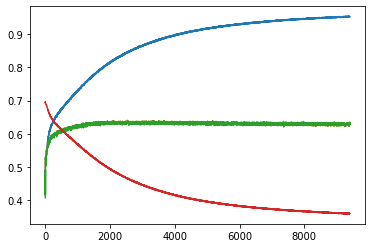

epoch: 0
train_acc: 0.953023377987917
test_acc: 0.6291502059342692
f1: 0.6291196541146679

epoch: 1
train_acc: 0.9528342526924087
test_acc: 0.6301588635790536
f1: 0.6300939416657777

epoch: 2
train_acc: 0.9520777515103757
test_acc: 0.626040178196184
f1: 0.6259649671536425

epoch: 3
train_acc: 0.9522773837667454
test_acc: 0.62608220559805
f1: 0.6259781902957707

epoch: 4
train_acc: 0.9526871552403468
test_acc: 0.6294443977473313
f1: 0.6293854497052893

epoch: 5
train_acc: 0.9518255844496979
test_acc: 0.6270908632428344
f1: 0.6270679939915731

epoch: 6
train_acc: 0.951457840819543
test_acc: 0.6276792468689586
f1: 0.6276247073904132

epoch: 7
train_acc: 0.9533385868137642
test_acc: 0.6296965621585273
f1: 0.6296115054199309

epoch: 8
train_acc: 0.9512477016023115
test_acc: 0.6269227536353703
f1: 0.6268081840930412

epoch: 9
train_acc: 0.9518991331757289
test_acc: 0.6259140959905859
f1: 0.6258057705885608

epoch: 10
train_acc: 0.9527186761229315
test_acc: 0.6308313020089098
f1: 0.6308242724

epoch: 89
train_acc: 0.9523719464144996
test_acc: 0.6243170547196772
f1: 0.6241960538075157

epoch: 90
train_acc: 0.9523299185710533
test_acc: 0.6318399596536942
f1: 0.6318272445462008

epoch: 91
train_acc: 0.9526871552403468
test_acc: 0.6306631924014457
f1: 0.6306427325619697

epoch: 92
train_acc: 0.9532755450485947
test_acc: 0.6265445070185761
f1: 0.6265050945467826

epoch: 93
train_acc: 0.9541896506435513
test_acc: 0.6291922333361352
f1: 0.6290942475294844

epoch: 94
train_acc: 0.9526871552403468
test_acc: 0.6308313020089098
f1: 0.6307543693466421

epoch: 95
train_acc: 0.9535697399527187
test_acc: 0.6321761788686223
f1: 0.6321405190455245

epoch: 96
train_acc: 0.952876280535855
test_acc: 0.623770698495419
f1: 0.6237348539137803

epoch: 97
train_acc: 0.9529918571053323
test_acc: 0.6323022610742204
f1: 0.6322373015259876

epoch: 98
train_acc: 0.9530023640661939
test_acc: 0.6292762881398672
f1: 0.6291793414383107

epoch: 99
train_acc: 0.952287890727607
test_acc: 0.6292342607380011
f1: 

epoch: 177
train_acc: 0.9530128710270555
test_acc: 0.6277633016726906
f1: 0.6277535197986283

epoch: 178
train_acc: 0.9530759127922248
test_acc: 0.6299487265697234
f1: 0.6299439804594659

epoch: 179
train_acc: 0.9530654058313632
test_acc: 0.628687904513743
f1: 0.6286109785974611

epoch: 180
train_acc: 0.9525190438665616
test_acc: 0.6274270824577625
f1: 0.6272425844070626

epoch: 181
train_acc: 0.9535697399527187
test_acc: 0.6301168361771875
f1: 0.6298786790644381

epoch: 182
train_acc: 0.9527186761229315
test_acc: 0.6255358493737917
f1: 0.6254790539435132

epoch: 183
train_acc: 0.9531284475965327
test_acc: 0.6290661511305371
f1: 0.6290451231523991

epoch: 184
train_acc: 0.9528657735749935
test_acc: 0.6278473564764226
f1: 0.6278484627719207

epoch: 185
train_acc: 0.953023377987917
test_acc: 0.6294864251491973
f1: 0.6294180120501425

epoch: 186
train_acc: 0.9521828211189913
test_acc: 0.6275111372614945
f1: 0.6272961373673752

epoch: 187
train_acc: 0.9526871552403468
test_acc: 0.627511137

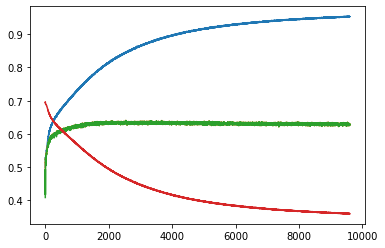

epoch: 0
train_acc: 0.9533911216180719
test_acc: 0.6298226443641254
f1: 0.6297399749688517

epoch: 1
train_acc: 0.9535907538744418
test_acc: 0.6269647810372363
f1: 0.6269227555182173

epoch: 2
train_acc: 0.953023377987917
test_acc: 0.6303269731865176
f1: 0.6302406324528306

epoch: 3
train_acc: 0.9544208037825059
test_acc: 0.6299487265697234
f1: 0.6298890636384268

epoch: 4
train_acc: 0.9534856842658261
test_acc: 0.6283937127006809
f1: 0.6283030325310409

epoch: 5
train_acc: 0.9536432886787497
test_acc: 0.6265445070185761
f1: 0.6264932042593893

epoch: 6
train_acc: 0.9537693722090885
test_acc: 0.6296125073547953
f1: 0.6295283791292718

epoch: 7
train_acc: 0.9528237457315472
test_acc: 0.6275531646633605
f1: 0.6274800376016276

epoch: 8
train_acc: 0.9543577620173365
test_acc: 0.6300748087753215
f1: 0.6300232510806792

epoch: 9
train_acc: 0.9526136065143157
test_acc: 0.6280574934857527
f1: 0.6280488737219351

epoch: 10
train_acc: 0.9535066981875493
test_acc: 0.6272169454484324
f1: 0.627189

epoch: 89
train_acc: 0.9538114000525348
test_acc: 0.6274691098596284
f1: 0.6274475043461002

epoch: 90
train_acc: 0.9537273443656422
test_acc: 0.6265024796167101
f1: 0.6264522817528603

epoch: 91
train_acc: 0.9532860520094563
test_acc: 0.6295284525510633
f1: 0.6294793892734196

epoch: 92
train_acc: 0.9537483582873654
test_acc: 0.6281415482894848
f1: 0.6280989799418932

epoch: 93
train_acc: 0.9530128710270555
test_acc: 0.6275111372614945
f1: 0.6274795758295483

epoch: 94
train_acc: 0.953170475439979
test_acc: 0.6286038497100109
f1: 0.6285706013888793

epoch: 95
train_acc: 0.9530654058313632
test_acc: 0.6220475750189123
f1: 0.6219922105838114

epoch: 96
train_acc: 0.9537798791699501
test_acc: 0.6281415482894848
f1: 0.6280882178289654

epoch: 97
train_acc: 0.9537483582873654
test_acc: 0.62608220559805
f1: 0.626030466047189

epoch: 98
train_acc: 0.9533385868137642
test_acc: 0.6278473564764226
f1: 0.6277540666741627

epoch: 99
train_acc: 0.9540215392697662
test_acc: 0.6307472472051778
f1: 0

epoch: 177
train_acc: 0.9545784081954295
test_acc: 0.6303690005883836
f1: 0.6303178542076011

epoch: 178
train_acc: 0.9537693722090885
test_acc: 0.6285197949062789
f1: 0.6284789467936395

epoch: 179
train_acc: 0.9538849487785658
test_acc: 0.6293183155417332
f1: 0.6292798428565105

epoch: 180
train_acc: 0.9544208037825059
test_acc: 0.6276372194670925
f1: 0.62753728078108

epoch: 181
train_acc: 0.9538954557394274
test_acc: 0.6309994116163739
f1: 0.6308877278212741

epoch: 182
train_acc: 0.9547255056474915
test_acc: 0.6266285618223082
f1: 0.626555253221943

epoch: 183
train_acc: 0.9550827423167849
test_acc: 0.6270068084391023
f1: 0.6269474726249794

epoch: 184
train_acc: 0.9547885474126608
test_acc: 0.6316298226443642
f1: 0.6315810376609782

epoch: 185
train_acc: 0.9541896506435513
test_acc: 0.6280574934857527
f1: 0.628007870666108

epoch: 186
train_acc: 0.9542106645652745
test_acc: 0.6265024796167101
f1: 0.6264646827292414

epoch: 187
train_acc: 0.955103756238508
test_acc: 0.629234260738

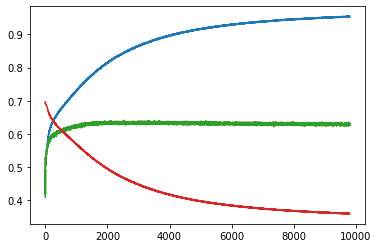

epoch: 0
train_acc: 0.9537063304439191
test_acc: 0.6298226443641254
f1: 0.6297568287655331

epoch: 1
train_acc: 0.9532230102442868
test_acc: 0.6281415482894848
f1: 0.6281079570327659

epoch: 2
train_acc: 0.9542631993695824
test_acc: 0.6279734386820207
f1: 0.6279677610311588

epoch: 3
train_acc: 0.953853427895981
test_acc: 0.6299907539715894
f1: 0.629922433993813

epoch: 4
train_acc: 0.9540530601523509
test_acc: 0.6308733294107758
f1: 0.6307310016433192

epoch: 5
train_acc: 0.9535172051484109
test_acc: 0.6246532739346053
f1: 0.6246509103704408

epoch: 6
train_acc: 0.9536327817178881
test_acc: 0.6279314112801546
f1: 0.6279321598205808

epoch: 7
train_acc: 0.9542001576044129
test_acc: 0.6266285618223082
f1: 0.6266059155268803

epoch: 8
train_acc: 0.9533701076963488
test_acc: 0.6309994116163739
f1: 0.6308972839628547

epoch: 9
train_acc: 0.9543892828999212
test_acc: 0.6296125073547953
f1: 0.6294943328654086

epoch: 10
train_acc: 0.9544523246650907
test_acc: 0.6278053290745567
f1: 0.6277496

epoch: 89
train_acc: 0.9545048594693984
test_acc: 0.6323863158779525
f1: 0.6323317072356485

epoch: 90
train_acc: 0.9535592329918571
test_acc: 0.6272169454484324
f1: 0.6271958126401291

epoch: 91
train_acc: 0.9538744418177042
test_acc: 0.6272589728502984
f1: 0.6271752586206354

epoch: 92
train_acc: 0.9545994221171527
test_acc: 0.6304950827939817
f1: 0.6303766314603616

epoch: 93
train_acc: 0.9545468873128448
test_acc: 0.6282256030932167
f1: 0.628120605031346

epoch: 94
train_acc: 0.9544628316259522
test_acc: 0.6325964528872825
f1: 0.6325845115703516

epoch: 95
train_acc: 0.9543262411347517
test_acc: 0.6326805076910146
f1: 0.6326713514064872

epoch: 96
train_acc: 0.95451536643026
test_acc: 0.6280154660838867
f1: 0.6279704771697018

epoch: 97
train_acc: 0.9544838455476753
test_acc: 0.6294443977473313
f1: 0.6293316977087244

epoch: 98
train_acc: 0.9545363803519832
test_acc: 0.6305791375977137
f1: 0.6304640434438463

epoch: 99
train_acc: 0.9549251379038614
test_acc: 0.6297385895603934
f1: 

epoch: 177
train_acc: 0.9543577620173365
test_acc: 0.6281835756913507
f1: 0.6281144929850327

epoch: 178
train_acc: 0.9541055949566588
test_acc: 0.6285197949062789
f1: 0.6284175029472497

epoch: 179
train_acc: 0.955324402416601
test_acc: 0.6313356308313021
f1: 0.6312641194099582

epoch: 180
train_acc: 0.954368268978198
test_acc: 0.6303690005883836
f1: 0.630328355815144

epoch: 181
train_acc: 0.9551562910428159
test_acc: 0.6267126166260402
f1: 0.6266635451690188

epoch: 182
train_acc: 0.9539584975045968
test_acc: 0.6277212742708246
f1: 0.6276839197202898

epoch: 183
train_acc: 0.9552718676122931
test_acc: 0.6303269731865176
f1: 0.630285326446399

epoch: 184
train_acc: 0.9550722353559233
test_acc: 0.628729931915609
f1: 0.6286552618380847

epoch: 185
train_acc: 0.9542211715261361
test_acc: 0.6276372194670925
f1: 0.6275822902501144

epoch: 186
train_acc: 0.9552508536905701
test_acc: 0.6275111372614945
f1: 0.627392292316591

epoch: 187
train_acc: 0.9540845810349357
test_acc: 0.6315457678406

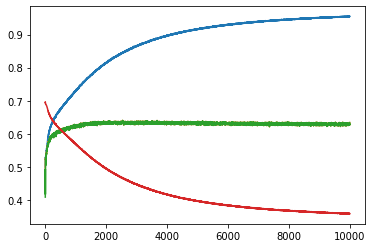

In [9]:
for i in range(50):
    for epoch in range(epochs):
        y_pred = net.forward(X_train)

        train_pred = y_pred.cpu().detach().numpy()
        train_pred = [np.argmax(sample) for sample in train_pred]
        train_accuracy = accuracy_score(y_train.cpu(), train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = net.predict(X_test)
        test_accuracy = accuracy_score(y_test.cpu(), test_pred)
        test_accuracies.append(test_accuracy)
        
        f1 = f1_score(y_test.cpu(), test_pred, average='weighted')
        f1s.append(f1)

        loss = criterion(y_pred, y_train)   
        losses.append(loss)
        
        print("epoch:", epoch)
        print("train_acc:", train_accuracy)
        print("test_acc:", test_accuracy)
        print("f1:", f1)
        print()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(train_accuracies)
    plt.plot(test_accuracies)
    plt.plot(f1s)
    plt.plot(losses)
    plt.show()
    
    torch.save(net.state_dict(), 'torch_PN_dict.dict')

In [10]:
from sklearn.metrics import confusion_matrix
test_pred = net.predict(X_test)
confusion_matrix(y_test.cpu(), test_pred)

array([[7558, 4381],
       [4439, 7416]])

In [ ]:
torch.save(net, 'torch_PN.mdl')